<a href="https://colab.research.google.com/github/MonicaKim89/Arthritis_Classification/blob/main/%5B0315%5DVit_jong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install timm

In [2]:
import timm 
import torch
from torchvision import datasets, transforms
import numpy as np

import os,shutil

import cv2
from PIL import Image
import matplotlib.pyplot as plt

import torch.nn.functional

In [3]:
avail_pretrained_models = timm.list_models(pretrained=True)
len(avail_pretrained_models), avail_pretrained_models

(592,
 ['adv_inception_v3',
  'bat_resnext26ts',
  'beit_base_patch16_224',
  'beit_base_patch16_224_in22k',
  'beit_base_patch16_384',
  'beit_large_patch16_224',
  'beit_large_patch16_224_in22k',
  'beit_large_patch16_384',
  'beit_large_patch16_512',
  'botnet26t_256',
  'cait_m36_384',
  'cait_m48_448',
  'cait_s24_224',
  'cait_s24_384',
  'cait_s36_384',
  'cait_xs24_384',
  'cait_xxs24_224',
  'cait_xxs24_384',
  'cait_xxs36_224',
  'cait_xxs36_384',
  'coat_lite_mini',
  'coat_lite_small',
  'coat_lite_tiny',
  'coat_mini',
  'coat_tiny',
  'convit_base',
  'convit_small',
  'convit_tiny',
  'convmixer_768_32',
  'convmixer_1024_20_ks9_p14',
  'convmixer_1536_20',
  'convnext_base',
  'convnext_base_384_in22ft1k',
  'convnext_base_in22ft1k',
  'convnext_base_in22k',
  'convnext_large',
  'convnext_large_384_in22ft1k',
  'convnext_large_in22ft1k',
  'convnext_large_in22k',
  'convnext_small',
  'convnext_tiny',
  'convnext_xlarge_384_in22ft1k',
  'convnext_xlarge_in22ft1k',
  'c

In [4]:
model = timm.create_model('vit_large_r50_s32_224_in21k', pretrained=True)

In [5]:
model

VisionTransformer(
  (patch_embed): HybridEmbed(
    (backbone): ResNetV2(
      (stem): Sequential(
        (conv): StdConv2dSame(3, 64, kernel_size=(7, 7), stride=(2, 2), bias=False)
        (norm): GroupNormAct(
          32, 64, eps=1e-05, affine=True
          (act): ReLU(inplace=True)
        )
        (pool): MaxPool2dSame(kernel_size=(3, 3), stride=(2, 2), padding=(0, 0), dilation=(1, 1), ceil_mode=False)
      )
      (stages): Sequential(
        (0): ResNetStage(
          (blocks): Sequential(
            (0): Bottleneck(
              (downsample): DownsampleConv(
                (conv): StdConv2dSame(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
                (norm): GroupNormAct(
                  32, 256, eps=1e-05, affine=True
                  (act): Identity()
                )
              )
              (conv1): StdConv2dSame(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
              (norm1): GroupNormAct(
                32, 64, eps=1e-05, 

In [6]:
# ImageNet Labels
!wget https://storage.googleapis.com/bit_models/imagenet21k_wordnet_lemmas.txt
imagenet_labels = dict(enumerate(open('imagenet21k_wordnet_lemmas.txt')))

--2022-03-15 10:57:19--  https://storage.googleapis.com/bit_models/imagenet21k_wordnet_lemmas.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.8.128, 64.233.189.128, 108.177.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.8.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 522999 (511K) [text/plain]
Saving to: ‘imagenet21k_wordnet_lemmas.txt.2’

imagenet21k_wordnet 100%[===================>] 510.74K  --.-KB/s    in 0.004s  

2022-03-15 10:57:19 (114 MB/s) - ‘imagenet21k_wordnet_lemmas.txt.2’ saved [522999/522999]



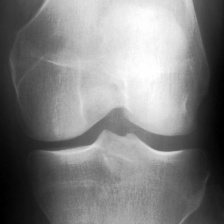

In [7]:
img = Image.open('/content/drive/MyDrive/Projects/knee/VIT_DATA/0_9001695L.jpg')
img

In [8]:
img = img.resize((224, 224))
x = np.transpose(img, (2, 0, 1))
x = x[np.newaxis, :]

### -1~1 사이의 값으로 조정
# https://visionhong.tistory.com/25
x = (x/128) - 1
x = torch.FloatTensor(x)
x, x.shape

(tensor([[[[-0.6172, -0.6094, -0.6016,  ..., -0.6562, -0.6953, -0.7344],
           [-0.6328, -0.6172, -0.6016,  ..., -0.6641, -0.7031, -0.7344],
           [-0.6250, -0.6172, -0.6016,  ..., -0.6719, -0.7031, -0.7344],
           ...,
           [-1.0000, -1.0000, -1.0000,  ..., -0.7031, -0.7109, -0.7109],
           [-1.0000, -1.0000, -1.0000,  ..., -0.6953, -0.6953, -0.6953],
           [-1.0000, -1.0000, -1.0000,  ..., -0.6797, -0.6797, -0.6875]],
 
          [[-0.6172, -0.6094, -0.6016,  ..., -0.6562, -0.6953, -0.7344],
           [-0.6328, -0.6172, -0.6016,  ..., -0.6641, -0.7031, -0.7344],
           [-0.6250, -0.6172, -0.6016,  ..., -0.6719, -0.7031, -0.7344],
           ...,
           [-1.0000, -1.0000, -1.0000,  ..., -0.7031, -0.7109, -0.7109],
           [-1.0000, -1.0000, -1.0000,  ..., -0.6953, -0.6953, -0.6953],
           [-1.0000, -1.0000, -1.0000,  ..., -0.6797, -0.6797, -0.6875]],
 
          [[-0.6172, -0.6094, -0.6016,  ..., -0.6562, -0.6953, -0.7344],
           [-

In [9]:
output = model(x)
imagenet_labels[int(torch.argmax(output))]

'ligament\n'

Inference Result:
ligament



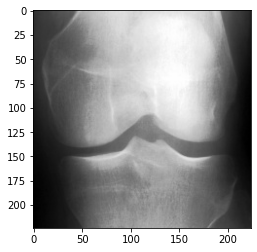

In [10]:
output = model(x)
print("Inference Result:")
print(imagenet_labels[int(torch.argmax(output))])
plt.imshow(img)

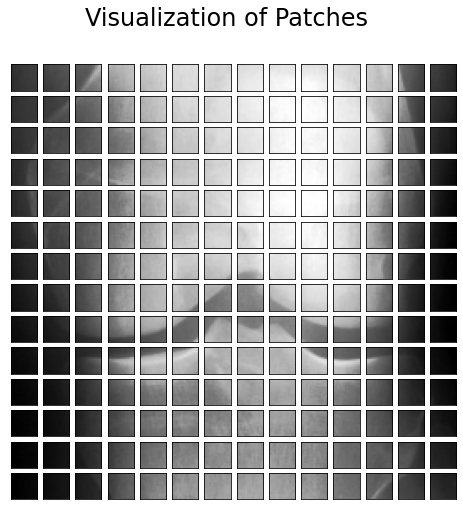

In [11]:
# This is NOT a part of the pipeline.
# Actually the image is divided into patch embeddings by Conv2d 
# with stride=(16, 16) shown above.

fig = plt.figure(figsize=(8, 8))
fig.suptitle("Visualization of Patches", fontsize=24)
fig.add_axes()
img = np.asarray(img)
for i in range(0, 196):
    x = i % 14
    y = i // 14
    patch = img[y*16:(y+1)*16, x*16:(x+1)*16]
    ax = fig.add_subplot(14, 14, i+1)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.imshow(patch)

In [12]:
from tqdm import tqdm

In [13]:
# Define transforms for test
IMG_SIZE = (224, 224)
NORMALIZE_MEAN = (0.5, 0.5, 0.5)
NORMALIZE_STD = (0.5, 0.5, 0.5)

data_transforms = transforms.Compose([transforms.Resize(IMG_SIZE),
                                      transforms.ToTensor(),
                                      transforms.Normalize(NORMALIZE_MEAN, NORMALIZE_STD),
                                      ])

datadir = '/content/drive/MyDrive/Projects/knee/VIT_DATA/for_vit/train/'

data = datasets.ImageFolder(datadir,
                            transform=data_transforms)

data_loader = torch.utils.data.DataLoader(dataset=data,
                                           shuffle=False,
                                           batch_size=1)

for num, (img, label) in tqdm (enumerate(data_loader)):
    print(img, label)

29it [00:00, 144.53it/s]

tensor([[[[-0.6471, -0.6235, -0.6078,  ..., -0.8353, -0.8510, -0.8588],
          [-0.6392, -0.6235, -0.6078,  ..., -0.8353, -0.8510, -0.8588],
          [-0.6314, -0.6157, -0.6000,  ..., -0.8275, -0.8510, -0.8588],
          ...,
          [-0.9843, -0.9843, -0.9765,  ..., -0.7569, -0.7647, -0.7804],
          [-0.9765, -0.9765, -0.9686,  ..., -0.7490, -0.7569, -0.7725],
          [-0.9765, -0.9765, -0.9686,  ..., -0.7490, -0.7569, -0.7725]],

         [[-0.6471, -0.6235, -0.6078,  ..., -0.8353, -0.8510, -0.8588],
          [-0.6392, -0.6235, -0.6078,  ..., -0.8353, -0.8510, -0.8588],
          [-0.6314, -0.6157, -0.6000,  ..., -0.8275, -0.8510, -0.8588],
          ...,
          [-0.9843, -0.9843, -0.9765,  ..., -0.7569, -0.7647, -0.7804],
          [-0.9765, -0.9765, -0.9686,  ..., -0.7490, -0.7569, -0.7725],
          [-0.9765, -0.9765, -0.9686,  ..., -0.7490, -0.7569, -0.7725]],

         [[-0.6471, -0.6235, -0.6078,  ..., -0.8353, -0.8510, -0.8588],
          [-0.6392, -0.6235, -

65it [00:00, 167.47it/s]

 tensor([0])
tensor([[[[-0.7725, -0.7569, -0.7412,  ..., -0.8745, -0.8902, -0.9059],
          [-0.7725, -0.7569, -0.7412,  ..., -0.8745, -0.8902, -0.9059],
          [-0.7804, -0.7569, -0.7412,  ..., -0.8824, -0.8980, -0.9137],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -0.6314, -0.6471, -0.6627],
          [-1.0000, -1.0000, -1.0000,  ..., -0.6314, -0.6471, -0.6549],
          [-1.0000, -1.0000, -1.0000,  ..., -0.6314, -0.6471, -0.6549]],

         [[-0.7725, -0.7569, -0.7412,  ..., -0.8745, -0.8902, -0.9059],
          [-0.7725, -0.7569, -0.7412,  ..., -0.8745, -0.8902, -0.9059],
          [-0.7804, -0.7569, -0.7412,  ..., -0.8824, -0.8980, -0.9137],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -0.6314, -0.6471, -0.6627],
          [-1.0000, -1.0000, -1.0000,  ..., -0.6314, -0.6471, -0.6549],
          [-1.0000, -1.0000, -1.0000,  ..., -0.6314, -0.6471, -0.6549]],

         [[-0.7725, -0.7569, -0.7412,  ..., -0.8745, -0.8902, -0.9059],
          [-0.772

82it [00:00, 127.76it/s]

tensor([[[[-0.9686, -0.9451, -0.9373,  ..., -0.7255, -0.7412, -0.7569],
          [-0.9686, -0.9451, -0.9373,  ..., -0.7255, -0.7412, -0.7569],
          [-0.9686, -0.9451, -0.9373,  ..., -0.7333, -0.7490, -0.7647],
          ...,
          [-0.6627, -0.6549, -0.6078,  ..., -1.0000, -1.0000, -1.0000],
          [-0.6549, -0.6471, -0.6000,  ..., -1.0000, -1.0000, -1.0000],
          [-0.6549, -0.6471, -0.6000,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.9686, -0.9451, -0.9373,  ..., -0.7255, -0.7412, -0.7569],
          [-0.9686, -0.9451, -0.9373,  ..., -0.7255, -0.7412, -0.7569],
          [-0.9686, -0.9451, -0.9373,  ..., -0.7333, -0.7490, -0.7647],
          ...,
          [-0.6627, -0.6549, -0.6078,  ..., -1.0000, -1.0000, -1.0000],
          [-0.6549, -0.6471, -0.6000,  ..., -1.0000, -1.0000, -1.0000],
          [-0.6549, -0.6471, -0.6000,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.9686, -0.9451, -0.9373,  ..., -0.7255, -0.7412, -0.7569],
          [-0.9686, -0.9451, -

96it [00:00, 118.78it/s]

tensor([[[[-0.9373, -0.9294, -0.9137,  ..., -0.3882, -0.4353, -0.4824],
          [-0.9373, -0.9294, -0.9137,  ..., -0.3882, -0.4353, -0.4745],
          [-0.9373, -0.9294, -0.9137,  ..., -0.3961, -0.4353, -0.4667],
          ...,
          [-0.9137, -0.7333, -0.6392,  ..., -0.9843, -0.9922, -0.9922],
          [-0.9059, -0.7255, -0.6471,  ..., -0.9843, -0.9843, -0.9843],
          [-0.9059, -0.7255, -0.6549,  ..., -0.9843, -0.9843, -0.9843]],

         [[-0.9373, -0.9294, -0.9137,  ..., -0.3882, -0.4353, -0.4824],
          [-0.9373, -0.9294, -0.9137,  ..., -0.3882, -0.4353, -0.4745],
          [-0.9373, -0.9294, -0.9137,  ..., -0.3961, -0.4353, -0.4667],
          ...,
          [-0.9137, -0.7333, -0.6392,  ..., -0.9843, -0.9922, -0.9922],
          [-0.9059, -0.7255, -0.6471,  ..., -0.9843, -0.9843, -0.9843],
          [-0.9059, -0.7255, -0.6549,  ..., -0.9843, -0.9843, -0.9843]],

         [[-0.9373, -0.9294, -0.9137,  ..., -0.3882, -0.4353, -0.4824],
          [-0.9373, -0.9294, -

123it [00:00, 121.92it/s]

tensor([[[[-0.9608, -0.9451, -0.9373,  ..., -0.6706, -0.6941, -0.7098],
          [-0.9608, -0.9451, -0.9373,  ..., -0.6706, -0.6941, -0.7098],
          [-0.9608, -0.9451, -0.9294,  ..., -0.6627, -0.6863, -0.7098],
          ...,
          [-0.9529, -0.8980, -0.8353,  ..., -0.8667, -0.8824, -0.8980],
          [-0.9451, -0.8902, -0.8275,  ..., -0.8745, -0.8824, -0.8902],
          [-0.9373, -0.8824, -0.8196,  ..., -0.8745, -0.8824, -0.8824]],

         [[-0.9608, -0.9451, -0.9373,  ..., -0.6706, -0.6941, -0.7098],
          [-0.9608, -0.9451, -0.9373,  ..., -0.6706, -0.6941, -0.7098],
          [-0.9608, -0.9451, -0.9294,  ..., -0.6627, -0.6863, -0.7098],
          ...,
          [-0.9529, -0.8980, -0.8353,  ..., -0.8667, -0.8824, -0.8980],
          [-0.9451, -0.8902, -0.8275,  ..., -0.8745, -0.8824, -0.8902],
          [-0.9373, -0.8824, -0.8196,  ..., -0.8745, -0.8824, -0.8824]],

         [[-0.9608, -0.9451, -0.9373,  ..., -0.6706, -0.6941, -0.7098],
          [-0.9608, -0.9451, -

150it [00:01, 127.45it/s]

tensor([[[[-0.7725, -0.7490, -0.7333,  ..., -0.9216, -0.9216, -0.9216],
          [-0.7725, -0.7490, -0.7412,  ..., -0.9216, -0.9216, -0.9216],
          [-0.7804, -0.7569, -0.7490,  ..., -0.9137, -0.9216, -0.9216],
          ...,
          [-0.7490, -0.7333, -0.6941,  ..., -0.9686, -0.9765, -0.9765],
          [-0.7490, -0.7412, -0.7020,  ..., -0.9686, -0.9765, -0.9765],
          [-0.7490, -0.7412, -0.7020,  ..., -0.9686, -0.9765, -0.9765]],

         [[-0.7725, -0.7490, -0.7333,  ..., -0.9216, -0.9216, -0.9216],
          [-0.7725, -0.7490, -0.7412,  ..., -0.9216, -0.9216, -0.9216],
          [-0.7804, -0.7569, -0.7490,  ..., -0.9137, -0.9216, -0.9216],
          ...,
          [-0.7490, -0.7333, -0.6941,  ..., -0.9686, -0.9765, -0.9765],
          [-0.7490, -0.7412, -0.7020,  ..., -0.9686, -0.9765, -0.9765],
          [-0.7490, -0.7412, -0.7020,  ..., -0.9686, -0.9765, -0.9765]],

         [[-0.7725, -0.7490, -0.7333,  ..., -0.9216, -0.9216, -0.9216],
          [-0.7725, -0.7490, -

177it [00:01, 121.45it/s]

tensor([[[[-0.8980, -0.8980, -0.8902,  ..., -0.8118, -0.8275, -0.8353],
          [-0.8980, -0.8980, -0.8902,  ..., -0.8118, -0.8275, -0.8353],
          [-0.8980, -0.8980, -0.8902,  ..., -0.8196, -0.8275, -0.8353],
          ...,
          [-0.6627, -0.6549, -0.6392,  ..., -1.0000, -1.0000, -1.0000],
          [-0.6627, -0.6549, -0.6392,  ..., -1.0000, -1.0000, -1.0000],
          [-0.6627, -0.6549, -0.6392,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.8980, -0.8980, -0.8902,  ..., -0.8118, -0.8275, -0.8353],
          [-0.8980, -0.8980, -0.8902,  ..., -0.8118, -0.8275, -0.8353],
          [-0.8980, -0.8980, -0.8902,  ..., -0.8196, -0.8275, -0.8353],
          ...,
          [-0.6627, -0.6549, -0.6392,  ..., -1.0000, -1.0000, -1.0000],
          [-0.6627, -0.6549, -0.6392,  ..., -1.0000, -1.0000, -1.0000],
          [-0.6627, -0.6549, -0.6392,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.8980, -0.8980, -0.8902,  ..., -0.8118, -0.8275, -0.8353],
          [-0.8980, -0.8980, -

203it [00:01, 112.69it/s]

tensor([[[[-0.7882, -0.7961, -0.7804,  ..., -0.5529, -0.5843, -0.6157],
          [-0.7882, -0.7961, -0.7804,  ..., -0.5608, -0.5843, -0.6078],
          [-0.7961, -0.8039, -0.7804,  ..., -0.5686, -0.5765, -0.5922],
          ...,
          [-0.7412, -0.7412, -0.7647,  ..., -0.9922, -0.9922, -0.9922],
          [-0.7490, -0.7333, -0.7569,  ..., -0.9922, -0.9922, -0.9922],
          [-0.7490, -0.7333, -0.7569,  ..., -0.9922, -0.9922, -0.9922]],

         [[-0.7882, -0.7961, -0.7804,  ..., -0.5529, -0.5843, -0.6157],
          [-0.7882, -0.7961, -0.7804,  ..., -0.5608, -0.5843, -0.6078],
          [-0.7961, -0.8039, -0.7804,  ..., -0.5686, -0.5765, -0.5922],
          ...,
          [-0.7412, -0.7412, -0.7647,  ..., -0.9922, -0.9922, -0.9922],
          [-0.7490, -0.7333, -0.7569,  ..., -0.9922, -0.9922, -0.9922],
          [-0.7490, -0.7333, -0.7569,  ..., -0.9922, -0.9922, -0.9922]],

         [[-0.7882, -0.7961, -0.7804,  ..., -0.5529, -0.5843, -0.6157],
          [-0.7882, -0.7961, -

230it [00:01, 123.12it/s]

tensor([[[[-0.6235, -0.6235, -0.6627,  ..., -0.9529, -0.9529, -0.9686],
          [-0.6235, -0.6314, -0.6627,  ..., -0.9529, -0.9529, -0.9686],
          [-0.6235, -0.6392, -0.6627,  ..., -0.9529, -0.9529, -0.9686],
          ...,
          [-0.8824, -0.8824, -0.8824,  ..., -0.6941, -0.6549, -0.7020],
          [-0.8824, -0.8824, -0.8824,  ..., -0.7020, -0.6863, -0.7098],
          [-0.8824, -0.8824, -0.8824,  ..., -0.7098, -0.7098, -0.7176]],

         [[-0.6235, -0.6235, -0.6627,  ..., -0.9529, -0.9529, -0.9686],
          [-0.6235, -0.6314, -0.6627,  ..., -0.9529, -0.9529, -0.9686],
          [-0.6235, -0.6392, -0.6627,  ..., -0.9529, -0.9529, -0.9686],
          ...,
          [-0.8824, -0.8824, -0.8824,  ..., -0.6941, -0.6549, -0.7020],
          [-0.8824, -0.8824, -0.8824,  ..., -0.7020, -0.6863, -0.7098],
          [-0.8824, -0.8824, -0.8824,  ..., -0.7098, -0.7098, -0.7176]],

         [[-0.6235, -0.6235, -0.6627,  ..., -0.9529, -0.9529, -0.9686],
          [-0.6235, -0.6314, -

257it [00:02, 120.64it/s]

tensor([[[[-0.7176, -0.7176, -0.6706,  ..., -0.9294, -0.9373, -0.9451],
          [-0.7098, -0.7098, -0.6784,  ..., -0.9294, -0.9451, -0.9529],
          [-0.7020, -0.7098, -0.6941,  ..., -0.9294, -0.9451, -0.9529],
          ...,
          [-0.9686, -0.9686, -0.9686,  ..., -0.5765, -0.6549, -0.6784],
          [-0.9686, -0.9686, -0.9686,  ..., -0.5922, -0.6549, -0.6784],
          [-0.9608, -0.9686, -0.9686,  ..., -0.6000, -0.6627, -0.6863]],

         [[-0.7176, -0.7176, -0.6706,  ..., -0.9294, -0.9373, -0.9451],
          [-0.7098, -0.7098, -0.6784,  ..., -0.9294, -0.9451, -0.9529],
          [-0.7020, -0.7098, -0.6941,  ..., -0.9294, -0.9451, -0.9529],
          ...,
          [-0.9686, -0.9686, -0.9686,  ..., -0.5765, -0.6549, -0.6784],
          [-0.9686, -0.9686, -0.9686,  ..., -0.5922, -0.6549, -0.6784],
          [-0.9608, -0.9686, -0.9686,  ..., -0.6000, -0.6627, -0.6863]],

         [[-0.7176, -0.7176, -0.6706,  ..., -0.9294, -0.9373, -0.9451],
          [-0.7098, -0.7098, -

283it [00:02, 115.34it/s]

tensor([[[[-0.8980, -0.8667, -0.8588,  ..., -0.8667, -0.8745, -0.8745],
          [-0.8980, -0.8667, -0.8588,  ..., -0.8667, -0.8745, -0.8824],
          [-0.8980, -0.8745, -0.8588,  ..., -0.8667, -0.8824, -0.8902],
          ...,
          [-0.7569, -0.6784, -0.5922,  ..., -0.9843, -0.9843, -0.9843],
          [-0.7569, -0.6784, -0.6000,  ..., -0.9843, -0.9843, -0.9843],
          [-0.7569, -0.6784, -0.6000,  ..., -0.9843, -0.9843, -0.9843]],

         [[-0.8980, -0.8667, -0.8588,  ..., -0.8667, -0.8745, -0.8745],
          [-0.8980, -0.8667, -0.8588,  ..., -0.8667, -0.8745, -0.8824],
          [-0.8980, -0.8745, -0.8588,  ..., -0.8667, -0.8824, -0.8902],
          ...,
          [-0.7569, -0.6784, -0.5922,  ..., -0.9843, -0.9843, -0.9843],
          [-0.7569, -0.6784, -0.6000,  ..., -0.9843, -0.9843, -0.9843],
          [-0.7569, -0.6784, -0.6000,  ..., -0.9843, -0.9843, -0.9843]],

         [[-0.8980, -0.8667, -0.8588,  ..., -0.8667, -0.8745, -0.8745],
          [-0.8980, -0.8667, -

295it [00:02, 107.76it/s]

tensor([[[[-0.6784, -0.7333, -0.6784,  ..., -0.8745, -0.8824, -0.9059],
          [-0.6941, -0.7176, -0.6784,  ..., -0.8745, -0.8824, -0.9137],
          [-0.7098, -0.6941, -0.6863,  ..., -0.8745, -0.8902, -0.9216],
          ...,
          [-0.0980, -0.2549, -0.4510,  ..., -0.9529, -0.9529, -0.9608],
          [-0.1451, -0.2627, -0.4353,  ..., -0.9451, -0.9529, -0.9608],
          [-0.1765, -0.2706, -0.4275,  ..., -0.9451, -0.9529, -0.9608]],

         [[-0.6784, -0.7333, -0.6784,  ..., -0.8745, -0.8824, -0.9059],
          [-0.6941, -0.7176, -0.6784,  ..., -0.8745, -0.8824, -0.9137],
          [-0.7098, -0.6941, -0.6863,  ..., -0.8745, -0.8902, -0.9216],
          ...,
          [-0.0980, -0.2549, -0.4510,  ..., -0.9529, -0.9529, -0.9608],
          [-0.1451, -0.2627, -0.4353,  ..., -0.9451, -0.9529, -0.9608],
          [-0.1765, -0.2706, -0.4275,  ..., -0.9451, -0.9529, -0.9608]],

         [[-0.6784, -0.7333, -0.6784,  ..., -0.8745, -0.8824, -0.9059],
          [-0.6941, -0.7176, -

321it [00:02, 115.82it/s]

tensor([[[[-0.9137, -0.9137, -0.9059,  ..., -0.8118, -0.8275, -0.8667],
          [-0.9137, -0.9137, -0.9059,  ..., -0.8118, -0.8275, -0.8588],
          [-0.9216, -0.9137, -0.9059,  ..., -0.8196, -0.8275, -0.8431],
          ...,
          [-0.4431, -0.4667, -0.3804,  ..., -0.9686, -0.9686, -0.9765],
          [-0.4431, -0.4824, -0.3961,  ..., -0.9765, -0.9686, -0.9686],
          [-0.4431, -0.4902, -0.4039,  ..., -0.9765, -0.9686, -0.9686]],

         [[-0.9137, -0.9137, -0.9059,  ..., -0.8118, -0.8275, -0.8667],
          [-0.9137, -0.9137, -0.9059,  ..., -0.8118, -0.8275, -0.8588],
          [-0.9216, -0.9137, -0.9059,  ..., -0.8196, -0.8275, -0.8431],
          ...,
          [-0.4431, -0.4667, -0.3804,  ..., -0.9686, -0.9686, -0.9765],
          [-0.4431, -0.4824, -0.3961,  ..., -0.9765, -0.9686, -0.9686],
          [-0.4431, -0.4902, -0.4039,  ..., -0.9765, -0.9686, -0.9686]],

         [[-0.9137, -0.9137, -0.9059,  ..., -0.8118, -0.8275, -0.8667],
          [-0.9137, -0.9137, -

348it [00:02, 116.56it/s]

tensor([[[[-0.8824, -0.8824, -0.8667,  ..., -0.8196, -0.8353, -0.8510],
          [-0.8824, -0.8824, -0.8667,  ..., -0.8196, -0.8353, -0.8510],
          [-0.8824, -0.8824, -0.8588,  ..., -0.8196, -0.8353, -0.8510],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -0.8039, -0.8196, -0.8275],
          [-1.0000, -1.0000, -1.0000,  ..., -0.7961, -0.8196, -0.8196],
          [-1.0000, -1.0000, -1.0000,  ..., -0.7961, -0.8196, -0.8196]],

         [[-0.8824, -0.8824, -0.8667,  ..., -0.8196, -0.8353, -0.8510],
          [-0.8824, -0.8824, -0.8667,  ..., -0.8196, -0.8353, -0.8510],
          [-0.8824, -0.8824, -0.8588,  ..., -0.8196, -0.8353, -0.8510],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -0.8039, -0.8196, -0.8275],
          [-1.0000, -1.0000, -1.0000,  ..., -0.7961, -0.8196, -0.8196],
          [-1.0000, -1.0000, -1.0000,  ..., -0.7961, -0.8196, -0.8196]],

         [[-0.8824, -0.8824, -0.8667,  ..., -0.8196, -0.8353, -0.8510],
          [-0.8824, -0.8824, -

374it [00:03, 112.50it/s]

tensor([[[[-0.8431, -0.8353, -0.8275,  ..., -0.6706, -0.6784, -0.7020],
          [-0.8431, -0.8353, -0.8275,  ..., -0.6706, -0.6784, -0.7020],
          [-0.8431, -0.8431, -0.8353,  ..., -0.6706, -0.6863, -0.7098],
          ...,
          [-1.0000, -1.0000, -0.9922,  ..., -0.7490, -0.7647, -0.7804],
          [-1.0000, -0.9922, -0.9922,  ..., -0.7490, -0.7647, -0.7804],
          [-1.0000, -0.9922, -0.9922,  ..., -0.7490, -0.7647, -0.7804]],

         [[-0.8431, -0.8353, -0.8275,  ..., -0.6706, -0.6784, -0.7020],
          [-0.8431, -0.8353, -0.8275,  ..., -0.6706, -0.6784, -0.7020],
          [-0.8431, -0.8431, -0.8353,  ..., -0.6706, -0.6863, -0.7098],
          ...,
          [-1.0000, -1.0000, -0.9922,  ..., -0.7490, -0.7647, -0.7804],
          [-1.0000, -0.9922, -0.9922,  ..., -0.7490, -0.7647, -0.7804],
          [-1.0000, -0.9922, -0.9922,  ..., -0.7490, -0.7647, -0.7804]],

         [[-0.8431, -0.8353, -0.8275,  ..., -0.6706, -0.6784, -0.7020],
          [-0.8431, -0.8353, -

400it [00:03, 119.83it/s]

tensor([[[[-0.7490, -0.7647, -0.6392,  ..., -0.8588, -0.8510, -0.8431],
          [-0.7020, -0.7020, -0.6627,  ..., -0.8510, -0.8588, -0.8588],
          [-0.6706, -0.6471, -0.6941,  ..., -0.8510, -0.8588, -0.8902],
          ...,
          [-0.9529, -0.9608, -0.8980,  ..., -0.6000, -0.6392, -0.6314],
          [-0.9686, -0.9765, -0.9294,  ..., -0.6000, -0.6471, -0.6235],
          [-0.9765, -0.9843, -0.9451,  ..., -0.6000, -0.6471, -0.6235]],

         [[-0.7490, -0.7647, -0.6392,  ..., -0.8588, -0.8510, -0.8431],
          [-0.7020, -0.7020, -0.6627,  ..., -0.8510, -0.8588, -0.8588],
          [-0.6706, -0.6471, -0.6941,  ..., -0.8510, -0.8588, -0.8902],
          ...,
          [-0.9529, -0.9608, -0.8980,  ..., -0.6000, -0.6392, -0.6314],
          [-0.9686, -0.9765, -0.9294,  ..., -0.6000, -0.6471, -0.6235],
          [-0.9765, -0.9843, -0.9451,  ..., -0.6000, -0.6471, -0.6235]],

         [[-0.7490, -0.7647, -0.6392,  ..., -0.8588, -0.8510, -0.8431],
          [-0.7020, -0.7020, -

426it [00:03, 121.66it/s]

tensor([[[[-0.9216, -0.8902, -0.8588,  ..., -0.7882, -0.8039, -0.8118],
          [-0.9216, -0.8902, -0.8588,  ..., -0.7882, -0.8039, -0.8196],
          [-0.9216, -0.8980, -0.8667,  ..., -0.7961, -0.8118, -0.8275],
          ...,
          [-0.6235, -0.6078, -0.6000,  ..., -1.0000, -1.0000, -1.0000],
          [-0.6314, -0.6157, -0.6078,  ..., -1.0000, -1.0000, -1.0000],
          [-0.6314, -0.6157, -0.6078,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.9216, -0.8902, -0.8588,  ..., -0.7882, -0.8039, -0.8118],
          [-0.9216, -0.8902, -0.8588,  ..., -0.7882, -0.8039, -0.8196],
          [-0.9216, -0.8980, -0.8667,  ..., -0.7961, -0.8118, -0.8275],
          ...,
          [-0.6235, -0.6078, -0.6000,  ..., -1.0000, -1.0000, -1.0000],
          [-0.6314, -0.6157, -0.6078,  ..., -1.0000, -1.0000, -1.0000],
          [-0.6314, -0.6157, -0.6078,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.9216, -0.8902, -0.8588,  ..., -0.7882, -0.8039, -0.8118],
          [-0.9216, -0.8902, -

455it [00:03, 131.89it/s]

tensor([[[[-0.7255, -0.7098, -0.7098,  ..., -0.9059, -0.9137, -0.9137],
          [-0.7255, -0.7098, -0.7098,  ..., -0.9059, -0.9059, -0.9137],
          [-0.7176, -0.7020, -0.7020,  ..., -0.8980, -0.8980, -0.9059],
          ...,
          [-0.4902, -0.5059, -0.5216,  ..., -1.0000, -1.0000, -1.0000],
          [-0.5059, -0.5216, -0.5373,  ..., -1.0000, -1.0000, -1.0000],
          [-0.5137, -0.5373, -0.5529,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.7255, -0.7098, -0.7098,  ..., -0.9059, -0.9137, -0.9137],
          [-0.7255, -0.7098, -0.7098,  ..., -0.9059, -0.9059, -0.9137],
          [-0.7176, -0.7020, -0.7020,  ..., -0.8980, -0.8980, -0.9059],
          ...,
          [-0.4902, -0.5059, -0.5216,  ..., -1.0000, -1.0000, -1.0000],
          [-0.5059, -0.5216, -0.5373,  ..., -1.0000, -1.0000, -1.0000],
          [-0.5137, -0.5373, -0.5529,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.7255, -0.7098, -0.7098,  ..., -0.9059, -0.9137, -0.9137],
          [-0.7255, -0.7098, -

490it [00:03, 152.29it/s]

tensor([0])
tensor([[[[-0.6314, -0.6314, -0.6392,  ..., -0.6157, -0.5922, -0.5686],
          [-0.6392, -0.6314, -0.6392,  ..., -0.6157, -0.6000, -0.5765],
          [-0.6471, -0.6392, -0.6471,  ..., -0.6235, -0.6078, -0.5843],
          ...,
          [-0.8196, -0.8118, -0.7882,  ..., -0.9765, -0.9765, -0.9765],
          [-0.8196, -0.8118, -0.7882,  ..., -0.9843, -0.9843, -0.9765],
          [-0.8196, -0.8118, -0.7882,  ..., -0.9843, -0.9843, -0.9765]],

         [[-0.6314, -0.6314, -0.6392,  ..., -0.6157, -0.5922, -0.5686],
          [-0.6392, -0.6314, -0.6392,  ..., -0.6157, -0.6000, -0.5765],
          [-0.6471, -0.6392, -0.6471,  ..., -0.6235, -0.6078, -0.5843],
          ...,
          [-0.8196, -0.8118, -0.7882,  ..., -0.9765, -0.9765, -0.9765],
          [-0.8196, -0.8118, -0.7882,  ..., -0.9843, -0.9843, -0.9765],
          [-0.8196, -0.8118, -0.7882,  ..., -0.9843, -0.9843, -0.9765]],

         [[-0.6314, -0.6314, -0.6392,  ..., -0.6157, -0.5922, -0.5686],
          [-0.6392

523it [00:04, 157.56it/s]

tensor([[[[-0.8588, -0.8510, -0.8431,  ..., -0.7490, -0.7490, -0.7490],
          [-0.8588, -0.8510, -0.8431,  ..., -0.7490, -0.7490, -0.7490],
          [-0.8510, -0.8510, -0.8510,  ..., -0.7490, -0.7490, -0.7569],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -0.5137, -0.5294, -0.5216],
          [-1.0000, -1.0000, -1.0000,  ..., -0.5059, -0.5216, -0.5059],
          [-1.0000, -1.0000, -1.0000,  ..., -0.4980, -0.5137, -0.4980]],

         [[-0.8588, -0.8510, -0.8431,  ..., -0.7490, -0.7490, -0.7490],
          [-0.8588, -0.8510, -0.8431,  ..., -0.7490, -0.7490, -0.7490],
          [-0.8510, -0.8510, -0.8510,  ..., -0.7490, -0.7490, -0.7569],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -0.5137, -0.5294, -0.5216],
          [-1.0000, -1.0000, -1.0000,  ..., -0.5059, -0.5216, -0.5059],
          [-1.0000, -1.0000, -1.0000,  ..., -0.4980, -0.5137, -0.4980]],

         [[-0.8588, -0.8510, -0.8431,  ..., -0.7490, -0.7490, -0.7490],
          [-0.8588, -0.8510, -

561it [00:04, 172.43it/s]

tensor([[[[-0.8118, -0.7725, -0.7725,  ..., -0.8980, -0.8980, -0.8980],
          [-0.8039, -0.7725, -0.7882,  ..., -0.8980, -0.8980, -0.8980],
          [-0.7961, -0.7804, -0.8039,  ..., -0.8980, -0.9059, -0.9059],
          ...,
          [-0.9608, -0.9608, -0.9608,  ..., -0.6863, -0.6941, -0.6941],
          [-0.9608, -0.9529, -0.9529,  ..., -0.6863, -0.6863, -0.6863],
          [-0.9608, -0.9529, -0.9529,  ..., -0.6863, -0.6863, -0.6784]],

         [[-0.8118, -0.7725, -0.7725,  ..., -0.8980, -0.8980, -0.8980],
          [-0.8039, -0.7725, -0.7882,  ..., -0.8980, -0.8980, -0.8980],
          [-0.7961, -0.7804, -0.8039,  ..., -0.8980, -0.9059, -0.9059],
          ...,
          [-0.9608, -0.9608, -0.9608,  ..., -0.6863, -0.6941, -0.6941],
          [-0.9608, -0.9529, -0.9529,  ..., -0.6863, -0.6863, -0.6863],
          [-0.9608, -0.9529, -0.9529,  ..., -0.6863, -0.6863, -0.6784]],

         [[-0.8118, -0.7725, -0.7725,  ..., -0.8980, -0.8980, -0.8980],
          [-0.8039, -0.7725, -

599it [00:04, 177.23it/s]

tensor([[[[-0.8902, -0.8902, -0.8824,  ..., -0.7647, -0.7647, -0.7725],
          [-0.8902, -0.8902, -0.8824,  ..., -0.7647, -0.7647, -0.7725],
          [-0.8980, -0.8902, -0.8824,  ..., -0.7647, -0.7647, -0.7725],
          ...,
          [-1.0000, -0.9922, -0.9922,  ..., -0.4275, -0.4353, -0.4431],
          [-1.0000, -1.0000, -0.9922,  ..., -0.4275, -0.4353, -0.4353],
          [-1.0000, -1.0000, -0.9922,  ..., -0.4275, -0.4353, -0.4353]],

         [[-0.8902, -0.8902, -0.8824,  ..., -0.7647, -0.7647, -0.7725],
          [-0.8902, -0.8902, -0.8824,  ..., -0.7647, -0.7647, -0.7725],
          [-0.8980, -0.8902, -0.8824,  ..., -0.7647, -0.7647, -0.7725],
          ...,
          [-1.0000, -0.9922, -0.9922,  ..., -0.4275, -0.4353, -0.4431],
          [-1.0000, -1.0000, -0.9922,  ..., -0.4275, -0.4353, -0.4353],
          [-1.0000, -1.0000, -0.9922,  ..., -0.4275, -0.4353, -0.4353]],

         [[-0.8902, -0.8902, -0.8824,  ..., -0.7647, -0.7647, -0.7725],
          [-0.8902, -0.8902, -

635it [00:04, 174.42it/s]

tensor([[[[-0.6784, -0.6471, -0.6235,  ..., -0.8510, -0.8902, -0.8902],
          [-0.6706, -0.6471, -0.6314,  ..., -0.8431, -0.8745, -0.8824],
          [-0.6549, -0.6471, -0.6392,  ..., -0.8275, -0.8588, -0.8745],
          ...,
          [-0.9686, -0.9765, -0.9608,  ..., -0.7333, -0.7647, -0.7490],
          [-0.9686, -0.9765, -0.9686,  ..., -0.7176, -0.7412, -0.7098],
          [-0.9686, -0.9765, -0.9686,  ..., -0.7020, -0.7333, -0.6863]],

         [[-0.6784, -0.6471, -0.6235,  ..., -0.8510, -0.8902, -0.8902],
          [-0.6706, -0.6471, -0.6314,  ..., -0.8431, -0.8745, -0.8824],
          [-0.6549, -0.6471, -0.6392,  ..., -0.8275, -0.8588, -0.8745],
          ...,
          [-0.9686, -0.9765, -0.9608,  ..., -0.7333, -0.7647, -0.7490],
          [-0.9686, -0.9765, -0.9686,  ..., -0.7176, -0.7412, -0.7098],
          [-0.9686, -0.9765, -0.9686,  ..., -0.7020, -0.7333, -0.6863]],

         [[-0.6784, -0.6471, -0.6235,  ..., -0.8510, -0.8902, -0.8902],
          [-0.6706, -0.6471, -

673it [00:04, 180.75it/s]

tensor([0])
tensor([[[[-0.9137, -0.9137, -0.8902,  ..., -0.7882, -0.8118, -0.8275],
          [-0.9137, -0.9137, -0.8902,  ..., -0.7804, -0.8039, -0.8275],
          [-0.9137, -0.9059, -0.8902,  ..., -0.7647, -0.7882, -0.8196],
          ...,
          [-0.6627, -0.6706, -0.6157,  ..., -0.9843, -0.9843, -0.9843],
          [-0.6549, -0.6627, -0.6157,  ..., -0.9843, -0.9843, -0.9843],
          [-0.6471, -0.6549, -0.6157,  ..., -0.9843, -0.9843, -0.9843]],

         [[-0.9137, -0.9137, -0.8902,  ..., -0.7882, -0.8118, -0.8275],
          [-0.9137, -0.9137, -0.8902,  ..., -0.7804, -0.8039, -0.8275],
          [-0.9137, -0.9059, -0.8902,  ..., -0.7647, -0.7882, -0.8196],
          ...,
          [-0.6627, -0.6706, -0.6157,  ..., -0.9843, -0.9843, -0.9843],
          [-0.6549, -0.6627, -0.6157,  ..., -0.9843, -0.9843, -0.9843],
          [-0.6471, -0.6549, -0.6157,  ..., -0.9843, -0.9843, -0.9843]],

         [[-0.9137, -0.9137, -0.8902,  ..., -0.7882, -0.8118, -0.8275],
          [-0.9137

711it [00:05, 181.20it/s]

tensor([[[[-0.8353, -0.8118, -0.7961,  ..., -0.8275, -0.8431, -0.8510],
          [-0.8353, -0.8118, -0.7961,  ..., -0.8353, -0.8431, -0.8510],
          [-0.8353, -0.8118, -0.7882,  ..., -0.8431, -0.8510, -0.8510],
          ...,
          [-0.7333, -0.7333, -0.7176,  ..., -1.0000, -1.0000, -1.0000],
          [-0.7333, -0.7333, -0.7176,  ..., -1.0000, -1.0000, -1.0000],
          [-0.7333, -0.7333, -0.7176,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.8353, -0.8118, -0.7961,  ..., -0.8275, -0.8431, -0.8510],
          [-0.8353, -0.8118, -0.7961,  ..., -0.8353, -0.8431, -0.8510],
          [-0.8353, -0.8118, -0.7882,  ..., -0.8431, -0.8510, -0.8510],
          ...,
          [-0.7333, -0.7333, -0.7176,  ..., -1.0000, -1.0000, -1.0000],
          [-0.7333, -0.7333, -0.7176,  ..., -1.0000, -1.0000, -1.0000],
          [-0.7333, -0.7333, -0.7176,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.8353, -0.8118, -0.7961,  ..., -0.8275, -0.8431, -0.8510],
          [-0.8353, -0.8118, -

748it [00:05, 178.14it/s]

tensor([[[[-0.8510, -0.8275, -0.8196,  ..., -0.6706, -0.6863, -0.6863],
          [-0.8510, -0.8275, -0.8196,  ..., -0.6706, -0.6863, -0.6863],
          [-0.8510, -0.8275, -0.8275,  ..., -0.6784, -0.6863, -0.6863],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -0.4039, -0.3647, -0.3647],
          [-1.0000, -1.0000, -1.0000,  ..., -0.4118, -0.3725, -0.3725],
          [-1.0000, -1.0000, -1.0000,  ..., -0.4118, -0.3804, -0.3804]],

         [[-0.8510, -0.8275, -0.8196,  ..., -0.6706, -0.6863, -0.6863],
          [-0.8510, -0.8275, -0.8196,  ..., -0.6706, -0.6863, -0.6863],
          [-0.8510, -0.8275, -0.8275,  ..., -0.6784, -0.6863, -0.6863],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -0.4039, -0.3647, -0.3647],
          [-1.0000, -1.0000, -1.0000,  ..., -0.4118, -0.3725, -0.3725],
          [-1.0000, -1.0000, -1.0000,  ..., -0.4118, -0.3804, -0.3804]],

         [[-0.8510, -0.8275, -0.8196,  ..., -0.6706, -0.6863, -0.6863],
          [-0.8510, -0.8275, -

785it [00:05, 181.06it/s]

tensor([[[[-0.8275, -0.8431, -0.8667,  ...,  0.2078,  0.3569,  0.1373],
          [-0.8275, -0.8431, -0.8588,  ...,  0.2863,  0.3569,  0.1059],
          [-0.8196, -0.8353, -0.8510,  ...,  0.3804,  0.3490,  0.0667],
          ...,
          [-0.6078, -0.6784, -0.7255,  ..., -0.9922, -0.9922, -0.9922],
          [-0.6157, -0.6863, -0.7333,  ..., -0.9922, -0.9922, -0.9922],
          [-0.6157, -0.6863, -0.7333,  ..., -0.9922, -0.9922, -0.9922]],

         [[-0.8275, -0.8431, -0.8667,  ...,  0.2078,  0.3569,  0.1373],
          [-0.8275, -0.8431, -0.8588,  ...,  0.2863,  0.3569,  0.1059],
          [-0.8196, -0.8353, -0.8510,  ...,  0.3804,  0.3490,  0.0667],
          ...,
          [-0.6078, -0.6784, -0.7255,  ..., -0.9922, -0.9922, -0.9922],
          [-0.6157, -0.6863, -0.7333,  ..., -0.9922, -0.9922, -0.9922],
          [-0.6157, -0.6863, -0.7333,  ..., -0.9922, -0.9922, -0.9922]],

         [[-0.8275, -0.8431, -0.8667,  ...,  0.2078,  0.3569,  0.1373],
          [-0.8275, -0.8431, -

823it [00:05, 177.20it/s]

tensor([[[[-0.6549, -0.6471, -0.6314,  ..., -0.8980, -0.8980, -0.9137],
          [-0.6706, -0.6471, -0.6235,  ..., -0.8980, -0.8980, -0.9137],
          [-0.6863, -0.6549, -0.6157,  ..., -0.8980, -0.8980, -0.9137],
          ...,
          [-1.0000, -0.9922, -0.9843,  ..., -0.7020, -0.7647, -0.7725],
          [-1.0000, -0.9922, -0.9843,  ..., -0.7098, -0.7725, -0.7961],
          [-1.0000, -0.9922, -0.9843,  ..., -0.7098, -0.7804, -0.8118]],

         [[-0.6549, -0.6471, -0.6314,  ..., -0.8980, -0.8980, -0.9137],
          [-0.6706, -0.6471, -0.6235,  ..., -0.8980, -0.8980, -0.9137],
          [-0.6863, -0.6549, -0.6157,  ..., -0.8980, -0.8980, -0.9137],
          ...,
          [-1.0000, -0.9922, -0.9843,  ..., -0.7020, -0.7647, -0.7725],
          [-1.0000, -0.9922, -0.9843,  ..., -0.7098, -0.7725, -0.7961],
          [-1.0000, -0.9922, -0.9843,  ..., -0.7098, -0.7804, -0.8118]],

         [[-0.6549, -0.6471, -0.6314,  ..., -0.8980, -0.8980, -0.9137],
          [-0.6706, -0.6471, -

860it [00:06, 179.47it/s]

tensor([[[[-0.8745, -0.8667, -0.8510,  ..., -0.8431, -0.8431, -0.8510],
          [-0.8745, -0.8667, -0.8510,  ..., -0.8431, -0.8431, -0.8510],
          [-0.8824, -0.8667, -0.8510,  ..., -0.8431, -0.8510, -0.8588],
          ...,
          [-0.6706, -0.6392, -0.6000,  ..., -1.0000, -1.0000, -1.0000],
          [-0.6549, -0.6314, -0.5922,  ..., -1.0000, -1.0000, -1.0000],
          [-0.6471, -0.6235, -0.5843,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.8745, -0.8667, -0.8510,  ..., -0.8431, -0.8431, -0.8510],
          [-0.8745, -0.8667, -0.8510,  ..., -0.8431, -0.8431, -0.8510],
          [-0.8824, -0.8667, -0.8510,  ..., -0.8431, -0.8510, -0.8588],
          ...,
          [-0.6706, -0.6392, -0.6000,  ..., -1.0000, -1.0000, -1.0000],
          [-0.6549, -0.6314, -0.5922,  ..., -1.0000, -1.0000, -1.0000],
          [-0.6471, -0.6235, -0.5843,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.8745, -0.8667, -0.8510,  ..., -0.8431, -0.8431, -0.8510],
          [-0.8745, -0.8667, -

899it [00:06, 185.21it/s]

tensor([[[[-0.8510, -0.8275, -0.8196,  ..., -0.7490, -0.7647, -0.7725],
          [-0.8510, -0.8275, -0.8196,  ..., -0.7490, -0.7647, -0.7725],
          [-0.8510, -0.8275, -0.8196,  ..., -0.7412, -0.7569, -0.7725],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -0.2941, -0.2863, -0.2706],
          [-1.0000, -1.0000, -1.0000,  ..., -0.3020, -0.2941, -0.2863],
          [-1.0000, -1.0000, -1.0000,  ..., -0.3098, -0.3020, -0.2941]],

         [[-0.8510, -0.8275, -0.8196,  ..., -0.7490, -0.7647, -0.7725],
          [-0.8510, -0.8275, -0.8196,  ..., -0.7490, -0.7647, -0.7725],
          [-0.8510, -0.8275, -0.8196,  ..., -0.7412, -0.7569, -0.7725],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -0.2941, -0.2863, -0.2706],
          [-1.0000, -1.0000, -1.0000,  ..., -0.3020, -0.2941, -0.2863],
          [-1.0000, -1.0000, -1.0000,  ..., -0.3098, -0.3020, -0.2941]],

         [[-0.8510, -0.8275, -0.8196,  ..., -0.7490, -0.7647, -0.7725],
          [-0.8510, -0.8275, -

937it [00:06, 181.16it/s]

tensor([[[[-0.8510, -0.8510, -0.8353,  ..., -0.8510, -0.8667, -0.8745],
          [-0.8510, -0.8510, -0.8353,  ..., -0.8510, -0.8667, -0.8745],
          [-0.8510, -0.8510, -0.8353,  ..., -0.8510, -0.8667, -0.8824],
          ...,
          [-0.6000, -0.5843, -0.5843,  ..., -1.0000, -1.0000, -1.0000],
          [-0.6000, -0.5843, -0.5843,  ..., -1.0000, -1.0000, -1.0000],
          [-0.6000, -0.5843, -0.5843,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.8510, -0.8510, -0.8353,  ..., -0.8510, -0.8667, -0.8745],
          [-0.8510, -0.8510, -0.8353,  ..., -0.8510, -0.8667, -0.8745],
          [-0.8510, -0.8510, -0.8353,  ..., -0.8510, -0.8667, -0.8824],
          ...,
          [-0.6000, -0.5843, -0.5843,  ..., -1.0000, -1.0000, -1.0000],
          [-0.6000, -0.5843, -0.5843,  ..., -1.0000, -1.0000, -1.0000],
          [-0.6000, -0.5843, -0.5843,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.8510, -0.8510, -0.8353,  ..., -0.8510, -0.8667, -0.8745],
          [-0.8510, -0.8510, -

975it [00:06, 181.16it/s]

tensor([[[[-0.8667, -0.8353, -0.8118,  ..., -0.6549, -0.6549, -0.6706],
          [-0.8667, -0.8353, -0.8118,  ..., -0.6549, -0.6549, -0.6627],
          [-0.8667, -0.8431, -0.8196,  ..., -0.6627, -0.6471, -0.6549],
          ...,
          [-0.8196, -0.8353, -0.8353,  ..., -0.9843, -0.9686, -0.9765],
          [-0.8196, -0.8275, -0.8275,  ..., -0.9843, -0.9765, -0.9843],
          [-0.8196, -0.8275, -0.8275,  ..., -0.9843, -0.9765, -0.9843]],

         [[-0.8667, -0.8353, -0.8118,  ..., -0.6549, -0.6549, -0.6706],
          [-0.8667, -0.8353, -0.8118,  ..., -0.6549, -0.6549, -0.6627],
          [-0.8667, -0.8431, -0.8196,  ..., -0.6627, -0.6471, -0.6549],
          ...,
          [-0.8196, -0.8353, -0.8353,  ..., -0.9843, -0.9686, -0.9765],
          [-0.8196, -0.8275, -0.8275,  ..., -0.9843, -0.9765, -0.9843],
          [-0.8196, -0.8275, -0.8275,  ..., -0.9843, -0.9765, -0.9843]],

         [[-0.8667, -0.8353, -0.8118,  ..., -0.6549, -0.6549, -0.6706],
          [-0.8667, -0.8353, -

994it [00:06, 177.88it/s]

tensor([[[[-0.8745, -0.8588, -0.8510,  ..., -0.8588, -0.8745, -0.8902],
          [-0.8824, -0.8667, -0.8588,  ..., -0.8588, -0.8745, -0.8902],
          [-0.8902, -0.8824, -0.8667,  ..., -0.8667, -0.8824, -0.8980],
          ...,
          [-0.5843, -0.5922, -0.5686,  ..., -1.0000, -1.0000, -1.0000],
          [-0.5765, -0.6000, -0.5765,  ..., -1.0000, -1.0000, -1.0000],
          [-0.5765, -0.6000, -0.5765,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.8745, -0.8588, -0.8510,  ..., -0.8588, -0.8745, -0.8902],
          [-0.8824, -0.8667, -0.8588,  ..., -0.8588, -0.8745, -0.8902],
          [-0.8902, -0.8824, -0.8667,  ..., -0.8667, -0.8824, -0.8980],
          ...,
          [-0.5843, -0.5922, -0.5686,  ..., -1.0000, -1.0000, -1.0000],
          [-0.5765, -0.6000, -0.5765,  ..., -1.0000, -1.0000, -1.0000],
          [-0.5765, -0.6000, -0.5765,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.8745, -0.8588, -0.8510,  ..., -0.8588, -0.8745, -0.8902],
          [-0.8824, -0.8667, -

1031it [00:06, 177.52it/s]

tensor([[[[-0.8667, -0.8510, -0.8353,  ..., -0.6471, -0.6784, -0.6941],
          [-0.8667, -0.8510, -0.8353,  ..., -0.6471, -0.6784, -0.7020],
          [-0.8588, -0.8431, -0.8275,  ..., -0.6549, -0.6863, -0.7176],
          ...,
          [-0.8118, -0.7882, -0.7804,  ..., -1.0000, -1.0000, -1.0000],
          [-0.8118, -0.7804, -0.7804,  ..., -1.0000, -1.0000, -1.0000],
          [-0.8118, -0.7804, -0.7804,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.8667, -0.8510, -0.8353,  ..., -0.6471, -0.6784, -0.6941],
          [-0.8667, -0.8510, -0.8353,  ..., -0.6471, -0.6784, -0.7020],
          [-0.8588, -0.8431, -0.8275,  ..., -0.6549, -0.6863, -0.7176],
          ...,
          [-0.8118, -0.7882, -0.7804,  ..., -1.0000, -1.0000, -1.0000],
          [-0.8118, -0.7804, -0.7804,  ..., -1.0000, -1.0000, -1.0000],
          [-0.8118, -0.7804, -0.7804,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.8667, -0.8510, -0.8353,  ..., -0.6471, -0.6784, -0.6941],
          [-0.8667, -0.8510, -

1069it [00:07, 174.77it/s]

tensor([[[[-0.9059, -0.8980, -0.9059,  ..., -0.7804, -0.7882, -0.8118],
          [-0.9137, -0.9059, -0.9059,  ..., -0.7804, -0.7882, -0.8118],
          [-0.9216, -0.9137, -0.9137,  ..., -0.7804, -0.7882, -0.8039],
          ...,
          [-0.6706, -0.6078, -0.5373,  ..., -1.0000, -1.0000, -1.0000],
          [-0.6627, -0.5922, -0.5137,  ..., -1.0000, -1.0000, -1.0000],
          [-0.6549, -0.5765, -0.4980,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.9059, -0.8980, -0.9059,  ..., -0.7804, -0.7882, -0.8118],
          [-0.9137, -0.9059, -0.9059,  ..., -0.7804, -0.7882, -0.8118],
          [-0.9216, -0.9137, -0.9137,  ..., -0.7804, -0.7882, -0.8039],
          ...,
          [-0.6706, -0.6078, -0.5373,  ..., -1.0000, -1.0000, -1.0000],
          [-0.6627, -0.5922, -0.5137,  ..., -1.0000, -1.0000, -1.0000],
          [-0.6549, -0.5765, -0.4980,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.9059, -0.8980, -0.9059,  ..., -0.7804, -0.7882, -0.8118],
          [-0.9137, -0.9059, -

1107it [00:07, 178.85it/s]

tensor([[[[-0.6627, -0.6314, -0.6157,  ..., -0.8275, -0.8431, -0.8588],
          [-0.6627, -0.6314, -0.6157,  ..., -0.8275, -0.8431, -0.8588],
          [-0.6549, -0.6392, -0.6235,  ..., -0.8275, -0.8431, -0.8588],
          ...,
          [-1.0000, -1.0000, -0.9922,  ..., -0.6000, -0.5765, -0.5922],
          [-1.0000, -1.0000, -0.9922,  ..., -0.6549, -0.6078, -0.6078],
          [-1.0000, -1.0000, -0.9922,  ..., -0.7098, -0.6471, -0.6314]],

         [[-0.6627, -0.6314, -0.6157,  ..., -0.8275, -0.8431, -0.8588],
          [-0.6627, -0.6314, -0.6157,  ..., -0.8275, -0.8431, -0.8588],
          [-0.6549, -0.6392, -0.6235,  ..., -0.8275, -0.8431, -0.8588],
          ...,
          [-1.0000, -1.0000, -0.9922,  ..., -0.6000, -0.5765, -0.5922],
          [-1.0000, -1.0000, -0.9922,  ..., -0.6549, -0.6078, -0.6078],
          [-1.0000, -1.0000, -0.9922,  ..., -0.7098, -0.6471, -0.6314]],

         [[-0.6627, -0.6314, -0.6157,  ..., -0.8275, -0.8431, -0.8588],
          [-0.6627, -0.6314, -

1143it [00:07, 176.43it/s]

tensor([[[[-0.2863, -0.2000, -0.1529,  ..., -0.7961, -0.8196, -0.8275],
          [-0.2863, -0.2078, -0.1529,  ..., -0.7961, -0.8196, -0.8275],
          [-0.2941, -0.2157, -0.1608,  ..., -0.7961, -0.8118, -0.8275],
          ...,
          [-0.8902, -0.8745, -0.8510,  ..., -1.0000, -1.0000, -1.0000],
          [-0.8824, -0.8667, -0.8431,  ..., -1.0000, -1.0000, -1.0000],
          [-0.8824, -0.8667, -0.8431,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.2863, -0.2000, -0.1529,  ..., -0.7961, -0.8196, -0.8275],
          [-0.2863, -0.2078, -0.1529,  ..., -0.7961, -0.8196, -0.8275],
          [-0.2941, -0.2157, -0.1608,  ..., -0.7961, -0.8118, -0.8275],
          ...,
          [-0.8902, -0.8745, -0.8510,  ..., -1.0000, -1.0000, -1.0000],
          [-0.8824, -0.8667, -0.8431,  ..., -1.0000, -1.0000, -1.0000],
          [-0.8824, -0.8667, -0.8431,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.2863, -0.2000, -0.1529,  ..., -0.7961, -0.8196, -0.8275],
          [-0.2863, -0.2078, -

1179it [00:07, 171.20it/s]

tensor([0])
tensor([[[[-0.7882, -0.7412, -0.7412,  ..., -0.9137, -0.9373, -0.9529],
          [-0.7882, -0.7333, -0.7333,  ..., -0.9137, -0.9373, -0.9529],
          [-0.7961, -0.7176, -0.7176,  ..., -0.9137, -0.9373, -0.9451],
          ...,
          [-0.9765, -0.9765, -0.9765,  ..., -0.7961, -0.8510, -0.8353],
          [-0.9765, -0.9765, -0.9765,  ..., -0.7882, -0.8510, -0.8431],
          [-0.9765, -0.9765, -0.9765,  ..., -0.7882, -0.8510, -0.8431]],

         [[-0.7882, -0.7412, -0.7412,  ..., -0.9137, -0.9373, -0.9529],
          [-0.7882, -0.7333, -0.7333,  ..., -0.9137, -0.9373, -0.9529],
          [-0.7961, -0.7176, -0.7176,  ..., -0.9137, -0.9373, -0.9451],
          ...,
          [-0.9765, -0.9765, -0.9765,  ..., -0.7961, -0.8510, -0.8353],
          [-0.9765, -0.9765, -0.9765,  ..., -0.7882, -0.8510, -0.8431],
          [-0.9765, -0.9765, -0.9765,  ..., -0.7882, -0.8510, -0.8431]],

         [[-0.7882, -0.7412, -0.7412,  ..., -0.9137, -0.9373, -0.9529],
          [-0.7882

1215it [00:08, 169.80it/s]

tensor([0])
tensor([[[[-0.7333, -0.7176, -0.6784,  ..., -0.7412, -0.7647, -0.7804],
          [-0.7333, -0.7176, -0.6784,  ..., -0.7333, -0.7647, -0.7804],
          [-0.7333, -0.7255, -0.6863,  ..., -0.7255, -0.7569, -0.7804],
          ...,
          [-0.8353, -0.8196, -0.8039,  ..., -0.9922, -0.9922, -0.9922],
          [-0.8275, -0.8039, -0.7882,  ..., -0.9922, -0.9922, -1.0000],
          [-0.8196, -0.7961, -0.7725,  ..., -0.9922, -0.9922, -1.0000]],

         [[-0.7333, -0.7176, -0.6784,  ..., -0.7412, -0.7647, -0.7804],
          [-0.7333, -0.7176, -0.6784,  ..., -0.7333, -0.7647, -0.7804],
          [-0.7333, -0.7255, -0.6863,  ..., -0.7255, -0.7569, -0.7804],
          ...,
          [-0.8353, -0.8196, -0.8039,  ..., -0.9922, -0.9922, -0.9922],
          [-0.8275, -0.8039, -0.7882,  ..., -0.9922, -0.9922, -1.0000],
          [-0.8196, -0.7961, -0.7725,  ..., -0.9922, -0.9922, -1.0000]],

         [[-0.7333, -0.7176, -0.6784,  ..., -0.7412, -0.7647, -0.7804],
          [-0.7333

1253it [00:08, 176.94it/s]

tensor([0])
tensor([[[[-0.8745, -0.8667, -0.8588,  ..., -0.7804, -0.8039, -0.8196],
          [-0.8745, -0.8667, -0.8588,  ..., -0.7804, -0.8039, -0.8196],
          [-0.8667, -0.8667, -0.8588,  ..., -0.7882, -0.8039, -0.8196],
          ...,
          [-1.0000, -0.9922, -0.9922,  ..., -0.6784, -0.6941, -0.7176],
          [-1.0000, -0.9922, -0.9922,  ..., -0.6784, -0.6941, -0.7176],
          [-1.0000, -0.9922, -0.9922,  ..., -0.6784, -0.6941, -0.7176]],

         [[-0.8745, -0.8667, -0.8588,  ..., -0.7804, -0.8039, -0.8196],
          [-0.8745, -0.8667, -0.8588,  ..., -0.7804, -0.8039, -0.8196],
          [-0.8667, -0.8667, -0.8588,  ..., -0.7882, -0.8039, -0.8196],
          ...,
          [-1.0000, -0.9922, -0.9922,  ..., -0.6784, -0.6941, -0.7176],
          [-1.0000, -0.9922, -0.9922,  ..., -0.6784, -0.6941, -0.7176],
          [-1.0000, -0.9922, -0.9922,  ..., -0.6784, -0.6941, -0.7176]],

         [[-0.8745, -0.8667, -0.8588,  ..., -0.7804, -0.8039, -0.8196],
          [-0.8745

1289it [00:08, 176.58it/s]

tensor([0])
tensor([[[[-0.8588, -0.8510, -0.8353,  ..., -0.7020, -0.7255, -0.7490],
          [-0.8588, -0.8510, -0.8353,  ..., -0.7020, -0.7255, -0.7490],
          [-0.8588, -0.8510, -0.8275,  ..., -0.6941, -0.7255, -0.7412],
          ...,
          [-0.8745, -0.8431, -0.8196,  ..., -0.9765, -0.9765, -0.9686],
          [-0.8667, -0.8353, -0.8118,  ..., -0.9765, -0.9765, -0.9686],
          [-0.8667, -0.8353, -0.8118,  ..., -0.9765, -0.9765, -0.9686]],

         [[-0.8588, -0.8510, -0.8353,  ..., -0.7020, -0.7255, -0.7490],
          [-0.8588, -0.8510, -0.8353,  ..., -0.7020, -0.7255, -0.7490],
          [-0.8588, -0.8510, -0.8275,  ..., -0.6941, -0.7255, -0.7412],
          ...,
          [-0.8745, -0.8431, -0.8196,  ..., -0.9765, -0.9765, -0.9686],
          [-0.8667, -0.8353, -0.8118,  ..., -0.9765, -0.9765, -0.9686],
          [-0.8667, -0.8353, -0.8118,  ..., -0.9765, -0.9765, -0.9686]],

         [[-0.8588, -0.8510, -0.8353,  ..., -0.7020, -0.7255, -0.7490],
          [-0.8588

1326it [00:08, 178.82it/s]

tensor([[[[-0.7333, -0.7176, -0.6863,  ..., -0.8588, -0.8667, -0.8667],
          [-0.7333, -0.7176, -0.6863,  ..., -0.8588, -0.8667, -0.8667],
          [-0.7333, -0.7176, -0.6863,  ..., -0.8588, -0.8667, -0.8667],
          ...,
          [-0.6863, -0.6784, -0.6549,  ..., -0.9922, -1.0000, -1.0000],
          [-0.6863, -0.6706, -0.6471,  ..., -0.9922, -1.0000, -1.0000],
          [-0.6863, -0.6706, -0.6471,  ..., -0.9922, -1.0000, -1.0000]],

         [[-0.7333, -0.7176, -0.6863,  ..., -0.8588, -0.8667, -0.8667],
          [-0.7333, -0.7176, -0.6863,  ..., -0.8588, -0.8667, -0.8667],
          [-0.7333, -0.7176, -0.6863,  ..., -0.8588, -0.8667, -0.8667],
          ...,
          [-0.6863, -0.6784, -0.6549,  ..., -0.9922, -1.0000, -1.0000],
          [-0.6863, -0.6706, -0.6471,  ..., -0.9922, -1.0000, -1.0000],
          [-0.6863, -0.6706, -0.6471,  ..., -0.9922, -1.0000, -1.0000]],

         [[-0.7333, -0.7176, -0.6863,  ..., -0.8588, -0.8667, -0.8667],
          [-0.7333, -0.7176, -

1363it [00:08, 175.91it/s]

tensor([[[[-0.8275, -0.8275, -0.7882,  ..., -0.8667, -0.8667, -0.8745],
          [-0.8275, -0.8275, -0.7882,  ..., -0.8588, -0.8667, -0.8745],
          [-0.8275, -0.8196, -0.7961,  ..., -0.8510, -0.8667, -0.8824],
          ...,
          [-0.9922, -0.9922, -0.9922,  ..., -0.6314, -0.6314, -0.6784],
          [-0.9922, -0.9922, -0.9922,  ..., -0.6157, -0.6235, -0.6784],
          [-0.9922, -0.9922, -0.9922,  ..., -0.6078, -0.6157, -0.6784]],

         [[-0.8275, -0.8275, -0.7882,  ..., -0.8667, -0.8667, -0.8745],
          [-0.8275, -0.8275, -0.7882,  ..., -0.8588, -0.8667, -0.8745],
          [-0.8275, -0.8196, -0.7961,  ..., -0.8510, -0.8667, -0.8824],
          ...,
          [-0.9922, -0.9922, -0.9922,  ..., -0.6314, -0.6314, -0.6784],
          [-0.9922, -0.9922, -0.9922,  ..., -0.6157, -0.6235, -0.6784],
          [-0.9922, -0.9922, -0.9922,  ..., -0.6078, -0.6157, -0.6784]],

         [[-0.8275, -0.8275, -0.7882,  ..., -0.8667, -0.8667, -0.8745],
          [-0.8275, -0.8275, -

1381it [00:08, 171.76it/s]

tensor([[[[-0.6157, -0.5686, -0.6000,  ..., -0.8510, -0.8431, -0.9843],
          [-0.6157, -0.5765, -0.5922,  ..., -0.8588, -0.8510, -0.9843],
          [-0.6235, -0.5922, -0.5843,  ..., -0.8667, -0.8588, -0.9922],
          ...,
          [-0.9843, -0.9686, -0.9686,  ..., -0.8275, -0.8667, -0.9137],
          [-0.9922, -0.9765, -0.9765,  ..., -0.8039, -0.8510, -0.8902],
          [-0.9922, -0.9765, -0.9765,  ..., -0.7882, -0.8353, -0.8745]],

         [[-0.6157, -0.5686, -0.6000,  ..., -0.8510, -0.8431, -0.9843],
          [-0.6157, -0.5765, -0.5922,  ..., -0.8588, -0.8510, -0.9843],
          [-0.6235, -0.5922, -0.5843,  ..., -0.8667, -0.8588, -0.9922],
          ...,
          [-0.9843, -0.9686, -0.9686,  ..., -0.8275, -0.8667, -0.9137],
          [-0.9922, -0.9765, -0.9765,  ..., -0.8039, -0.8510, -0.8902],
          [-0.9922, -0.9765, -0.9765,  ..., -0.7882, -0.8353, -0.8745]],

         [[-0.6157, -0.5686, -0.6000,  ..., -0.8510, -0.8431, -0.9843],
          [-0.6157, -0.5765, -

1416it [00:09, 163.47it/s]

tensor([0])
tensor([[[[-0.7961, -0.7647, -0.7569,  ..., -0.8588, -0.8667, -0.8745],
          [-0.7961, -0.7647, -0.7569,  ..., -0.8588, -0.8667, -0.8745],
          [-0.7961, -0.7725, -0.7647,  ..., -0.8588, -0.8667, -0.8667],
          ...,
          [-0.6784, -0.6706, -0.6706,  ..., -1.0000, -1.0000, -1.0000],
          [-0.6706, -0.6627, -0.6627,  ..., -1.0000, -1.0000, -1.0000],
          [-0.6706, -0.6627, -0.6627,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.7961, -0.7647, -0.7569,  ..., -0.8588, -0.8667, -0.8745],
          [-0.7961, -0.7647, -0.7569,  ..., -0.8588, -0.8667, -0.8745],
          [-0.7961, -0.7725, -0.7647,  ..., -0.8588, -0.8667, -0.8667],
          ...,
          [-0.6784, -0.6706, -0.6706,  ..., -1.0000, -1.0000, -1.0000],
          [-0.6706, -0.6627, -0.6627,  ..., -1.0000, -1.0000, -1.0000],
          [-0.6706, -0.6627, -0.6627,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.7961, -0.7647, -0.7569,  ..., -0.8588, -0.8667, -0.8745],
          [-0.7961

1454it [00:09, 174.16it/s]

tensor([[[[-0.8902, -0.8745, -0.8588,  ..., -0.9059, -0.9373, -0.9451],
          [-0.8902, -0.8745, -0.8588,  ..., -0.9137, -0.9373, -0.9451],
          [-0.8824, -0.8745, -0.8588,  ..., -0.9216, -0.9451, -0.9451],
          ...,
          [-0.6863, -0.6627, -0.6314,  ..., -1.0000, -1.0000, -1.0000],
          [-0.6784, -0.6549, -0.6314,  ..., -1.0000, -1.0000, -1.0000],
          [-0.6784, -0.6549, -0.6314,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.8902, -0.8745, -0.8588,  ..., -0.9059, -0.9373, -0.9451],
          [-0.8902, -0.8745, -0.8588,  ..., -0.9137, -0.9373, -0.9451],
          [-0.8824, -0.8745, -0.8588,  ..., -0.9216, -0.9451, -0.9451],
          ...,
          [-0.6863, -0.6627, -0.6314,  ..., -1.0000, -1.0000, -1.0000],
          [-0.6784, -0.6549, -0.6314,  ..., -1.0000, -1.0000, -1.0000],
          [-0.6784, -0.6549, -0.6314,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.8902, -0.8745, -0.8588,  ..., -0.9059, -0.9373, -0.9451],
          [-0.8902, -0.8745, -

1490it [00:09, 171.82it/s]

tensor([[[[-0.6471, -0.6706, -0.6784,  ..., -0.9765, -0.9765, -0.9686],
          [-0.6314, -0.6549, -0.6627,  ..., -0.9765, -0.9765, -0.9686],
          [-0.6235, -0.6471, -0.6471,  ..., -0.9765, -0.9765, -0.9765],
          ...,
          [-0.9373, -0.9373, -0.9294,  ..., -0.8039, -0.7882, -0.7804],
          [-0.9451, -0.9451, -0.9294,  ..., -0.8039, -0.7882, -0.7725],
          [-0.9529, -0.9451, -0.9294,  ..., -0.8039, -0.7882, -0.7725]],

         [[-0.6471, -0.6706, -0.6784,  ..., -0.9765, -0.9765, -0.9686],
          [-0.6314, -0.6549, -0.6627,  ..., -0.9765, -0.9765, -0.9686],
          [-0.6235, -0.6471, -0.6471,  ..., -0.9765, -0.9765, -0.9765],
          ...,
          [-0.9373, -0.9373, -0.9294,  ..., -0.8039, -0.7882, -0.7804],
          [-0.9451, -0.9451, -0.9294,  ..., -0.8039, -0.7882, -0.7725],
          [-0.9529, -0.9451, -0.9294,  ..., -0.8039, -0.7882, -0.7725]],

         [[-0.6471, -0.6706, -0.6784,  ..., -0.9765, -0.9765, -0.9686],
          [-0.6314, -0.6549, -

1525it [00:09, 165.93it/s]

tensor([0])
tensor([[[[-1.0000, -0.9765, -0.9608,  ..., -0.7961, -0.8039, -0.8118],
          [-0.9922, -0.9765, -0.9608,  ..., -0.7961, -0.8039, -0.8118],
          [-0.9843, -0.9765, -0.9686,  ..., -0.7961, -0.7961, -0.8118],
          ...,
          [-0.5608, -0.6157, -0.6314,  ..., -0.9059, -0.8902, -0.9059],
          [-0.5608, -0.6000, -0.6314,  ..., -0.8980, -0.8980, -0.9137],
          [-0.5608, -0.5843, -0.6314,  ..., -0.8980, -0.9059, -0.9137]],

         [[-1.0000, -0.9765, -0.9608,  ..., -0.7961, -0.8039, -0.8118],
          [-0.9922, -0.9765, -0.9608,  ..., -0.7961, -0.8039, -0.8118],
          [-0.9843, -0.9765, -0.9686,  ..., -0.7961, -0.7961, -0.8118],
          ...,
          [-0.5608, -0.6157, -0.6314,  ..., -0.9059, -0.8902, -0.9059],
          [-0.5608, -0.6000, -0.6314,  ..., -0.8980, -0.8980, -0.9137],
          [-0.5608, -0.5843, -0.6314,  ..., -0.8980, -0.9059, -0.9137]],

         [[-1.0000, -0.9765, -0.9608,  ..., -0.7961, -0.8039, -0.8118],
          [-0.9922

1561it [00:10, 168.81it/s]

tensor([[[[-0.8353, -0.8196, -0.8275,  ..., -0.6627, -0.6784, -0.6941],
          [-0.8353, -0.8275, -0.8275,  ..., -0.6627, -0.6784, -0.6863],
          [-0.8431, -0.8353, -0.8353,  ..., -0.6627, -0.6706, -0.6706],
          ...,
          [-0.7961, -0.8039, -0.8118,  ..., -0.9922, -0.9922, -0.9922],
          [-0.8118, -0.8118, -0.8196,  ..., -0.9922, -0.9922, -0.9922],
          [-0.8196, -0.8196, -0.8275,  ..., -0.9922, -0.9922, -0.9922]],

         [[-0.8353, -0.8196, -0.8275,  ..., -0.6627, -0.6784, -0.6941],
          [-0.8353, -0.8275, -0.8275,  ..., -0.6627, -0.6784, -0.6863],
          [-0.8431, -0.8353, -0.8353,  ..., -0.6627, -0.6706, -0.6706],
          ...,
          [-0.7961, -0.8039, -0.8118,  ..., -0.9922, -0.9922, -0.9922],
          [-0.8118, -0.8118, -0.8196,  ..., -0.9922, -0.9922, -0.9922],
          [-0.8196, -0.8196, -0.8275,  ..., -0.9922, -0.9922, -0.9922]],

         [[-0.8353, -0.8196, -0.8275,  ..., -0.6627, -0.6784, -0.6941],
          [-0.8353, -0.8275, -

1597it [00:10, 172.49it/s]

tensor([[[[-0.7020, -0.6706, -0.6549,  ..., -0.9608, -0.9765, -0.9922],
          [-0.6941, -0.6784, -0.6706,  ..., -0.9608, -0.9765, -0.9922],
          [-0.6863, -0.6941, -0.6863,  ..., -0.9608, -0.9765, -0.9922],
          ...,
          [-0.9765, -0.9608, -0.9529,  ..., -0.6941, -0.6941, -0.6941],
          [-0.9765, -0.9686, -0.9608,  ..., -0.7333, -0.7333, -0.7333],
          [-0.9765, -0.9686, -0.9608,  ..., -0.7569, -0.7569, -0.7569]],

         [[-0.7020, -0.6706, -0.6549,  ..., -0.9608, -0.9765, -0.9922],
          [-0.6941, -0.6784, -0.6706,  ..., -0.9608, -0.9765, -0.9922],
          [-0.6863, -0.6941, -0.6863,  ..., -0.9608, -0.9765, -0.9922],
          ...,
          [-0.9765, -0.9608, -0.9529,  ..., -0.6941, -0.6941, -0.6941],
          [-0.9765, -0.9686, -0.9608,  ..., -0.7333, -0.7333, -0.7333],
          [-0.9765, -0.9686, -0.9608,  ..., -0.7569, -0.7569, -0.7569]],

         [[-0.7020, -0.6706, -0.6549,  ..., -0.9608, -0.9765, -0.9922],
          [-0.6941, -0.6784, -

1633it [00:10, 170.91it/s]

tensor([[[[-0.7647, -0.7255, -0.7020,  ..., -0.9608, -0.9608, -0.9686],
          [-0.7569, -0.7255, -0.7020,  ..., -0.9608, -0.9608, -0.9686],
          [-0.7490, -0.7255, -0.7098,  ..., -0.9608, -0.9686, -0.9765],
          ...,
          [-0.9765, -0.9765, -0.9686,  ..., -0.7333, -0.7020, -0.6706],
          [-0.9843, -0.9765, -0.9686,  ..., -0.7098, -0.6863, -0.6706],
          [-0.9843, -0.9765, -0.9686,  ..., -0.6941, -0.6784, -0.6706]],

         [[-0.7647, -0.7255, -0.7020,  ..., -0.9608, -0.9608, -0.9686],
          [-0.7569, -0.7255, -0.7020,  ..., -0.9608, -0.9608, -0.9686],
          [-0.7490, -0.7255, -0.7098,  ..., -0.9608, -0.9686, -0.9765],
          ...,
          [-0.9765, -0.9765, -0.9686,  ..., -0.7333, -0.7020, -0.6706],
          [-0.9843, -0.9765, -0.9686,  ..., -0.7098, -0.6863, -0.6706],
          [-0.9843, -0.9765, -0.9686,  ..., -0.6941, -0.6784, -0.6706]],

         [[-0.7647, -0.7255, -0.7020,  ..., -0.9608, -0.9608, -0.9686],
          [-0.7569, -0.7255, -

1671it [00:10, 177.73it/s]

tensor([[[[-0.9451, -0.9137, -0.8980,  ..., -0.7725, -0.7882, -0.8118],
          [-0.9451, -0.9216, -0.9059,  ..., -0.7725, -0.7882, -0.8039],
          [-0.9451, -0.9294, -0.9137,  ..., -0.7647, -0.7804, -0.7961],
          ...,
          [-0.6235, -0.6157, -0.6000,  ..., -1.0000, -1.0000, -1.0000],
          [-0.6235, -0.6078, -0.5922,  ..., -1.0000, -1.0000, -1.0000],
          [-0.6235, -0.6078, -0.5922,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.9451, -0.9137, -0.8980,  ..., -0.7725, -0.7882, -0.8118],
          [-0.9451, -0.9216, -0.9059,  ..., -0.7725, -0.7882, -0.8039],
          [-0.9451, -0.9294, -0.9137,  ..., -0.7647, -0.7804, -0.7961],
          ...,
          [-0.6235, -0.6157, -0.6000,  ..., -1.0000, -1.0000, -1.0000],
          [-0.6235, -0.6078, -0.5922,  ..., -1.0000, -1.0000, -1.0000],
          [-0.6235, -0.6078, -0.5922,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.9451, -0.9137, -0.8980,  ..., -0.7725, -0.7882, -0.8118],
          [-0.9451, -0.9216, -

1709it [00:10, 179.47it/s]

tensor([0])
tensor([[[[-0.0353,  0.0510, -0.0510,  ..., -0.8196, -0.8118, -0.8196],
          [-0.0824,  0.0039, -0.0353,  ..., -0.8196, -0.8118, -0.8196],
          [-0.1686, -0.0667, -0.0196,  ..., -0.8118, -0.8196, -0.8275],
          ...,
          [-0.9765, -0.9686, -0.9765,  ..., -0.8510, -0.8902, -0.8902],
          [-0.9765, -0.9686, -0.9686,  ..., -0.8588, -0.8902, -0.8902],
          [-0.9765, -0.9686, -0.9608,  ..., -0.8667, -0.8902, -0.8902]],

         [[-0.0353,  0.0510, -0.0510,  ..., -0.8196, -0.8118, -0.8196],
          [-0.0824,  0.0039, -0.0353,  ..., -0.8196, -0.8118, -0.8196],
          [-0.1686, -0.0667, -0.0196,  ..., -0.8118, -0.8196, -0.8275],
          ...,
          [-0.9765, -0.9686, -0.9765,  ..., -0.8510, -0.8902, -0.8902],
          [-0.9765, -0.9686, -0.9686,  ..., -0.8588, -0.8902, -0.8902],
          [-0.9765, -0.9686, -0.9608,  ..., -0.8667, -0.8902, -0.8902]],

         [[-0.0353,  0.0510, -0.0510,  ..., -0.8196, -0.8118, -0.8196],
          [-0.0824

1746it [00:11, 181.24it/s]

tensor([0])
tensor([[[[ 0.2000, -0.3020, -0.5137,  ..., -0.9059, -0.8667, -1.0000],
          [ 0.2000, -0.2392, -0.4745,  ..., -0.9137, -0.8824, -0.9922],
          [ 0.2000, -0.1373, -0.4196,  ..., -0.9216, -0.9059, -0.9686],
          ...,
          [-0.8980, -0.8980, -0.9059,  ..., -0.6392, -0.6627, -0.6392],
          [-0.8902, -0.8902, -0.8980,  ..., -0.6235, -0.6549, -0.6392],
          [-0.8824, -0.8824, -0.8902,  ..., -0.6157, -0.6549, -0.6392]],

         [[ 0.2000, -0.3020, -0.5137,  ..., -0.9059, -0.8667, -1.0000],
          [ 0.2000, -0.2392, -0.4745,  ..., -0.9137, -0.8824, -0.9922],
          [ 0.2000, -0.1373, -0.4196,  ..., -0.9216, -0.9059, -0.9686],
          ...,
          [-0.8980, -0.8980, -0.9059,  ..., -0.6392, -0.6627, -0.6392],
          [-0.8902, -0.8902, -0.8980,  ..., -0.6235, -0.6549, -0.6392],
          [-0.8824, -0.8824, -0.8902,  ..., -0.6157, -0.6549, -0.6392]],

         [[ 0.2000, -0.3020, -0.5137,  ..., -0.9059, -0.8667, -1.0000],
          [ 0.2000

1783it [00:11, 177.82it/s]

tensor([[[[-0.9294, -0.9137, -0.9137,  ..., -0.7961, -0.8118, -0.8275],
          [-0.9294, -0.9137, -0.9137,  ..., -0.7961, -0.8118, -0.8196],
          [-0.9373, -0.9059, -0.9059,  ..., -0.7961, -0.8039, -0.8118],
          ...,
          [-0.8745, -0.8667, -0.8667,  ..., -0.9451, -0.9529, -0.9608],
          [-0.8824, -0.8745, -0.8667,  ..., -0.9451, -0.9608, -0.9686],
          [-0.8824, -0.8745, -0.8667,  ..., -0.9451, -0.9608, -0.9765]],

         [[-0.9294, -0.9137, -0.9137,  ..., -0.7961, -0.8118, -0.8275],
          [-0.9294, -0.9137, -0.9137,  ..., -0.7961, -0.8118, -0.8196],
          [-0.9373, -0.9059, -0.9059,  ..., -0.7961, -0.8039, -0.8118],
          ...,
          [-0.8745, -0.8667, -0.8667,  ..., -0.9451, -0.9529, -0.9608],
          [-0.8824, -0.8745, -0.8667,  ..., -0.9451, -0.9608, -0.9686],
          [-0.8824, -0.8745, -0.8667,  ..., -0.9451, -0.9608, -0.9765]],

         [[-0.9294, -0.9137, -0.9137,  ..., -0.7961, -0.8118, -0.8275],
          [-0.9294, -0.9137, -

1819it [00:11, 174.01it/s]

tensor([[[[-0.6392, -0.6392, -0.6706,  ..., -0.9451, -0.9529, -0.9529],
          [-0.6392, -0.6392, -0.6706,  ..., -0.9451, -0.9529, -0.9529],
          [-0.6392, -0.6471, -0.6627,  ..., -0.9451, -0.9529, -0.9608],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -0.6627, -0.6706, -0.6627],
          [-1.0000, -1.0000, -1.0000,  ..., -0.6549, -0.6549, -0.6392],
          [-1.0000, -1.0000, -1.0000,  ..., -0.6471, -0.6471, -0.6314]],

         [[-0.6392, -0.6392, -0.6706,  ..., -0.9451, -0.9529, -0.9529],
          [-0.6392, -0.6392, -0.6706,  ..., -0.9451, -0.9529, -0.9529],
          [-0.6392, -0.6471, -0.6627,  ..., -0.9451, -0.9529, -0.9608],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -0.6627, -0.6706, -0.6627],
          [-1.0000, -1.0000, -1.0000,  ..., -0.6549, -0.6549, -0.6392],
          [-1.0000, -1.0000, -1.0000,  ..., -0.6471, -0.6471, -0.6314]],

         [[-0.6392, -0.6392, -0.6706,  ..., -0.9451, -0.9529, -0.9529],
          [-0.6392, -0.6392, -

1856it [00:11, 174.34it/s]

tensor([[[[-0.9529, -0.9451, -0.9294,  ..., -0.4824, -0.4902, -0.5137],
          [-0.9529, -0.9451, -0.9294,  ..., -0.4902, -0.4980, -0.5216],
          [-0.9529, -0.9451, -0.9294,  ..., -0.4980, -0.5059, -0.5373],
          ...,
          [-0.7412, -0.7333, -0.7333,  ..., -0.9922, -0.9922, -0.9765],
          [-0.7490, -0.7255, -0.7255,  ..., -0.9922, -0.9922, -0.9765],
          [-0.7569, -0.7255, -0.7255,  ..., -0.9922, -0.9922, -0.9765]],

         [[-0.9529, -0.9451, -0.9294,  ..., -0.4824, -0.4902, -0.5137],
          [-0.9529, -0.9451, -0.9294,  ..., -0.4902, -0.4980, -0.5216],
          [-0.9529, -0.9451, -0.9294,  ..., -0.4980, -0.5059, -0.5373],
          ...,
          [-0.7412, -0.7333, -0.7333,  ..., -0.9922, -0.9922, -0.9765],
          [-0.7490, -0.7255, -0.7255,  ..., -0.9922, -0.9922, -0.9765],
          [-0.7569, -0.7255, -0.7255,  ..., -0.9922, -0.9922, -0.9765]],

         [[-0.9529, -0.9451, -0.9294,  ..., -0.4824, -0.4902, -0.5137],
          [-0.9529, -0.9451, -

1892it [00:11, 173.47it/s]

tensor([[[[-0.8275, -0.8118, -0.7961,  ..., -0.8588, -0.8745, -0.8824],
          [-0.8275, -0.8118, -0.7961,  ..., -0.8588, -0.8745, -0.8824],
          [-0.8275, -0.8118, -0.8039,  ..., -0.8588, -0.8745, -0.8824],
          ...,
          [-0.6078, -0.6314, -0.6314,  ..., -0.9922, -1.0000, -1.0000],
          [-0.6078, -0.6314, -0.6314,  ..., -0.9922, -1.0000, -1.0000],
          [-0.6078, -0.6314, -0.6314,  ..., -0.9922, -1.0000, -1.0000]],

         [[-0.8275, -0.8118, -0.7961,  ..., -0.8588, -0.8745, -0.8824],
          [-0.8275, -0.8118, -0.7961,  ..., -0.8588, -0.8745, -0.8824],
          [-0.8275, -0.8118, -0.8039,  ..., -0.8588, -0.8745, -0.8824],
          ...,
          [-0.6078, -0.6314, -0.6314,  ..., -0.9922, -1.0000, -1.0000],
          [-0.6078, -0.6314, -0.6314,  ..., -0.9922, -1.0000, -1.0000],
          [-0.6078, -0.6314, -0.6314,  ..., -0.9922, -1.0000, -1.0000]],

         [[-0.8275, -0.8118, -0.7961,  ..., -0.8588, -0.8745, -0.8824],
          [-0.8275, -0.8118, -

1929it [00:12, 175.98it/s]

tensor([[[[-0.9686, -0.9451, -0.9451,  ..., -0.8275, -0.8588, -0.8510],
          [-0.9686, -0.9451, -0.9451,  ..., -0.8275, -0.8588, -0.8510],
          [-0.9686, -0.9451, -0.9451,  ..., -0.8196, -0.8510, -0.8431],
          ...,
          [-0.6157, -0.6549, -0.6157,  ..., -0.9765, -0.9765, -0.9843],
          [-0.5686, -0.6471, -0.6314,  ..., -0.9765, -0.9765, -0.9843],
          [-0.5294, -0.6471, -0.6471,  ..., -0.9765, -0.9765, -0.9843]],

         [[-0.9686, -0.9451, -0.9451,  ..., -0.8275, -0.8588, -0.8510],
          [-0.9686, -0.9451, -0.9451,  ..., -0.8275, -0.8588, -0.8510],
          [-0.9686, -0.9451, -0.9451,  ..., -0.8196, -0.8510, -0.8431],
          ...,
          [-0.6157, -0.6549, -0.6157,  ..., -0.9765, -0.9765, -0.9843],
          [-0.5686, -0.6471, -0.6314,  ..., -0.9765, -0.9765, -0.9843],
          [-0.5294, -0.6471, -0.6471,  ..., -0.9765, -0.9765, -0.9843]],

         [[-0.9686, -0.9451, -0.9451,  ..., -0.8275, -0.8588, -0.8510],
          [-0.9686, -0.9451, -

1967it [00:12, 180.29it/s]

tensor([[[[-0.9529, -0.9686, -0.9608,  ..., -0.7255, -0.7647, -0.7882],
          [-0.9529, -0.9686, -0.9608,  ..., -0.7255, -0.7647, -0.7882],
          [-0.9608, -0.9686, -0.9529,  ..., -0.7255, -0.7569, -0.7882],
          ...,
          [-0.7647, -0.7020, -0.6627,  ..., -0.9922, -1.0000, -1.0000],
          [-0.7490, -0.6941, -0.6549,  ..., -0.9922, -1.0000, -1.0000],
          [-0.7490, -0.6941, -0.6549,  ..., -0.9922, -1.0000, -1.0000]],

         [[-0.9529, -0.9686, -0.9608,  ..., -0.7255, -0.7647, -0.7882],
          [-0.9529, -0.9686, -0.9608,  ..., -0.7255, -0.7647, -0.7882],
          [-0.9608, -0.9686, -0.9529,  ..., -0.7255, -0.7569, -0.7882],
          ...,
          [-0.7647, -0.7020, -0.6627,  ..., -0.9922, -1.0000, -1.0000],
          [-0.7490, -0.6941, -0.6549,  ..., -0.9922, -1.0000, -1.0000],
          [-0.7490, -0.6941, -0.6549,  ..., -0.9922, -1.0000, -1.0000]],

         [[-0.9529, -0.9686, -0.9608,  ..., -0.7255, -0.7647, -0.7882],
          [-0.9529, -0.9686, -

1986it [00:12, 176.46it/s]

tensor([[[[-0.9529, -0.9451, -0.9294,  ..., -0.7176, -0.7255, -0.7255],
          [-0.9529, -0.9451, -0.9294,  ..., -0.7176, -0.7176, -0.7255],
          [-0.9529, -0.9373, -0.9216,  ..., -0.7098, -0.7098, -0.7176],
          ...,
          [-0.6549, -0.6627, -0.6706,  ..., -1.0000, -1.0000, -1.0000],
          [-0.6549, -0.6627, -0.6706,  ..., -1.0000, -1.0000, -1.0000],
          [-0.6549, -0.6627, -0.6706,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.9529, -0.9451, -0.9294,  ..., -0.7176, -0.7255, -0.7255],
          [-0.9529, -0.9451, -0.9294,  ..., -0.7176, -0.7176, -0.7255],
          [-0.9529, -0.9373, -0.9216,  ..., -0.7098, -0.7098, -0.7176],
          ...,
          [-0.6549, -0.6627, -0.6706,  ..., -1.0000, -1.0000, -1.0000],
          [-0.6549, -0.6627, -0.6706,  ..., -1.0000, -1.0000, -1.0000],
          [-0.6549, -0.6627, -0.6706,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.9529, -0.9451, -0.9294,  ..., -0.7176, -0.7255, -0.7255],
          [-0.9529, -0.9451, -

2024it [00:12, 176.23it/s]

tensor([1])
tensor([[[[-0.9451, -0.9294, -0.9137,  ..., -0.8431, -0.8431, -0.8510],
          [-0.9451, -0.9294, -0.9137,  ..., -0.8431, -0.8510, -0.8510],
          [-0.9529, -0.9294, -0.9216,  ..., -0.8510, -0.8588, -0.8588],
          ...,
          [-0.8588, -0.8275, -0.8196,  ..., -1.0000, -1.0000, -1.0000],
          [-0.8510, -0.8275, -0.8118,  ..., -1.0000, -1.0000, -1.0000],
          [-0.8510, -0.8275, -0.8118,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.9451, -0.9294, -0.9137,  ..., -0.8431, -0.8431, -0.8510],
          [-0.9451, -0.9294, -0.9137,  ..., -0.8431, -0.8510, -0.8510],
          [-0.9529, -0.9294, -0.9216,  ..., -0.8510, -0.8588, -0.8588],
          ...,
          [-0.8588, -0.8275, -0.8196,  ..., -1.0000, -1.0000, -1.0000],
          [-0.8510, -0.8275, -0.8118,  ..., -1.0000, -1.0000, -1.0000],
          [-0.8510, -0.8275, -0.8118,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.9451, -0.9294, -0.9137,  ..., -0.8431, -0.8431, -0.8510],
          [-0.9451

2061it [00:12, 178.75it/s]

tensor([[[[-0.7255, -0.6078, -0.2157,  ..., -0.8980, -0.9059, -0.9294],
          [-0.7176, -0.5686, -0.1216,  ..., -0.8980, -0.9059, -0.9294],
          [-0.7020, -0.5137, -0.0431,  ..., -0.8980, -0.9059, -0.9216],
          ...,
          [-1.0000, -0.9922, -0.9843,  ..., -0.7333, -0.7647, -0.8118],
          [-0.9922, -0.9922, -0.9843,  ..., -0.7412, -0.7647, -0.8039],
          [-0.9922, -0.9922, -0.9843,  ..., -0.7412, -0.7647, -0.8039]],

         [[-0.7255, -0.6078, -0.2157,  ..., -0.8980, -0.9059, -0.9294],
          [-0.7176, -0.5686, -0.1216,  ..., -0.8980, -0.9059, -0.9294],
          [-0.7020, -0.5137, -0.0431,  ..., -0.8980, -0.9059, -0.9216],
          ...,
          [-1.0000, -0.9922, -0.9843,  ..., -0.7333, -0.7647, -0.8118],
          [-0.9922, -0.9922, -0.9843,  ..., -0.7412, -0.7647, -0.8039],
          [-0.9922, -0.9922, -0.9843,  ..., -0.7412, -0.7647, -0.8039]],

         [[-0.7255, -0.6078, -0.2157,  ..., -0.8980, -0.9059, -0.9294],
          [-0.7176, -0.5686, -

2097it [00:13, 173.34it/s]

tensor([[[[-0.8824, -0.8824, -0.8588,  ..., -0.8431, -0.8510, -0.8510],
          [-0.8824, -0.8824, -0.8588,  ..., -0.8431, -0.8510, -0.8510],
          [-0.8745, -0.8745, -0.8588,  ..., -0.8510, -0.8588, -0.8588],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -0.5373, -0.5373, -0.5216],
          [-1.0000, -1.0000, -1.0000,  ..., -0.5529, -0.5451, -0.5137],
          [-1.0000, -1.0000, -1.0000,  ..., -0.5608, -0.5451, -0.5137]],

         [[-0.8824, -0.8824, -0.8588,  ..., -0.8431, -0.8510, -0.8510],
          [-0.8824, -0.8824, -0.8588,  ..., -0.8431, -0.8510, -0.8510],
          [-0.8745, -0.8745, -0.8588,  ..., -0.8510, -0.8588, -0.8588],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -0.5373, -0.5373, -0.5216],
          [-1.0000, -1.0000, -1.0000,  ..., -0.5529, -0.5451, -0.5137],
          [-1.0000, -1.0000, -1.0000,  ..., -0.5608, -0.5451, -0.5137]],

         [[-0.8824, -0.8824, -0.8588,  ..., -0.8431, -0.8510, -0.8510],
          [-0.8824, -0.8824, -

2135it [00:13, 174.26it/s]

tensor([[[[-0.8510, -0.8196, -0.8118,  ..., -0.7412, -0.7647, -0.7725],
          [-0.8510, -0.8196, -0.8118,  ..., -0.7412, -0.7647, -0.7725],
          [-0.8588, -0.8275, -0.8196,  ..., -0.7412, -0.7569, -0.7647],
          ...,
          [-0.5765, -0.5608, -0.6157,  ..., -0.9294, -0.9294, -0.9294],
          [-0.5922, -0.5608, -0.6078,  ..., -0.9294, -0.9294, -0.9294],
          [-0.6000, -0.5686, -0.6078,  ..., -0.9294, -0.9294, -0.9294]],

         [[-0.8510, -0.8196, -0.8118,  ..., -0.7412, -0.7647, -0.7725],
          [-0.8510, -0.8196, -0.8118,  ..., -0.7412, -0.7647, -0.7725],
          [-0.8588, -0.8275, -0.8196,  ..., -0.7412, -0.7569, -0.7647],
          ...,
          [-0.5765, -0.5608, -0.6157,  ..., -0.9294, -0.9294, -0.9294],
          [-0.5922, -0.5608, -0.6078,  ..., -0.9294, -0.9294, -0.9294],
          [-0.6000, -0.5686, -0.6078,  ..., -0.9294, -0.9294, -0.9294]],

         [[-0.8510, -0.8196, -0.8118,  ..., -0.7412, -0.7647, -0.7725],
          [-0.8510, -0.8196, -

2172it [00:13, 176.35it/s]

tensor([1])
tensor([[[[-0.8039, -0.7961, -0.7725,  ..., -0.5686, -0.5843, -0.6078],
          [-0.8039, -0.7961, -0.7725,  ..., -0.5686, -0.5843, -0.6078],
          [-0.7961, -0.7882, -0.7725,  ..., -0.5765, -0.5922, -0.6078],
          ...,
          [-1.0000, -0.9922, -0.9922,  ..., -0.7882, -0.7961, -0.8196],
          [-1.0000, -1.0000, -0.9922,  ..., -0.7882, -0.7961, -0.8196],
          [-1.0000, -1.0000, -0.9922,  ..., -0.7882, -0.7961, -0.8196]],

         [[-0.8039, -0.7961, -0.7725,  ..., -0.5686, -0.5843, -0.6078],
          [-0.8039, -0.7961, -0.7725,  ..., -0.5686, -0.5843, -0.6078],
          [-0.7961, -0.7882, -0.7725,  ..., -0.5765, -0.5922, -0.6078],
          ...,
          [-1.0000, -0.9922, -0.9922,  ..., -0.7882, -0.7961, -0.8196],
          [-1.0000, -1.0000, -0.9922,  ..., -0.7882, -0.7961, -0.8196],
          [-1.0000, -1.0000, -0.9922,  ..., -0.7882, -0.7961, -0.8196]],

         [[-0.8039, -0.7961, -0.7725,  ..., -0.5686, -0.5843, -0.6078],
          [-0.8039

2209it [00:13, 175.05it/s]

tensor([1])
tensor([[[[-0.8039, -0.7882, -0.7804,  ..., -0.8902, -0.8980, -0.9059],
          [-0.8039, -0.7882, -0.7804,  ..., -0.8902, -0.8980, -0.9059],
          [-0.8039, -0.7961, -0.7804,  ..., -0.8902, -0.8980, -0.9059],
          ...,
          [-0.9765, -0.9765, -0.9765,  ..., -0.7333, -0.7490, -0.7647],
          [-0.9765, -0.9765, -0.9765,  ..., -0.7255, -0.7490, -0.7647],
          [-0.9765, -0.9765, -0.9765,  ..., -0.7255, -0.7490, -0.7647]],

         [[-0.8039, -0.7882, -0.7804,  ..., -0.8902, -0.8980, -0.9059],
          [-0.8039, -0.7882, -0.7804,  ..., -0.8902, -0.8980, -0.9059],
          [-0.8039, -0.7961, -0.7804,  ..., -0.8902, -0.8980, -0.9059],
          ...,
          [-0.9765, -0.9765, -0.9765,  ..., -0.7333, -0.7490, -0.7647],
          [-0.9765, -0.9765, -0.9765,  ..., -0.7255, -0.7490, -0.7647],
          [-0.9765, -0.9765, -0.9765,  ..., -0.7255, -0.7490, -0.7647]],

         [[-0.8039, -0.7882, -0.7804,  ..., -0.8902, -0.8980, -0.9059],
          [-0.8039

2247it [00:13, 176.05it/s]

tensor([[[[-0.8196, -0.8118, -0.8039,  ..., -0.8980, -0.9137, -0.9216],
          [-0.8196, -0.8118, -0.8039,  ..., -0.8980, -0.9137, -0.9216],
          [-0.8275, -0.8196, -0.8039,  ..., -0.9059, -0.9137, -0.9294],
          ...,
          [-1.0000, -0.9922, -0.9922,  ..., -0.7020, -0.7255, -0.7412],
          [-1.0000, -0.9922, -0.9922,  ..., -0.7098, -0.7333, -0.7490],
          [-1.0000, -0.9922, -0.9922,  ..., -0.7098, -0.7333, -0.7490]],

         [[-0.8196, -0.8118, -0.8039,  ..., -0.8980, -0.9137, -0.9216],
          [-0.8196, -0.8118, -0.8039,  ..., -0.8980, -0.9137, -0.9216],
          [-0.8275, -0.8196, -0.8039,  ..., -0.9059, -0.9137, -0.9294],
          ...,
          [-1.0000, -0.9922, -0.9922,  ..., -0.7020, -0.7255, -0.7412],
          [-1.0000, -0.9922, -0.9922,  ..., -0.7098, -0.7333, -0.7490],
          [-1.0000, -0.9922, -0.9922,  ..., -0.7098, -0.7333, -0.7490]],

         [[-0.8196, -0.8118, -0.8039,  ..., -0.8980, -0.9137, -0.9216],
          [-0.8196, -0.8118, -

2284it [00:14, 172.01it/s]

tensor([1])
tensor([[[[-0.2471, -0.3961, -0.4275,  ...,  0.9686,  0.9686,  0.9765],
          [-0.2706, -0.3490, -0.3098,  ...,  0.9686,  0.9686,  0.9765],
          [-0.2941, -0.2784, -0.1765,  ...,  0.9686,  0.9686,  0.9765],
          ...,
          [ 0.7176,  0.6863,  0.7255,  ...,  0.9686,  0.9765,  0.9765],
          [ 0.7255,  0.6941,  0.7333,  ...,  0.9686,  0.9765,  0.9765],
          [ 0.7255,  0.7020,  0.7412,  ...,  0.9686,  0.9765,  0.9765]],

         [[-0.2471, -0.3961, -0.4275,  ...,  0.9686,  0.9686,  0.9765],
          [-0.2706, -0.3490, -0.3098,  ...,  0.9686,  0.9686,  0.9765],
          [-0.2941, -0.2784, -0.1765,  ...,  0.9686,  0.9686,  0.9765],
          ...,
          [ 0.7176,  0.6863,  0.7255,  ...,  0.9686,  0.9765,  0.9765],
          [ 0.7255,  0.6941,  0.7333,  ...,  0.9686,  0.9765,  0.9765],
          [ 0.7255,  0.7020,  0.7412,  ...,  0.9686,  0.9765,  0.9765]],

         [[-0.2471, -0.3961, -0.4275,  ...,  0.9686,  0.9686,  0.9765],
          [-0.2706

2320it [00:14, 170.61it/s]

tensor([[[[-0.8667, -0.8588, -0.8275,  ..., -0.9216, -0.9451, -0.9686],
          [-0.8667, -0.8588, -0.8275,  ..., -0.9216, -0.9451, -0.9686],
          [-0.8745, -0.8588, -0.8196,  ..., -0.9216, -0.9451, -0.9686],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -0.5922, -0.5451, -0.5294],
          [-1.0000, -1.0000, -1.0000,  ..., -0.6078, -0.5765, -0.5529],
          [-1.0000, -1.0000, -1.0000,  ..., -0.6157, -0.6000, -0.5686]],

         [[-0.8667, -0.8588, -0.8275,  ..., -0.9216, -0.9451, -0.9686],
          [-0.8667, -0.8588, -0.8275,  ..., -0.9216, -0.9451, -0.9686],
          [-0.8745, -0.8588, -0.8196,  ..., -0.9216, -0.9451, -0.9686],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -0.5922, -0.5451, -0.5294],
          [-1.0000, -1.0000, -1.0000,  ..., -0.6078, -0.5765, -0.5529],
          [-1.0000, -1.0000, -1.0000,  ..., -0.6157, -0.6000, -0.5686]],

         [[-0.8667, -0.8588, -0.8275,  ..., -0.9216, -0.9451, -0.9686],
          [-0.8667, -0.8588, -

2338it [00:14, 163.80it/s]

tensor([[[[-0.9529, -0.9451, -0.9373,  ..., -0.7490, -0.7882, -0.8118],
          [-0.9451, -0.9451, -0.9373,  ..., -0.7490, -0.7882, -0.8118],
          [-0.9373, -0.9373, -0.9373,  ..., -0.7569, -0.7882, -0.8196],
          ...,
          [-0.9608, -0.9373, -0.9373,  ..., -0.8902, -0.9059, -0.9216],
          [-0.9529, -0.9451, -0.9294,  ..., -0.8980, -0.9137, -0.9216],
          [-0.9529, -0.9451, -0.9294,  ..., -0.8980, -0.9137, -0.9216]],

         [[-0.9529, -0.9451, -0.9373,  ..., -0.7490, -0.7882, -0.8118],
          [-0.9451, -0.9451, -0.9373,  ..., -0.7490, -0.7882, -0.8118],
          [-0.9373, -0.9373, -0.9373,  ..., -0.7569, -0.7882, -0.8196],
          ...,
          [-0.9608, -0.9373, -0.9373,  ..., -0.8902, -0.9059, -0.9216],
          [-0.9529, -0.9451, -0.9294,  ..., -0.8980, -0.9137, -0.9216],
          [-0.9529, -0.9451, -0.9294,  ..., -0.8980, -0.9137, -0.9216]],

         [[-0.9529, -0.9451, -0.9373,  ..., -0.7490, -0.7882, -0.8118],
          [-0.9451, -0.9451, -

2374it [00:14, 169.87it/s]

tensor([[[[-0.9765, -0.9686, -0.9529,  ..., -0.6235, -0.6157, -0.5922],
          [-0.9765, -0.9686, -0.9529,  ..., -0.6392, -0.6314, -0.6157],
          [-0.9765, -0.9686, -0.9529,  ..., -0.6549, -0.6392, -0.6392],
          ...,
          [-0.6706, -0.7098, -0.7569,  ..., -1.0000, -1.0000, -1.0000],
          [-0.6627, -0.6863, -0.7176,  ..., -1.0000, -1.0000, -1.0000],
          [-0.6627, -0.6706, -0.6863,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.9765, -0.9686, -0.9529,  ..., -0.6235, -0.6157, -0.5922],
          [-0.9765, -0.9686, -0.9529,  ..., -0.6392, -0.6314, -0.6157],
          [-0.9765, -0.9686, -0.9529,  ..., -0.6549, -0.6392, -0.6392],
          ...,
          [-0.6706, -0.7098, -0.7569,  ..., -1.0000, -1.0000, -1.0000],
          [-0.6627, -0.6863, -0.7176,  ..., -1.0000, -1.0000, -1.0000],
          [-0.6627, -0.6706, -0.6863,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.9765, -0.9686, -0.9529,  ..., -0.6235, -0.6157, -0.5922],
          [-0.9765, -0.9686, -

2411it [00:14, 164.46it/s]

tensor([1])
tensor([[[[-0.8902, -0.8980, -0.8510,  ..., -0.8431, -0.8588, -0.8588],
          [-0.8902, -0.8980, -0.8510,  ..., -0.8353, -0.8588, -0.8588],
          [-0.8902, -0.8980, -0.8510,  ..., -0.8275, -0.8510, -0.8667],
          ...,
          [-0.6706, -0.6706, -0.6706,  ..., -0.9922, -0.9922, -0.9922],
          [-0.6706, -0.6706, -0.6784,  ..., -0.9922, -0.9922, -0.9922],
          [-0.6706, -0.6706, -0.6784,  ..., -0.9922, -0.9922, -0.9922]],

         [[-0.8902, -0.8980, -0.8510,  ..., -0.8431, -0.8588, -0.8588],
          [-0.8902, -0.8980, -0.8510,  ..., -0.8353, -0.8588, -0.8588],
          [-0.8902, -0.8980, -0.8510,  ..., -0.8275, -0.8510, -0.8667],
          ...,
          [-0.6706, -0.6706, -0.6706,  ..., -0.9922, -0.9922, -0.9922],
          [-0.6706, -0.6706, -0.6784,  ..., -0.9922, -0.9922, -0.9922],
          [-0.6706, -0.6706, -0.6784,  ..., -0.9922, -0.9922, -0.9922]],

         [[-0.8902, -0.8980, -0.8510,  ..., -0.8431, -0.8588, -0.8588],
          [-0.8902

2445it [00:15, 159.99it/s]

tensor([[[[-0.8745, -0.8667, -0.8588,  ..., -0.6784, -0.5059, -0.2157],
          [-0.8745, -0.8667, -0.8588,  ..., -0.6706, -0.4588, -0.1216],
          [-0.8745, -0.8745, -0.8588,  ..., -0.6549, -0.4039, -0.0118],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -0.7098, -0.7098, -0.7020],
          [-1.0000, -1.0000, -1.0000,  ..., -0.7098, -0.7020, -0.6784],
          [-1.0000, -1.0000, -1.0000,  ..., -0.7098, -0.7020, -0.6627]],

         [[-0.8745, -0.8667, -0.8588,  ..., -0.6784, -0.5059, -0.2157],
          [-0.8745, -0.8667, -0.8588,  ..., -0.6706, -0.4588, -0.1216],
          [-0.8745, -0.8745, -0.8588,  ..., -0.6549, -0.4039, -0.0118],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -0.7098, -0.7098, -0.7020],
          [-1.0000, -1.0000, -1.0000,  ..., -0.7098, -0.7020, -0.6784],
          [-1.0000, -1.0000, -1.0000,  ..., -0.7098, -0.7020, -0.6627]],

         [[-0.8745, -0.8667, -0.8588,  ..., -0.6784, -0.5059, -0.2157],
          [-0.8745, -0.8667, -

2480it [00:15, 161.67it/s]

tensor([[[[-0.9137, -0.8902, -0.8510,  ..., -0.6863, -0.7333, -0.7804],
          [-0.9137, -0.8902, -0.8510,  ..., -0.7020, -0.7333, -0.7647],
          [-0.9216, -0.8980, -0.8510,  ..., -0.7176, -0.7412, -0.7490],
          ...,
          [-0.7020, -0.6941, -0.6941,  ..., -1.0000, -1.0000, -1.0000],
          [-0.7098, -0.7020, -0.7020,  ..., -1.0000, -1.0000, -1.0000],
          [-0.7176, -0.7176, -0.7098,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.9137, -0.8902, -0.8510,  ..., -0.6863, -0.7333, -0.7804],
          [-0.9137, -0.8902, -0.8510,  ..., -0.7020, -0.7333, -0.7647],
          [-0.9216, -0.8980, -0.8510,  ..., -0.7176, -0.7412, -0.7490],
          ...,
          [-0.7020, -0.6941, -0.6941,  ..., -1.0000, -1.0000, -1.0000],
          [-0.7098, -0.7020, -0.7020,  ..., -1.0000, -1.0000, -1.0000],
          [-0.7176, -0.7176, -0.7098,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.9137, -0.8902, -0.8510,  ..., -0.6863, -0.7333, -0.7804],
          [-0.9137, -0.8902, -

2516it [00:15, 170.56it/s]

tensor([[[[-0.9294, -0.9216, -0.9059,  ..., -0.8196, -0.8275, -0.8510],
          [-0.9294, -0.9216, -0.9059,  ..., -0.8196, -0.8275, -0.8510],
          [-0.9294, -0.9216, -0.9059,  ..., -0.8196, -0.8353, -0.8588],
          ...,
          [-0.7020, -0.6863, -0.6706,  ..., -1.0000, -1.0000, -1.0000],
          [-0.7020, -0.6941, -0.6784,  ..., -1.0000, -1.0000, -1.0000],
          [-0.7020, -0.6941, -0.6784,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.9294, -0.9216, -0.9059,  ..., -0.8196, -0.8275, -0.8510],
          [-0.9294, -0.9216, -0.9059,  ..., -0.8196, -0.8275, -0.8510],
          [-0.9294, -0.9216, -0.9059,  ..., -0.8196, -0.8353, -0.8588],
          ...,
          [-0.7020, -0.6863, -0.6706,  ..., -1.0000, -1.0000, -1.0000],
          [-0.7020, -0.6941, -0.6784,  ..., -1.0000, -1.0000, -1.0000],
          [-0.7020, -0.6941, -0.6784,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.9294, -0.9216, -0.9059,  ..., -0.8196, -0.8275, -0.8510],
          [-0.9294, -0.9216, -

2552it [00:15, 170.72it/s]

tensor([[[[-0.7647, -0.7647, -0.7647,  ..., -0.7490, -0.7490, -0.8275],
          [-0.7647, -0.7647, -0.7647,  ..., -0.7412, -0.7412, -0.8196],
          [-0.7647, -0.7647, -0.7647,  ..., -0.7333, -0.7255, -0.8118],
          ...,
          [-0.9686, -0.9686, -0.9608,  ..., -0.6392, -0.6627, -0.6549],
          [-0.9686, -0.9686, -0.9608,  ..., -0.6392, -0.6627, -0.6549],
          [-0.9686, -0.9686, -0.9608,  ..., -0.6392, -0.6627, -0.6549]],

         [[-0.7647, -0.7647, -0.7647,  ..., -0.7490, -0.7490, -0.8275],
          [-0.7647, -0.7647, -0.7647,  ..., -0.7412, -0.7412, -0.8196],
          [-0.7647, -0.7647, -0.7647,  ..., -0.7333, -0.7255, -0.8118],
          ...,
          [-0.9686, -0.9686, -0.9608,  ..., -0.6392, -0.6627, -0.6549],
          [-0.9686, -0.9686, -0.9608,  ..., -0.6392, -0.6627, -0.6549],
          [-0.9686, -0.9686, -0.9608,  ..., -0.6392, -0.6627, -0.6549]],

         [[-0.7647, -0.7647, -0.7647,  ..., -0.7490, -0.7490, -0.8275],
          [-0.7647, -0.7647, -

2588it [00:16, 167.96it/s]

tensor([[[[-0.7804, -0.7569, -0.7490,  ..., -0.8118, -0.8196, -0.9059],
          [-0.7804, -0.7569, -0.7490,  ..., -0.8118, -0.8196, -0.9059],
          [-0.7882, -0.7647, -0.7569,  ..., -0.8039, -0.8196, -0.9059],
          ...,
          [-0.8275, -0.8275, -0.8353,  ..., -0.5765, -0.6157, -0.6706],
          [-0.8275, -0.8275, -0.8353,  ..., -0.5686, -0.5922, -0.6314],
          [-0.8275, -0.8275, -0.8353,  ..., -0.5686, -0.5843, -0.6078]],

         [[-0.7804, -0.7569, -0.7490,  ..., -0.8118, -0.8196, -0.9059],
          [-0.7804, -0.7569, -0.7490,  ..., -0.8118, -0.8196, -0.9059],
          [-0.7882, -0.7647, -0.7569,  ..., -0.8039, -0.8196, -0.9059],
          ...,
          [-0.8275, -0.8275, -0.8353,  ..., -0.5765, -0.6157, -0.6706],
          [-0.8275, -0.8275, -0.8353,  ..., -0.5686, -0.5922, -0.6314],
          [-0.8275, -0.8275, -0.8353,  ..., -0.5686, -0.5843, -0.6078]],

         [[-0.7804, -0.7569, -0.7490,  ..., -0.8118, -0.8196, -0.9059],
          [-0.7804, -0.7569, -

2623it [00:16, 168.23it/s]

tensor([[[[-0.4196, -0.3647, -0.3333,  ..., -0.8196, -0.8353, -0.8588],
          [-0.4275, -0.3725, -0.3490,  ..., -0.8196, -0.8353, -0.8588],
          [-0.4353, -0.3882, -0.3647,  ..., -0.8196, -0.8353, -0.8588],
          ...,
          [-0.9765, -0.9765, -0.9765,  ..., -0.9373, -0.9451, -0.9451],
          [-0.9765, -0.9765, -0.9765,  ..., -0.9373, -0.9451, -0.9451],
          [-0.9765, -0.9765, -0.9765,  ..., -0.9373, -0.9451, -0.9451]],

         [[-0.4196, -0.3647, -0.3333,  ..., -0.8196, -0.8353, -0.8588],
          [-0.4275, -0.3725, -0.3490,  ..., -0.8196, -0.8353, -0.8588],
          [-0.4353, -0.3882, -0.3647,  ..., -0.8196, -0.8353, -0.8588],
          ...,
          [-0.9765, -0.9765, -0.9765,  ..., -0.9373, -0.9451, -0.9451],
          [-0.9765, -0.9765, -0.9765,  ..., -0.9373, -0.9451, -0.9451],
          [-0.9765, -0.9765, -0.9765,  ..., -0.9373, -0.9451, -0.9451]],

         [[-0.4196, -0.3647, -0.3333,  ..., -0.8196, -0.8353, -0.8588],
          [-0.4275, -0.3725, -

2660it [00:16, 168.55it/s]

tensor([[[[-0.9137, -0.8902, -0.8588,  ..., -0.7569, -0.7647, -0.7647],
          [-0.9137, -0.8902, -0.8588,  ..., -0.7490, -0.7647, -0.7647],
          [-0.9137, -0.8980, -0.8588,  ..., -0.7412, -0.7569, -0.7647],
          ...,
          [-0.7490, -0.7569, -0.7725,  ..., -0.9137, -0.9137, -0.9216],
          [-0.7412, -0.7490, -0.7647,  ..., -0.9137, -0.9137, -0.9216],
          [-0.7412, -0.7490, -0.7647,  ..., -0.9137, -0.9137, -0.9216]],

         [[-0.9137, -0.8902, -0.8588,  ..., -0.7569, -0.7647, -0.7647],
          [-0.9137, -0.8902, -0.8588,  ..., -0.7490, -0.7647, -0.7647],
          [-0.9137, -0.8980, -0.8588,  ..., -0.7412, -0.7569, -0.7647],
          ...,
          [-0.7490, -0.7569, -0.7725,  ..., -0.9137, -0.9137, -0.9216],
          [-0.7412, -0.7490, -0.7647,  ..., -0.9137, -0.9137, -0.9216],
          [-0.7412, -0.7490, -0.7647,  ..., -0.9137, -0.9137, -0.9216]],

         [[-0.9137, -0.8902, -0.8588,  ..., -0.7569, -0.7647, -0.7647],
          [-0.9137, -0.8902, -

2695it [00:16, 166.08it/s]

tensor([2])
tensor([[[[-0.8196, -0.8039, -0.7882,  ..., -0.3490, -0.4118, -0.5137],
          [-0.8196, -0.8039, -0.7882,  ..., -0.3490, -0.4118, -0.5137],
          [-0.8118, -0.8039, -0.7882,  ..., -0.3412, -0.4196, -0.5216],
          ...,
          [-0.7804, -0.7647, -0.7725,  ..., -1.0000, -1.0000, -1.0000],
          [-0.7725, -0.7569, -0.7647,  ..., -1.0000, -1.0000, -1.0000],
          [-0.7725, -0.7569, -0.7647,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.8196, -0.8039, -0.7882,  ..., -0.3490, -0.4118, -0.5137],
          [-0.8196, -0.8039, -0.7882,  ..., -0.3490, -0.4118, -0.5137],
          [-0.8118, -0.8039, -0.7882,  ..., -0.3412, -0.4196, -0.5216],
          ...,
          [-0.7804, -0.7647, -0.7725,  ..., -1.0000, -1.0000, -1.0000],
          [-0.7725, -0.7569, -0.7647,  ..., -1.0000, -1.0000, -1.0000],
          [-0.7725, -0.7569, -0.7647,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.8196, -0.8039, -0.7882,  ..., -0.3490, -0.4118, -0.5137],
          [-0.8196

2730it [00:16, 168.12it/s]

tensor([[[[-0.7882, -0.7725, -0.7725,  ..., -0.8902, -0.9137, -0.9216],
          [-0.7882, -0.7725, -0.7725,  ..., -0.8902, -0.9137, -0.9216],
          [-0.7804, -0.7647, -0.7647,  ..., -0.8902, -0.9059, -0.9216],
          ...,
          [-1.0000, -0.9922, -0.9922,  ..., -0.6235, -0.6784, -0.7020],
          [-1.0000, -0.9922, -0.9922,  ..., -0.6235, -0.6784, -0.7020],
          [-1.0000, -0.9922, -0.9922,  ..., -0.6235, -0.6784, -0.7020]],

         [[-0.7882, -0.7725, -0.7725,  ..., -0.8902, -0.9137, -0.9216],
          [-0.7882, -0.7725, -0.7725,  ..., -0.8902, -0.9137, -0.9216],
          [-0.7804, -0.7647, -0.7647,  ..., -0.8902, -0.9059, -0.9216],
          ...,
          [-1.0000, -0.9922, -0.9922,  ..., -0.6235, -0.6784, -0.7020],
          [-1.0000, -0.9922, -0.9922,  ..., -0.6235, -0.6784, -0.7020],
          [-1.0000, -0.9922, -0.9922,  ..., -0.6235, -0.6784, -0.7020]],

         [[-0.7882, -0.7725, -0.7725,  ..., -0.8902, -0.9137, -0.9216],
          [-0.7882, -0.7725, -

2747it [00:17, 160.41it/s]

tensor([[[[-0.9373, -0.9216, -0.8588,  ..., -0.7490, -0.7725, -0.7961],
          [-0.9373, -0.9216, -0.8588,  ..., -0.7569, -0.7804, -0.7961],
          [-0.9451, -0.9294, -0.8667,  ..., -0.7647, -0.7882, -0.8039],
          ...,
          [-0.6314, -0.6863, -0.6941,  ..., -0.9843, -0.9922, -0.9922],
          [-0.6706, -0.7098, -0.6706,  ..., -0.9922, -1.0000, -1.0000],
          [-0.6941, -0.7176, -0.6549,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.9373, -0.9216, -0.8588,  ..., -0.7490, -0.7725, -0.7961],
          [-0.9373, -0.9216, -0.8588,  ..., -0.7569, -0.7804, -0.7961],
          [-0.9451, -0.9294, -0.8667,  ..., -0.7647, -0.7882, -0.8039],
          ...,
          [-0.6314, -0.6863, -0.6941,  ..., -0.9843, -0.9922, -0.9922],
          [-0.6706, -0.7098, -0.6706,  ..., -0.9922, -1.0000, -1.0000],
          [-0.6941, -0.7176, -0.6549,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.9373, -0.9216, -0.8588,  ..., -0.7490, -0.7725, -0.7961],
          [-0.9373, -0.9216, -

2782it [00:17, 166.02it/s]

tensor([[[[-0.9686, -0.9765, -0.9608,  ..., -0.6235, -0.6314, -0.6471],
          [-0.9686, -0.9765, -0.9608,  ..., -0.6314, -0.6314, -0.6471],
          [-0.9686, -0.9686, -0.9608,  ..., -0.6392, -0.6392, -0.6392],
          ...,
          [-0.8902, -0.8824, -0.8824,  ..., -0.8588, -0.8667, -0.8353],
          [-0.8824, -0.8824, -0.8902,  ..., -0.8667, -0.8824, -0.8588],
          [-0.8824, -0.8824, -0.8980,  ..., -0.8824, -0.8980, -0.8745]],

         [[-0.9686, -0.9765, -0.9608,  ..., -0.6235, -0.6314, -0.6471],
          [-0.9686, -0.9765, -0.9608,  ..., -0.6314, -0.6314, -0.6471],
          [-0.9686, -0.9686, -0.9608,  ..., -0.6392, -0.6392, -0.6392],
          ...,
          [-0.8902, -0.8824, -0.8824,  ..., -0.8588, -0.8667, -0.8353],
          [-0.8824, -0.8824, -0.8902,  ..., -0.8667, -0.8824, -0.8588],
          [-0.8824, -0.8824, -0.8980,  ..., -0.8824, -0.8980, -0.8745]],

         [[-0.9686, -0.9765, -0.9608,  ..., -0.6235, -0.6314, -0.6471],
          [-0.9686, -0.9765, -

2817it [00:17, 168.95it/s]

tensor([[[[-0.8196, -0.8039, -0.7961,  ..., -0.7176, -0.7176, -0.7176],
          [-0.8196, -0.8039, -0.7961,  ..., -0.7176, -0.7176, -0.7255],
          [-0.8196, -0.8039, -0.7961,  ..., -0.7098, -0.7255, -0.7333],
          ...,
          [-1.0000, -0.9922, -0.9922,  ..., -0.5922, -0.6078, -0.6235],
          [-1.0000, -0.9922, -0.9922,  ..., -0.5922, -0.6078, -0.6235],
          [-1.0000, -0.9922, -0.9922,  ..., -0.5922, -0.6078, -0.6235]],

         [[-0.8196, -0.8039, -0.7961,  ..., -0.7176, -0.7176, -0.7176],
          [-0.8196, -0.8039, -0.7961,  ..., -0.7176, -0.7176, -0.7255],
          [-0.8196, -0.8039, -0.7961,  ..., -0.7098, -0.7255, -0.7333],
          ...,
          [-1.0000, -0.9922, -0.9922,  ..., -0.5922, -0.6078, -0.6235],
          [-1.0000, -0.9922, -0.9922,  ..., -0.5922, -0.6078, -0.6235],
          [-1.0000, -0.9922, -0.9922,  ..., -0.5922, -0.6078, -0.6235]],

         [[-0.8196, -0.8039, -0.7961,  ..., -0.7176, -0.7176, -0.7176],
          [-0.8196, -0.8039, -

2853it [00:17, 171.66it/s]

tensor([2])
tensor([[[[-0.8431, -0.8431, -0.8275,  ..., -0.6314, -0.6784, -0.6078],
          [-0.8431, -0.8353, -0.8196,  ..., -0.6392, -0.6863, -0.6471],
          [-0.8353, -0.8275, -0.8039,  ..., -0.6471, -0.6941, -0.7020],
          ...,
          [-0.8824, -0.8902, -0.8745,  ..., -0.9765, -0.9765, -0.9843],
          [-0.8824, -0.8902, -0.8745,  ..., -0.9765, -0.9765, -0.9765],
          [-0.8824, -0.8902, -0.8745,  ..., -0.9765, -0.9765, -0.9765]],

         [[-0.8431, -0.8431, -0.8275,  ..., -0.6314, -0.6784, -0.6078],
          [-0.8431, -0.8353, -0.8196,  ..., -0.6392, -0.6863, -0.6471],
          [-0.8353, -0.8275, -0.8039,  ..., -0.6471, -0.6941, -0.7020],
          ...,
          [-0.8824, -0.8902, -0.8745,  ..., -0.9765, -0.9765, -0.9843],
          [-0.8824, -0.8902, -0.8745,  ..., -0.9765, -0.9765, -0.9765],
          [-0.8824, -0.8902, -0.8745,  ..., -0.9765, -0.9765, -0.9765]],

         [[-0.8431, -0.8431, -0.8275,  ..., -0.6314, -0.6784, -0.6078],
          [-0.8431

2888it [00:17, 162.54it/s]

tensor([[[[-0.8824, -0.8667, -0.8196,  ..., -0.7961, -0.8118, -0.8353],
          [-0.8824, -0.8667, -0.8196,  ..., -0.7961, -0.8118, -0.8353],
          [-0.8824, -0.8667, -0.8118,  ..., -0.7882, -0.8039, -0.8196],
          ...,
          [-0.4824, -0.6941, -0.7961,  ..., -1.0000, -1.0000, -1.0000],
          [-0.5529, -0.7255, -0.7804,  ..., -1.0000, -1.0000, -1.0000],
          [-0.6078, -0.7490, -0.7725,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.8824, -0.8667, -0.8196,  ..., -0.7961, -0.8118, -0.8353],
          [-0.8824, -0.8667, -0.8196,  ..., -0.7961, -0.8118, -0.8353],
          [-0.8824, -0.8667, -0.8118,  ..., -0.7882, -0.8039, -0.8196],
          ...,
          [-0.4824, -0.6941, -0.7961,  ..., -1.0000, -1.0000, -1.0000],
          [-0.5529, -0.7255, -0.7804,  ..., -1.0000, -1.0000, -1.0000],
          [-0.6078, -0.7490, -0.7725,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.8824, -0.8667, -0.8196,  ..., -0.7961, -0.8118, -0.8353],
          [-0.8824, -0.8667, -

2924it [00:18, 166.66it/s]

tensor([2])
tensor([[[[-0.2471, -0.2392, -0.0588,  ..., -0.9059, -0.9608, -0.9922],
          [-0.2235, -0.2000, -0.0745,  ..., -0.9059, -0.9608, -0.9922],
          [-0.1843, -0.1529, -0.0980,  ..., -0.9059, -0.9608, -0.9922],
          ...,
          [-0.9137, -0.9216, -0.9216,  ..., -0.7255, -0.7098, -0.7333],
          [-0.9216, -0.9294, -0.9294,  ..., -0.7255, -0.7176, -0.7490],
          [-0.9216, -0.9294, -0.9294,  ..., -0.7255, -0.7176, -0.7647]],

         [[-0.2471, -0.2392, -0.0588,  ..., -0.9059, -0.9608, -0.9922],
          [-0.2235, -0.2000, -0.0745,  ..., -0.9059, -0.9608, -0.9922],
          [-0.1843, -0.1529, -0.0980,  ..., -0.9059, -0.9608, -0.9922],
          ...,
          [-0.9137, -0.9216, -0.9216,  ..., -0.7255, -0.7098, -0.7333],
          [-0.9216, -0.9294, -0.9294,  ..., -0.7255, -0.7176, -0.7490],
          [-0.9216, -0.9294, -0.9294,  ..., -0.7255, -0.7176, -0.7647]],

         [[-0.2471, -0.2392, -0.0588,  ..., -0.9059, -0.9608, -0.9922],
          [-0.2235

2958it [00:18, 162.20it/s]

tensor([[[[-0.8353, -0.8353, -0.8353,  ..., -0.3647, -0.3961, -0.4196],
          [-0.8353, -0.8353, -0.8353,  ..., -0.3725, -0.4039, -0.4196],
          [-0.8431, -0.8353, -0.8353,  ..., -0.3804, -0.4196, -0.4275],
          ...,
          [-0.9843, -0.9843, -0.9843,  ..., -0.5373, -0.5451, -0.5451],
          [-0.9843, -0.9843, -0.9843,  ..., -0.5373, -0.5373, -0.5451],
          [-0.9843, -0.9843, -0.9843,  ..., -0.5373, -0.5373, -0.5451]],

         [[-0.8353, -0.8353, -0.8353,  ..., -0.3647, -0.3961, -0.4196],
          [-0.8353, -0.8353, -0.8353,  ..., -0.3725, -0.4039, -0.4196],
          [-0.8431, -0.8353, -0.8353,  ..., -0.3804, -0.4196, -0.4275],
          ...,
          [-0.9843, -0.9843, -0.9843,  ..., -0.5373, -0.5451, -0.5451],
          [-0.9843, -0.9843, -0.9843,  ..., -0.5373, -0.5373, -0.5451],
          [-0.9843, -0.9843, -0.9843,  ..., -0.5373, -0.5373, -0.5451]],

         [[-0.8353, -0.8353, -0.8353,  ..., -0.3647, -0.3961, -0.4196],
          [-0.8353, -0.8353, -

2995it [00:18, 170.81it/s]

tensor([[[[-0.9529, -0.9451, -0.9294,  ..., -0.6314, -0.6471, -0.6627],
          [-0.9529, -0.9451, -0.9294,  ..., -0.6314, -0.6471, -0.6627],
          [-0.9608, -0.9451, -0.9294,  ..., -0.6314, -0.6471, -0.6627],
          ...,
          [-0.8431, -0.8196, -0.7882,  ..., -0.9529, -0.9608, -0.9608],
          [-0.8431, -0.8196, -0.7961,  ..., -0.9529, -0.9608, -0.9608],
          [-0.8431, -0.8196, -0.7961,  ..., -0.9529, -0.9608, -0.9608]],

         [[-0.9529, -0.9451, -0.9294,  ..., -0.6314, -0.6471, -0.6627],
          [-0.9529, -0.9451, -0.9294,  ..., -0.6314, -0.6471, -0.6627],
          [-0.9608, -0.9451, -0.9294,  ..., -0.6314, -0.6471, -0.6627],
          ...,
          [-0.8431, -0.8196, -0.7882,  ..., -0.9529, -0.9608, -0.9608],
          [-0.8431, -0.8196, -0.7961,  ..., -0.9529, -0.9608, -0.9608],
          [-0.8431, -0.8196, -0.7961,  ..., -0.9529, -0.9608, -0.9608]],

         [[-0.9529, -0.9451, -0.9294,  ..., -0.6314, -0.6471, -0.6627],
          [-0.9529, -0.9451, -

3032it [00:18, 172.39it/s]

tensor([[[[-0.9294, -0.8902, -0.8588,  ..., -0.8275, -0.8431, -0.8510],
          [-0.9294, -0.8902, -0.8588,  ..., -0.8275, -0.8431, -0.8510],
          [-0.9373, -0.8980, -0.8667,  ..., -0.8353, -0.8431, -0.8510],
          ...,
          [-0.8196, -0.7569, -0.7961,  ..., -0.9922, -0.9922, -0.9922],
          [-0.8353, -0.7725, -0.7961,  ..., -0.9843, -0.9843, -0.9922],
          [-0.8510, -0.7804, -0.7961,  ..., -0.9843, -0.9843, -0.9922]],

         [[-0.9294, -0.8902, -0.8588,  ..., -0.8275, -0.8431, -0.8510],
          [-0.9294, -0.8902, -0.8588,  ..., -0.8275, -0.8431, -0.8510],
          [-0.9373, -0.8980, -0.8667,  ..., -0.8353, -0.8431, -0.8510],
          ...,
          [-0.8196, -0.7569, -0.7961,  ..., -0.9922, -0.9922, -0.9922],
          [-0.8353, -0.7725, -0.7961,  ..., -0.9843, -0.9843, -0.9922],
          [-0.8510, -0.7804, -0.7961,  ..., -0.9843, -0.9843, -0.9922]],

         [[-0.9294, -0.8902, -0.8588,  ..., -0.8275, -0.8431, -0.8510],
          [-0.9294, -0.8902, -

3068it [00:18, 168.99it/s]

tensor([[[[-0.8588, -0.8275, -0.8118,  ..., -0.7804, -0.7804, -0.7804],
          [-0.8588, -0.8353, -0.8118,  ..., -0.7804, -0.7804, -0.7804],
          [-0.8667, -0.8431, -0.8196,  ..., -0.7882, -0.7882, -0.7882],
          ...,
          [-0.8980, -0.8824, -0.8745,  ..., -1.0000, -1.0000, -1.0000],
          [-0.8980, -0.8824, -0.8745,  ..., -1.0000, -1.0000, -1.0000],
          [-0.8980, -0.8824, -0.8745,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.8588, -0.8275, -0.8118,  ..., -0.7804, -0.7804, -0.7804],
          [-0.8588, -0.8353, -0.8118,  ..., -0.7804, -0.7804, -0.7804],
          [-0.8667, -0.8431, -0.8196,  ..., -0.7882, -0.7882, -0.7882],
          ...,
          [-0.8980, -0.8824, -0.8745,  ..., -1.0000, -1.0000, -1.0000],
          [-0.8980, -0.8824, -0.8745,  ..., -1.0000, -1.0000, -1.0000],
          [-0.8980, -0.8824, -0.8745,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.8588, -0.8275, -0.8118,  ..., -0.7804, -0.7804, -0.7804],
          [-0.8588, -0.8353, -

3106it [00:19, 176.38it/s]

tensor([[[[-0.8196, -0.7804, -0.7961,  ..., -0.6392, -0.6471, -0.6471],
          [-0.8196, -0.7804, -0.7961,  ..., -0.6392, -0.6549, -0.6549],
          [-0.8196, -0.7882, -0.7961,  ..., -0.6471, -0.6627, -0.6627],
          ...,
          [-0.7569, -0.7333, -0.7412,  ..., -1.0000, -0.9922, -0.9922],
          [-0.7725, -0.7255, -0.7333,  ..., -0.9922, -0.9922, -0.9922],
          [-0.7882, -0.7255, -0.7333,  ..., -0.9922, -0.9922, -0.9922]],

         [[-0.8196, -0.7804, -0.7961,  ..., -0.6392, -0.6471, -0.6471],
          [-0.8196, -0.7804, -0.7961,  ..., -0.6392, -0.6549, -0.6549],
          [-0.8196, -0.7882, -0.7961,  ..., -0.6471, -0.6627, -0.6627],
          ...,
          [-0.7569, -0.7333, -0.7412,  ..., -1.0000, -0.9922, -0.9922],
          [-0.7725, -0.7255, -0.7333,  ..., -0.9922, -0.9922, -0.9922],
          [-0.7882, -0.7255, -0.7333,  ..., -0.9922, -0.9922, -0.9922]],

         [[-0.8196, -0.7804, -0.7961,  ..., -0.6392, -0.6471, -0.6471],
          [-0.8196, -0.7804, -

3124it [00:19, 164.51it/s]

tensor([[[[-0.4902, -0.4353, -0.4667,  ..., -0.9608, -0.9765, -0.9843],
          [-0.5137, -0.4510, -0.4667,  ..., -0.9529, -0.9686, -0.9843],
          [-0.5373, -0.4745, -0.4745,  ..., -0.9451, -0.9608, -0.9765],
          ...,
          [-0.9843, -0.9686, -0.9608,  ..., -0.7176, -0.7098, -0.7020],
          [-0.9922, -0.9765, -0.9686,  ..., -0.7176, -0.7176, -0.7176],
          [-0.9922, -0.9765, -0.9686,  ..., -0.7255, -0.7255, -0.7255]],

         [[-0.4902, -0.4353, -0.4667,  ..., -0.9608, -0.9765, -0.9843],
          [-0.5137, -0.4510, -0.4667,  ..., -0.9529, -0.9686, -0.9843],
          [-0.5373, -0.4745, -0.4745,  ..., -0.9451, -0.9608, -0.9765],
          ...,
          [-0.9843, -0.9686, -0.9608,  ..., -0.7176, -0.7098, -0.7020],
          [-0.9922, -0.9765, -0.9686,  ..., -0.7176, -0.7176, -0.7176],
          [-0.9922, -0.9765, -0.9686,  ..., -0.7255, -0.7255, -0.7255]],

         [[-0.4902, -0.4353, -0.4667,  ..., -0.9608, -0.9765, -0.9843],
          [-0.5137, -0.4510, -

3159it [00:19, 164.72it/s]

tensor([[[[-0.8902, -0.8745, -0.8667,  ..., -0.3333, -0.3647, -0.3725],
          [-0.8902, -0.8745, -0.8667,  ..., -0.3333, -0.3647, -0.3725],
          [-0.8824, -0.8824, -0.8745,  ..., -0.3333, -0.3569, -0.3804],
          ...,
          [-0.9765, -0.9686, -0.9608,  ..., -0.4588, -0.5059, -0.5373],
          [-0.9686, -0.9686, -0.9608,  ..., -0.4431, -0.4824, -0.5137],
          [-0.9686, -0.9686, -0.9608,  ..., -0.4275, -0.4667, -0.4980]],

         [[-0.8902, -0.8745, -0.8667,  ..., -0.3333, -0.3647, -0.3725],
          [-0.8902, -0.8745, -0.8667,  ..., -0.3333, -0.3647, -0.3725],
          [-0.8824, -0.8824, -0.8745,  ..., -0.3333, -0.3569, -0.3804],
          ...,
          [-0.9765, -0.9686, -0.9608,  ..., -0.4588, -0.5059, -0.5373],
          [-0.9686, -0.9686, -0.9608,  ..., -0.4431, -0.4824, -0.5137],
          [-0.9686, -0.9686, -0.9608,  ..., -0.4275, -0.4667, -0.4980]],

         [[-0.8902, -0.8745, -0.8667,  ..., -0.3333, -0.3647, -0.3725],
          [-0.8902, -0.8745, -

3195it [00:19, 170.31it/s]

tensor([2])
tensor([[[[-0.8275, -0.7961, -0.7647,  ..., -0.8667, -0.8902, -0.9137],
          [-0.8275, -0.7961, -0.7647,  ..., -0.8745, -0.8980, -0.9294],
          [-0.8196, -0.7961, -0.7647,  ..., -0.8824, -0.9137, -0.9451],
          ...,
          [-0.8980, -0.8980, -0.8980,  ..., -0.7412, -0.7490, -0.7490],
          [-0.8980, -0.8980, -0.8980,  ..., -0.7333, -0.7569, -0.7647],
          [-0.8980, -0.8980, -0.8980,  ..., -0.7333, -0.7569, -0.7725]],

         [[-0.8275, -0.7961, -0.7647,  ..., -0.8667, -0.8902, -0.9137],
          [-0.8275, -0.7961, -0.7647,  ..., -0.8745, -0.8980, -0.9294],
          [-0.8196, -0.7961, -0.7647,  ..., -0.8824, -0.9137, -0.9451],
          ...,
          [-0.8980, -0.8980, -0.8980,  ..., -0.7412, -0.7490, -0.7490],
          [-0.8980, -0.8980, -0.8980,  ..., -0.7333, -0.7569, -0.7647],
          [-0.8980, -0.8980, -0.8980,  ..., -0.7333, -0.7569, -0.7725]],

         [[-0.8275, -0.7961, -0.7647,  ..., -0.8667, -0.8902, -0.9137],
          [-0.8275

3231it [00:19, 166.89it/s]

tensor([[[[-0.9686, -0.9529, -0.9373,  ..., -0.7569, -0.7647, -0.7647],
          [-0.9686, -0.9529, -0.9373,  ..., -0.7647, -0.7647, -0.7647],
          [-0.9608, -0.9529, -0.9373,  ..., -0.7725, -0.7725, -0.7647],
          ...,
          [-0.8431, -0.8275, -0.8118,  ..., -1.0000, -1.0000, -1.0000],
          [-0.8431, -0.8275, -0.8118,  ..., -1.0000, -1.0000, -1.0000],
          [-0.8431, -0.8275, -0.8118,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.9686, -0.9529, -0.9373,  ..., -0.7569, -0.7647, -0.7647],
          [-0.9686, -0.9529, -0.9373,  ..., -0.7647, -0.7647, -0.7647],
          [-0.9608, -0.9529, -0.9373,  ..., -0.7725, -0.7725, -0.7647],
          ...,
          [-0.8431, -0.8275, -0.8118,  ..., -1.0000, -1.0000, -1.0000],
          [-0.8431, -0.8275, -0.8118,  ..., -1.0000, -1.0000, -1.0000],
          [-0.8431, -0.8275, -0.8118,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.9686, -0.9529, -0.9373,  ..., -0.7569, -0.7647, -0.7647],
          [-0.9686, -0.9529, -

3265it [00:20, 163.27it/s]

tensor([[[[-0.7647, -0.7647, -0.7490,  ..., -0.8588, -0.8667, -0.8745],
          [-0.7647, -0.7647, -0.7490,  ..., -0.8588, -0.8667, -0.8745],
          [-0.7647, -0.7569, -0.7490,  ..., -0.8510, -0.8588, -0.8667],
          ...,
          [-0.5608, -0.5608, -0.5529,  ..., -1.0000, -1.0000, -0.9922],
          [-0.5529, -0.5529, -0.5451,  ..., -1.0000, -1.0000, -1.0000],
          [-0.5529, -0.5529, -0.5451,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.7647, -0.7647, -0.7490,  ..., -0.8588, -0.8667, -0.8745],
          [-0.7647, -0.7647, -0.7490,  ..., -0.8588, -0.8667, -0.8745],
          [-0.7647, -0.7569, -0.7490,  ..., -0.8510, -0.8588, -0.8667],
          ...,
          [-0.5608, -0.5608, -0.5529,  ..., -1.0000, -1.0000, -0.9922],
          [-0.5529, -0.5529, -0.5451,  ..., -1.0000, -1.0000, -1.0000],
          [-0.5529, -0.5529, -0.5451,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.7647, -0.7647, -0.7490,  ..., -0.8588, -0.8667, -0.8745],
          [-0.7647, -0.7647, -

3300it [00:20, 166.18it/s]

tensor([[[[-0.7490, -0.6941, -0.7020,  ..., -0.9529, -0.9529, -0.9608],
          [-0.7412, -0.6941, -0.7020,  ..., -0.9529, -0.9529, -0.9608],
          [-0.7333, -0.6941, -0.7020,  ..., -0.9451, -0.9529, -0.9608],
          ...,
          [-0.9922, -0.9608, -0.9451,  ..., -0.8275, -0.8118, -0.9216],
          [-0.9843, -0.9686, -0.9529,  ..., -0.8196, -0.8118, -0.8980],
          [-0.9843, -0.9686, -0.9529,  ..., -0.8196, -0.8118, -0.8745]],

         [[-0.7490, -0.6941, -0.7020,  ..., -0.9529, -0.9529, -0.9608],
          [-0.7412, -0.6941, -0.7020,  ..., -0.9529, -0.9529, -0.9608],
          [-0.7333, -0.6941, -0.7020,  ..., -0.9451, -0.9529, -0.9608],
          ...,
          [-0.9922, -0.9608, -0.9451,  ..., -0.8275, -0.8118, -0.9216],
          [-0.9843, -0.9686, -0.9529,  ..., -0.8196, -0.8118, -0.8980],
          [-0.9843, -0.9686, -0.9529,  ..., -0.8196, -0.8118, -0.8745]],

         [[-0.7490, -0.6941, -0.7020,  ..., -0.9529, -0.9529, -0.9608],
          [-0.7412, -0.6941, -

3337it [00:20, 174.44it/s]

tensor([[[[-0.5843, -0.5216, -0.4745,  ..., -0.9608, -0.9686, -0.9765],
          [-0.5765, -0.5294, -0.4745,  ..., -0.9608, -0.9686, -0.9765],
          [-0.5686, -0.5373, -0.4745,  ..., -0.9529, -0.9686, -0.9686],
          ...,
          [-1.0000, -1.0000, -0.9922,  ..., -0.7647, -0.7569, -0.7412],
          [-1.0000, -1.0000, -0.9843,  ..., -0.7647, -0.7569, -0.7412],
          [-1.0000, -1.0000, -0.9843,  ..., -0.7647, -0.7569, -0.7412]],

         [[-0.5843, -0.5216, -0.4745,  ..., -0.9608, -0.9686, -0.9765],
          [-0.5765, -0.5294, -0.4745,  ..., -0.9608, -0.9686, -0.9765],
          [-0.5686, -0.5373, -0.4745,  ..., -0.9529, -0.9686, -0.9686],
          ...,
          [-1.0000, -1.0000, -0.9922,  ..., -0.7647, -0.7569, -0.7412],
          [-1.0000, -1.0000, -0.9843,  ..., -0.7647, -0.7569, -0.7412],
          [-1.0000, -1.0000, -0.9843,  ..., -0.7647, -0.7569, -0.7412]],

         [[-0.5843, -0.5216, -0.4745,  ..., -0.9608, -0.9686, -0.9765],
          [-0.5765, -0.5294, -

3372it [00:20, 163.09it/s]

tensor([[[[-0.7961, -0.7804, -0.7569,  ..., -0.6314, -0.6078, -0.7098],
          [-0.7961, -0.7804, -0.7569,  ..., -0.6314, -0.6078, -0.7098],
          [-0.7882, -0.7725, -0.7569,  ..., -0.6392, -0.6157, -0.7098],
          ...,
          [-0.7725, -0.7725, -0.7647,  ..., -1.0000, -1.0000, -1.0000],
          [-0.7804, -0.7725, -0.7569,  ..., -1.0000, -1.0000, -1.0000],
          [-0.7804, -0.7725, -0.7569,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.7961, -0.7804, -0.7569,  ..., -0.6314, -0.6078, -0.7098],
          [-0.7961, -0.7804, -0.7569,  ..., -0.6314, -0.6078, -0.7098],
          [-0.7882, -0.7725, -0.7569,  ..., -0.6392, -0.6157, -0.7098],
          ...,
          [-0.7725, -0.7725, -0.7647,  ..., -1.0000, -1.0000, -1.0000],
          [-0.7804, -0.7725, -0.7569,  ..., -1.0000, -1.0000, -1.0000],
          [-0.7804, -0.7725, -0.7569,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.7961, -0.7804, -0.7569,  ..., -0.6314, -0.6078, -0.7098],
          [-0.7961, -0.7804, -

3406it [00:20, 156.17it/s]

tensor([[[[-0.9294, -0.9137, -0.8824,  ..., -0.7569, -0.7804, -0.7961],
          [-0.9294, -0.9137, -0.8824,  ..., -0.7569, -0.7804, -0.7961],
          [-0.9294, -0.9137, -0.8902,  ..., -0.7647, -0.7804, -0.7961],
          ...,
          [-0.8510, -0.8510, -0.8353,  ..., -0.9922, -1.0000, -1.0000],
          [-0.8431, -0.8431, -0.8275,  ..., -0.9922, -1.0000, -1.0000],
          [-0.8353, -0.8431, -0.8275,  ..., -0.9922, -1.0000, -1.0000]],

         [[-0.9294, -0.9137, -0.8824,  ..., -0.7569, -0.7804, -0.7961],
          [-0.9294, -0.9137, -0.8824,  ..., -0.7569, -0.7804, -0.7961],
          [-0.9294, -0.9137, -0.8902,  ..., -0.7647, -0.7804, -0.7961],
          ...,
          [-0.8510, -0.8510, -0.8353,  ..., -0.9922, -1.0000, -1.0000],
          [-0.8431, -0.8431, -0.8275,  ..., -0.9922, -1.0000, -1.0000],
          [-0.8353, -0.8431, -0.8275,  ..., -0.9922, -1.0000, -1.0000]],

         [[-0.9294, -0.9137, -0.8824,  ..., -0.7569, -0.7804, -0.7961],
          [-0.9294, -0.9137, -

3422it [00:21, 153.27it/s]

tensor([[[[-0.8510, -0.8353, -0.8275,  ..., -0.8275, -0.8353, -0.8510],
          [-0.8588, -0.8353, -0.8275,  ..., -0.8275, -0.8353, -0.8510],
          [-0.8667, -0.8431, -0.8196,  ..., -0.8275, -0.8431, -0.8510],
          ...,
          [-0.7804, -0.7412, -0.7020,  ..., -1.0000, -1.0000, -1.0000],
          [-0.7725, -0.7333, -0.6941,  ..., -1.0000, -1.0000, -1.0000],
          [-0.7647, -0.7255, -0.6863,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.8510, -0.8353, -0.8275,  ..., -0.8275, -0.8353, -0.8510],
          [-0.8588, -0.8353, -0.8275,  ..., -0.8275, -0.8353, -0.8510],
          [-0.8667, -0.8431, -0.8196,  ..., -0.8275, -0.8431, -0.8510],
          ...,
          [-0.7804, -0.7412, -0.7020,  ..., -1.0000, -1.0000, -1.0000],
          [-0.7725, -0.7333, -0.6941,  ..., -1.0000, -1.0000, -1.0000],
          [-0.7647, -0.7255, -0.6863,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.8510, -0.8353, -0.8275,  ..., -0.8275, -0.8353, -0.8510],
          [-0.8588, -0.8353, -

3454it [00:21, 146.49it/s]

tensor([2])
tensor([[[[-0.8039, -0.7647, -0.7725,  ..., -0.7882, -0.7490, -0.7255],
          [-0.8039, -0.7725, -0.7725,  ..., -0.7882, -0.7490, -0.7412],
          [-0.8118, -0.7882, -0.7804,  ..., -0.7882, -0.7490, -0.7569],
          ...,
          [-0.7647, -0.7098, -0.7333,  ..., -1.0000, -1.0000, -0.9843],
          [-0.7804, -0.7098, -0.7176,  ..., -1.0000, -1.0000, -0.9843],
          [-0.7882, -0.7098, -0.7176,  ..., -1.0000, -1.0000, -0.9843]],

         [[-0.8039, -0.7647, -0.7725,  ..., -0.7882, -0.7490, -0.7255],
          [-0.8039, -0.7725, -0.7725,  ..., -0.7882, -0.7490, -0.7412],
          [-0.8118, -0.7882, -0.7804,  ..., -0.7882, -0.7490, -0.7569],
          ...,
          [-0.7647, -0.7098, -0.7333,  ..., -1.0000, -1.0000, -0.9843],
          [-0.7804, -0.7098, -0.7176,  ..., -1.0000, -1.0000, -0.9843],
          [-0.7882, -0.7098, -0.7176,  ..., -1.0000, -1.0000, -0.9843]],

         [[-0.8039, -0.7647, -0.7725,  ..., -0.7882, -0.7490, -0.7255],
          [-0.8039

3488it [00:21, 157.98it/s]

tensor([2])
tensor([[[[-0.9686, -0.9529, -0.9451,  ..., -0.7020, -0.7176, -0.7176],
          [-0.9686, -0.9529, -0.9451,  ..., -0.7020, -0.7176, -0.7176],
          [-0.9765, -0.9529, -0.9451,  ..., -0.7098, -0.7176, -0.7255],
          ...,
          [-0.6000, -0.6078, -0.6157,  ..., -1.0000, -1.0000, -1.0000],
          [-0.6392, -0.6314, -0.6235,  ..., -1.0000, -1.0000, -1.0000],
          [-0.6627, -0.6471, -0.6235,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.9686, -0.9529, -0.9451,  ..., -0.7020, -0.7176, -0.7176],
          [-0.9686, -0.9529, -0.9451,  ..., -0.7020, -0.7176, -0.7176],
          [-0.9765, -0.9529, -0.9451,  ..., -0.7098, -0.7176, -0.7255],
          ...,
          [-0.6000, -0.6078, -0.6157,  ..., -1.0000, -1.0000, -1.0000],
          [-0.6392, -0.6314, -0.6235,  ..., -1.0000, -1.0000, -1.0000],
          [-0.6627, -0.6471, -0.6235,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.9686, -0.9529, -0.9451,  ..., -0.7020, -0.7176, -0.7176],
          [-0.9686

3522it [00:21, 161.31it/s]

tensor([[[[-0.7725, -0.7725, -0.7490,  ..., -0.8824, -0.8902, -0.8902],
          [-0.7725, -0.7725, -0.7490,  ..., -0.8824, -0.8902, -0.8902],
          [-0.7647, -0.7647, -0.7412,  ..., -0.8824, -0.8902, -0.8902],
          ...,
          [-0.9843, -0.9843, -0.9922,  ..., -0.6157, -0.6706, -0.6941],
          [-0.9843, -0.9843, -0.9843,  ..., -0.5843, -0.6314, -0.6863],
          [-0.9843, -0.9843, -0.9843,  ..., -0.5529, -0.5922, -0.6863]],

         [[-0.7725, -0.7725, -0.7490,  ..., -0.8824, -0.8902, -0.8902],
          [-0.7725, -0.7725, -0.7490,  ..., -0.8824, -0.8902, -0.8902],
          [-0.7647, -0.7647, -0.7412,  ..., -0.8824, -0.8902, -0.8902],
          ...,
          [-0.9843, -0.9843, -0.9922,  ..., -0.6157, -0.6706, -0.6941],
          [-0.9843, -0.9843, -0.9843,  ..., -0.5843, -0.6314, -0.6863],
          [-0.9843, -0.9843, -0.9843,  ..., -0.5529, -0.5922, -0.6863]],

         [[-0.7725, -0.7725, -0.7490,  ..., -0.8824, -0.8902, -0.8902],
          [-0.7725, -0.7725, -

3557it [00:21, 159.38it/s]

tensor([[[[-0.6706, -0.6314, -0.4275,  ..., -0.8039, -0.8431, -0.9059],
          [-0.6941, -0.6157, -0.4431,  ..., -0.8118, -0.8510, -0.9137],
          [-0.7020, -0.6000, -0.4510,  ..., -0.8118, -0.8510, -0.9137],
          ...,
          [-0.9922, -0.9922, -0.9922,  ..., -0.6784, -0.6784, -0.7333],
          [-0.9922, -0.9922, -0.9922,  ..., -0.6549, -0.6627, -0.7255],
          [-0.9922, -0.9922, -0.9922,  ..., -0.6235, -0.6549, -0.7176]],

         [[-0.6706, -0.6314, -0.4275,  ..., -0.8039, -0.8431, -0.9059],
          [-0.6941, -0.6157, -0.4431,  ..., -0.8118, -0.8510, -0.9137],
          [-0.7020, -0.6000, -0.4510,  ..., -0.8118, -0.8510, -0.9137],
          ...,
          [-0.9922, -0.9922, -0.9922,  ..., -0.6784, -0.6784, -0.7333],
          [-0.9922, -0.9922, -0.9922,  ..., -0.6549, -0.6627, -0.7255],
          [-0.9922, -0.9922, -0.9922,  ..., -0.6235, -0.6549, -0.7176]],

         [[-0.6706, -0.6314, -0.4275,  ..., -0.8039, -0.8431, -0.9059],
          [-0.6941, -0.6157, -

3593it [00:22, 165.46it/s]

tensor([[[[-0.3647, -0.1137, -0.1922,  ..., -0.8510, -0.8588, -0.8824],
          [-0.4196, -0.1922, -0.1686,  ..., -0.8510, -0.8588, -0.8902],
          [-0.4510, -0.2941, -0.1529,  ..., -0.8431, -0.8667, -0.8980],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -0.9765, -0.9843, -0.9686],
          [-1.0000, -1.0000, -1.0000,  ..., -0.9765, -0.9765, -0.9765],
          [-1.0000, -1.0000, -1.0000,  ..., -0.9765, -0.9765, -0.9765]],

         [[-0.3647, -0.1137, -0.1922,  ..., -0.8510, -0.8588, -0.8824],
          [-0.4196, -0.1922, -0.1686,  ..., -0.8510, -0.8588, -0.8902],
          [-0.4510, -0.2941, -0.1529,  ..., -0.8431, -0.8667, -0.8980],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -0.9765, -0.9843, -0.9686],
          [-1.0000, -1.0000, -1.0000,  ..., -0.9765, -0.9765, -0.9765],
          [-1.0000, -1.0000, -1.0000,  ..., -0.9765, -0.9765, -0.9765]],

         [[-0.3647, -0.1137, -0.1922,  ..., -0.8510, -0.8588, -0.8824],
          [-0.4196, -0.1922, -

3628it [00:22, 163.82it/s]

tensor([[[[-0.8902, -0.8667, -0.8824,  ...,  0.2078,  0.2314,  0.2157],
          [-0.8902, -0.8667, -0.8745,  ...,  0.2078,  0.2314,  0.2078],
          [-0.8902, -0.8667, -0.8667,  ...,  0.2078,  0.2235,  0.1922],
          ...,
          [-0.9608, -0.9373, -0.9216,  ..., -0.6549, -0.6627, -0.6235],
          [-0.9686, -0.9451, -0.9294,  ..., -0.6314, -0.6314, -0.5843],
          [-0.9765, -0.9529, -0.9373,  ..., -0.6078, -0.6000, -0.5451]],

         [[-0.8902, -0.8667, -0.8824,  ...,  0.2078,  0.2314,  0.2157],
          [-0.8902, -0.8667, -0.8745,  ...,  0.2078,  0.2314,  0.2078],
          [-0.8902, -0.8667, -0.8667,  ...,  0.2078,  0.2235,  0.1922],
          ...,
          [-0.9608, -0.9373, -0.9216,  ..., -0.6549, -0.6627, -0.6235],
          [-0.9686, -0.9451, -0.9294,  ..., -0.6314, -0.6314, -0.5843],
          [-0.9765, -0.9529, -0.9373,  ..., -0.6078, -0.6000, -0.5451]],

         [[-0.8902, -0.8667, -0.8824,  ...,  0.2078,  0.2314,  0.2157],
          [-0.8902, -0.8667, -

3663it [00:22, 166.34it/s]

tensor([[[[-0.7961, -0.7882, -0.7882,  ..., -0.5451, -0.5608, -0.5765],
          [-0.7961, -0.7882, -0.7882,  ..., -0.5529, -0.5686, -0.5843],
          [-0.7961, -0.7882, -0.7804,  ..., -0.5608, -0.5765, -0.5922],
          ...,
          [-0.9843, -0.9686, -0.9686,  ..., -0.9922, -0.9922, -0.9922],
          [-0.9765, -0.9608, -0.9529,  ..., -0.9922, -0.9922, -0.9922],
          [-0.9765, -0.9608, -0.9451,  ..., -0.9922, -0.9922, -0.9922]],

         [[-0.7961, -0.7882, -0.7882,  ..., -0.5451, -0.5608, -0.5765],
          [-0.7961, -0.7882, -0.7882,  ..., -0.5529, -0.5686, -0.5843],
          [-0.7961, -0.7882, -0.7804,  ..., -0.5608, -0.5765, -0.5922],
          ...,
          [-0.9843, -0.9686, -0.9686,  ..., -0.9922, -0.9922, -0.9922],
          [-0.9765, -0.9608, -0.9529,  ..., -0.9922, -0.9922, -0.9922],
          [-0.9765, -0.9608, -0.9451,  ..., -0.9922, -0.9922, -0.9922]],

         [[-0.7961, -0.7882, -0.7882,  ..., -0.5451, -0.5608, -0.5765],
          [-0.7961, -0.7882, -

3699it [00:22, 172.12it/s]

tensor([[[[-0.8196, -0.8118, -0.7961,  ..., -0.7647, -0.7804, -0.7961],
          [-0.8196, -0.8118, -0.7961,  ..., -0.7647, -0.7804, -0.7961],
          [-0.8196, -0.8118, -0.7961,  ..., -0.7725, -0.7882, -0.8039],
          ...,
          [-0.9843, -0.9843, -0.9843,  ..., -0.7961, -0.8118, -0.8196],
          [-0.9843, -0.9843, -0.9843,  ..., -0.7961, -0.8118, -0.8275],
          [-0.9843, -0.9843, -0.9843,  ..., -0.7961, -0.8118, -0.8275]],

         [[-0.8196, -0.8118, -0.7961,  ..., -0.7647, -0.7804, -0.7961],
          [-0.8196, -0.8118, -0.7961,  ..., -0.7647, -0.7804, -0.7961],
          [-0.8196, -0.8118, -0.7961,  ..., -0.7725, -0.7882, -0.8039],
          ...,
          [-0.9843, -0.9843, -0.9843,  ..., -0.7961, -0.8118, -0.8196],
          [-0.9843, -0.9843, -0.9843,  ..., -0.7961, -0.8118, -0.8275],
          [-0.9843, -0.9843, -0.9843,  ..., -0.7961, -0.8118, -0.8275]],

         [[-0.8196, -0.8118, -0.7961,  ..., -0.7647, -0.7804, -0.7961],
          [-0.8196, -0.8118, -

3734it [00:23, 165.53it/s]

tensor([[[[-0.7176, -0.7098, -0.6863,  ..., -0.6627, -0.6784, -0.7020],
          [-0.7176, -0.7098, -0.6863,  ..., -0.6549, -0.6863, -0.7098],
          [-0.7176, -0.7176, -0.6863,  ..., -0.6314, -0.6941, -0.7176],
          ...,
          [-0.8118, -0.8039, -0.8039,  ..., -1.0000, -1.0000, -1.0000],
          [-0.8118, -0.8118, -0.8039,  ..., -1.0000, -1.0000, -1.0000],
          [-0.8118, -0.8118, -0.8039,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.7176, -0.7098, -0.6863,  ..., -0.6627, -0.6784, -0.7020],
          [-0.7176, -0.7098, -0.6863,  ..., -0.6549, -0.6863, -0.7098],
          [-0.7176, -0.7176, -0.6863,  ..., -0.6314, -0.6941, -0.7176],
          ...,
          [-0.8118, -0.8039, -0.8039,  ..., -1.0000, -1.0000, -1.0000],
          [-0.8118, -0.8118, -0.8039,  ..., -1.0000, -1.0000, -1.0000],
          [-0.8118, -0.8118, -0.8039,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.7176, -0.7098, -0.6863,  ..., -0.6627, -0.6784, -0.7020],
          [-0.7176, -0.7098, -

3769it [00:23, 167.66it/s]

tensor([[[[-0.8824, -0.8667, -0.8588,  ..., -0.7725, -0.7961, -0.8039],
          [-0.8824, -0.8667, -0.8667,  ..., -0.7725, -0.7961, -0.8039],
          [-0.8824, -0.8745, -0.8745,  ..., -0.7725, -0.7882, -0.7961],
          ...,
          [-1.0000, -0.9922, -0.9843,  ..., -0.7333, -0.7490, -0.7569],
          [-1.0000, -0.9922, -0.9922,  ..., -0.7333, -0.7490, -0.7569],
          [-1.0000, -0.9922, -0.9922,  ..., -0.7333, -0.7490, -0.7569]],

         [[-0.8824, -0.8667, -0.8588,  ..., -0.7725, -0.7961, -0.8039],
          [-0.8824, -0.8667, -0.8667,  ..., -0.7725, -0.7961, -0.8039],
          [-0.8824, -0.8745, -0.8745,  ..., -0.7725, -0.7882, -0.7961],
          ...,
          [-1.0000, -0.9922, -0.9843,  ..., -0.7333, -0.7490, -0.7569],
          [-1.0000, -0.9922, -0.9922,  ..., -0.7333, -0.7490, -0.7569],
          [-1.0000, -0.9922, -0.9922,  ..., -0.7333, -0.7490, -0.7569]],

         [[-0.8824, -0.8667, -0.8588,  ..., -0.7725, -0.7961, -0.8039],
          [-0.8824, -0.8667, -

3804it [00:23, 157.81it/s]

tensor([[[[-0.6627, -0.7333, -0.6627,  ..., -0.9294, -0.9451, -0.9608],
          [-0.6549, -0.7176, -0.6627,  ..., -0.9294, -0.9451, -0.9608],
          [-0.6471, -0.6863, -0.6549,  ..., -0.9294, -0.9451, -0.9608],
          ...,
          [-1.0000, -0.9922, -0.9765,  ..., -0.8196, -0.8196, -0.8196],
          [-1.0000, -0.9922, -0.9765,  ..., -0.8353, -0.8275, -0.8275],
          [-1.0000, -0.9922, -0.9765,  ..., -0.8431, -0.8353, -0.8275]],

         [[-0.6627, -0.7333, -0.6627,  ..., -0.9294, -0.9451, -0.9608],
          [-0.6549, -0.7176, -0.6627,  ..., -0.9294, -0.9451, -0.9608],
          [-0.6471, -0.6863, -0.6549,  ..., -0.9294, -0.9451, -0.9608],
          ...,
          [-1.0000, -0.9922, -0.9765,  ..., -0.8196, -0.8196, -0.8196],
          [-1.0000, -0.9922, -0.9765,  ..., -0.8353, -0.8275, -0.8275],
          [-1.0000, -0.9922, -0.9765,  ..., -0.8431, -0.8353, -0.8275]],

         [[-0.6627, -0.7333, -0.6627,  ..., -0.9294, -0.9451, -0.9608],
          [-0.6549, -0.7176, -

3840it [00:23, 167.71it/s]

tensor([[[[-0.7020, -0.7176, -0.7098,  ..., -0.8431, -0.8667, -0.8902],
          [-0.7020, -0.7176, -0.7098,  ..., -0.8431, -0.8667, -0.8902],
          [-0.7020, -0.7176, -0.7098,  ..., -0.8510, -0.8745, -0.8902],
          ...,
          [ 0.3804,  0.4039,  0.3255,  ..., -0.7804, -0.7725, -0.7647],
          [ 0.3490,  0.3333,  0.1922,  ..., -0.7882, -0.7804, -0.7725],
          [ 0.3176,  0.2706,  0.0667,  ..., -0.7882, -0.7804, -0.7725]],

         [[-0.7020, -0.7176, -0.7098,  ..., -0.8431, -0.8667, -0.8902],
          [-0.7020, -0.7176, -0.7098,  ..., -0.8431, -0.8667, -0.8902],
          [-0.7020, -0.7176, -0.7098,  ..., -0.8510, -0.8745, -0.8902],
          ...,
          [ 0.3804,  0.4039,  0.3255,  ..., -0.7804, -0.7725, -0.7647],
          [ 0.3490,  0.3333,  0.1922,  ..., -0.7882, -0.7804, -0.7725],
          [ 0.3176,  0.2706,  0.0667,  ..., -0.7882, -0.7804, -0.7725]],

         [[-0.7020, -0.7176, -0.7098,  ..., -0.8431, -0.8667, -0.8902],
          [-0.7020, -0.7176, -

3857it [00:23, 160.67it/s]

tensor([[[[-0.8353, -0.8510, -0.8667,  ..., -0.7882, -0.7647, -0.7490],
          [-0.8353, -0.8510, -0.8667,  ..., -0.7961, -0.7725, -0.7490],
          [-0.8353, -0.8588, -0.8745,  ..., -0.8118, -0.7804, -0.7569],
          ...,
          [-0.6078, -0.6235, -0.6706,  ..., -0.9608, -0.9686, -0.9765],
          [-0.6078, -0.6314, -0.6549,  ..., -0.9529, -0.9608, -0.9686],
          [-0.6078, -0.6314, -0.6471,  ..., -0.9529, -0.9608, -0.9686]],

         [[-0.8353, -0.8510, -0.8667,  ..., -0.7882, -0.7647, -0.7490],
          [-0.8353, -0.8510, -0.8667,  ..., -0.7961, -0.7725, -0.7490],
          [-0.8353, -0.8588, -0.8745,  ..., -0.8118, -0.7804, -0.7569],
          ...,
          [-0.6078, -0.6235, -0.6706,  ..., -0.9608, -0.9686, -0.9765],
          [-0.6078, -0.6314, -0.6549,  ..., -0.9529, -0.9608, -0.9686],
          [-0.6078, -0.6314, -0.6471,  ..., -0.9529, -0.9608, -0.9686]],

         [[-0.8353, -0.8510, -0.8667,  ..., -0.7882, -0.7647, -0.7490],
          [-0.8353, -0.8510, -

3890it [00:24, 152.80it/s]

tensor([[[[-0.7569, -0.7412, -0.7412,  ..., -0.9373, -0.9373, -0.9373],
          [-0.7647, -0.7412, -0.7412,  ..., -0.9373, -0.9373, -0.9373],
          [-0.7725, -0.7490, -0.7412,  ..., -0.9294, -0.9294, -0.9294],
          ...,
          [-0.9922, -0.9922, -0.9922,  ..., -0.6549, -0.7098, -0.7098],
          [-0.9922, -0.9922, -0.9922,  ..., -0.6784, -0.7176, -0.7176],
          [-0.9922, -0.9922, -0.9922,  ..., -0.6863, -0.7176, -0.7176]],

         [[-0.7569, -0.7412, -0.7412,  ..., -0.9373, -0.9373, -0.9373],
          [-0.7647, -0.7412, -0.7412,  ..., -0.9373, -0.9373, -0.9373],
          [-0.7725, -0.7490, -0.7412,  ..., -0.9294, -0.9294, -0.9294],
          ...,
          [-0.9922, -0.9922, -0.9922,  ..., -0.6549, -0.7098, -0.7098],
          [-0.9922, -0.9922, -0.9922,  ..., -0.6784, -0.7176, -0.7176],
          [-0.9922, -0.9922, -0.9922,  ..., -0.6863, -0.7176, -0.7176]],

         [[-0.7569, -0.7412, -0.7412,  ..., -0.9373, -0.9373, -0.9373],
          [-0.7647, -0.7412, -

3926it [00:24, 164.33it/s]

tensor([[[[-0.6471, -0.6157, -0.6157,  ..., -0.9137, -0.9216, -0.9294],
          [-0.6392, -0.6078, -0.6000,  ..., -0.9137, -0.9216, -0.9294],
          [-0.6314, -0.5922, -0.5843,  ..., -0.9137, -0.9216, -0.9294],
          ...,
          [-0.9451, -0.9451, -0.9451,  ..., -0.6471, -0.6706, -0.6941],
          [-0.9451, -0.9451, -0.9451,  ..., -0.6314, -0.6549, -0.6784],
          [-0.9451, -0.9451, -0.9451,  ..., -0.6235, -0.6471, -0.6627]],

         [[-0.6471, -0.6157, -0.6157,  ..., -0.9137, -0.9216, -0.9294],
          [-0.6392, -0.6078, -0.6000,  ..., -0.9137, -0.9216, -0.9294],
          [-0.6314, -0.5922, -0.5843,  ..., -0.9137, -0.9216, -0.9294],
          ...,
          [-0.9451, -0.9451, -0.9451,  ..., -0.6471, -0.6706, -0.6941],
          [-0.9451, -0.9451, -0.9451,  ..., -0.6314, -0.6549, -0.6784],
          [-0.9451, -0.9451, -0.9451,  ..., -0.6235, -0.6471, -0.6627]],

         [[-0.6471, -0.6157, -0.6157,  ..., -0.9137, -0.9216, -0.9294],
          [-0.6392, -0.6078, -

3961it [00:24, 164.48it/s]

tensor([[[[-0.9686, -0.9216, -0.8667,  ..., -0.6863, -0.6941, -0.7020],
          [-0.9686, -0.9216, -0.8667,  ..., -0.6863, -0.7020, -0.7020],
          [-0.9608, -0.9216, -0.8745,  ..., -0.6941, -0.7098, -0.7020],
          ...,
          [-0.9765, -0.9608, -0.9686,  ..., -0.9529, -0.9608, -0.9686],
          [-0.9765, -0.9686, -0.9686,  ..., -0.9451, -0.9608, -0.9608],
          [-0.9765, -0.9686, -0.9686,  ..., -0.9451, -0.9608, -0.9608]],

         [[-0.9686, -0.9216, -0.8667,  ..., -0.6863, -0.6941, -0.7020],
          [-0.9686, -0.9216, -0.8667,  ..., -0.6863, -0.7020, -0.7020],
          [-0.9608, -0.9216, -0.8745,  ..., -0.6941, -0.7098, -0.7020],
          ...,
          [-0.9765, -0.9608, -0.9686,  ..., -0.9529, -0.9608, -0.9686],
          [-0.9765, -0.9686, -0.9686,  ..., -0.9451, -0.9608, -0.9608],
          [-0.9765, -0.9686, -0.9686,  ..., -0.9451, -0.9608, -0.9608]],

         [[-0.9686, -0.9216, -0.8667,  ..., -0.6863, -0.6941, -0.7020],
          [-0.9686, -0.9216, -

3995it [00:24, 160.68it/s]

tensor([[[[-0.7804, -0.7490, -0.7255,  ..., -0.9137, -0.9373, -0.9686],
          [-0.7725, -0.7412, -0.7176,  ..., -0.9216, -0.9373, -0.9686],
          [-0.7647, -0.7255, -0.7098,  ..., -0.9294, -0.9451, -0.9608],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -0.7961, -0.8039, -0.8039],
          [-1.0000, -1.0000, -1.0000,  ..., -0.7961, -0.8039, -0.7961],
          [-1.0000, -1.0000, -1.0000,  ..., -0.7961, -0.8039, -0.7882]],

         [[-0.7804, -0.7490, -0.7255,  ..., -0.9137, -0.9373, -0.9686],
          [-0.7725, -0.7412, -0.7176,  ..., -0.9216, -0.9373, -0.9686],
          [-0.7647, -0.7255, -0.7098,  ..., -0.9294, -0.9451, -0.9608],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -0.7961, -0.8039, -0.8039],
          [-1.0000, -1.0000, -1.0000,  ..., -0.7961, -0.8039, -0.7961],
          [-1.0000, -1.0000, -1.0000,  ..., -0.7961, -0.8039, -0.7882]],

         [[-0.7804, -0.7490, -0.7255,  ..., -0.9137, -0.9373, -0.9686],
          [-0.7725, -0.7412, -

4030it [00:24, 163.86it/s]

tensor([3])
tensor([[[[-0.8824, -0.8510, -0.8118,  ..., -0.6784, -0.7098, -0.7412],
          [-0.8824, -0.8510, -0.8118,  ..., -0.6863, -0.7176, -0.7490],
          [-0.8824, -0.8588, -0.8196,  ..., -0.6941, -0.7255, -0.7569],
          ...,
          [-1.0000, -1.0000, -0.9922,  ..., -0.6706, -0.7255, -0.7882],
          [-1.0000, -1.0000, -0.9922,  ..., -0.6549, -0.7020, -0.7725],
          [-1.0000, -1.0000, -0.9922,  ..., -0.6549, -0.6863, -0.7569]],

         [[-0.8824, -0.8510, -0.8118,  ..., -0.6784, -0.7098, -0.7412],
          [-0.8824, -0.8510, -0.8118,  ..., -0.6863, -0.7176, -0.7490],
          [-0.8824, -0.8588, -0.8196,  ..., -0.6941, -0.7255, -0.7569],
          ...,
          [-1.0000, -1.0000, -0.9922,  ..., -0.6706, -0.7255, -0.7882],
          [-1.0000, -1.0000, -0.9922,  ..., -0.6549, -0.7020, -0.7725],
          [-1.0000, -1.0000, -0.9922,  ..., -0.6549, -0.6863, -0.7569]],

         [[-0.8824, -0.8510, -0.8118,  ..., -0.6784, -0.7098, -0.7412],
          [-0.8824

4065it [00:25, 164.11it/s]

tensor([[[[-0.6000, -0.5843, -0.5922,  ..., -0.9059, -0.9137, -0.9765],
          [-0.5922, -0.5843, -0.5843,  ..., -0.9059, -0.9137, -0.9765],
          [-0.5843, -0.5765, -0.5765,  ..., -0.9059, -0.9137, -0.9765],
          ...,
          [-0.9686, -0.9686, -0.9608,  ..., -0.8510, -0.8275, -0.8196],
          [-0.9686, -0.9686, -0.9608,  ..., -0.8510, -0.8431, -0.8275],
          [-0.9686, -0.9686, -0.9608,  ..., -0.8510, -0.8431, -0.8275]],

         [[-0.6000, -0.5843, -0.5922,  ..., -0.9059, -0.9137, -0.9765],
          [-0.5922, -0.5843, -0.5843,  ..., -0.9059, -0.9137, -0.9765],
          [-0.5843, -0.5765, -0.5765,  ..., -0.9059, -0.9137, -0.9765],
          ...,
          [-0.9686, -0.9686, -0.9608,  ..., -0.8510, -0.8275, -0.8196],
          [-0.9686, -0.9686, -0.9608,  ..., -0.8510, -0.8431, -0.8275],
          [-0.9686, -0.9686, -0.9608,  ..., -0.8510, -0.8431, -0.8275]],

         [[-0.6000, -0.5843, -0.5922,  ..., -0.9059, -0.9137, -0.9765],
          [-0.5922, -0.5843, -

4103it [00:25, 174.66it/s]

tensor([3])
tensor([[[[-0.9216, -0.9294, -0.8980,  ..., -0.7255, -0.7490, -0.7412],
          [-0.9216, -0.9294, -0.8980,  ..., -0.7255, -0.7490, -0.7412],
          [-0.9216, -0.9294, -0.8980,  ..., -0.7255, -0.7412, -0.7412],
          ...,
          [-0.9294, -0.9216, -0.9059,  ..., -1.0000, -1.0000, -1.0000],
          [-0.9294, -0.9216, -0.8980,  ..., -1.0000, -1.0000, -1.0000],
          [-0.9294, -0.9216, -0.8980,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.9216, -0.9294, -0.8980,  ..., -0.7255, -0.7490, -0.7412],
          [-0.9216, -0.9294, -0.8980,  ..., -0.7255, -0.7490, -0.7412],
          [-0.9216, -0.9294, -0.8980,  ..., -0.7255, -0.7412, -0.7412],
          ...,
          [-0.9294, -0.9216, -0.9059,  ..., -1.0000, -1.0000, -1.0000],
          [-0.9294, -0.9216, -0.8980,  ..., -1.0000, -1.0000, -1.0000],
          [-0.9294, -0.9216, -0.8980,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.9216, -0.9294, -0.8980,  ..., -0.7255, -0.7490, -0.7412],
          [-0.9216

4138it [00:25, 158.67it/s]

tensor([[[[-0.5843, -0.5451, -0.5294,  ..., -0.8510, -0.8431, -0.8353],
          [-0.5843, -0.5373, -0.5529,  ..., -0.8431, -0.8431, -0.8353],
          [-0.5922, -0.5216, -0.5843,  ..., -0.8353, -0.8353, -0.8353],
          ...,
          [-0.8824, -0.8745, -0.8980,  ..., -0.9922, -0.9922, -0.9922],
          [-0.8902, -0.8902, -0.8902,  ..., -0.9922, -0.9922, -0.9922],
          [-0.8902, -0.8980, -0.8824,  ..., -0.9922, -0.9922, -0.9922]],

         [[-0.5843, -0.5451, -0.5294,  ..., -0.8510, -0.8431, -0.8353],
          [-0.5843, -0.5373, -0.5529,  ..., -0.8431, -0.8431, -0.8353],
          [-0.5922, -0.5216, -0.5843,  ..., -0.8353, -0.8353, -0.8353],
          ...,
          [-0.8824, -0.8745, -0.8980,  ..., -0.9922, -0.9922, -0.9922],
          [-0.8902, -0.8902, -0.8902,  ..., -0.9922, -0.9922, -0.9922],
          [-0.8902, -0.8980, -0.8824,  ..., -0.9922, -0.9922, -0.9922]],

         [[-0.5843, -0.5451, -0.5294,  ..., -0.8510, -0.8431, -0.8353],
          [-0.5843, -0.5373, -

4154it [00:25, 150.96it/s]

tensor([[[[-0.6784, -0.7098, -0.6863,  ..., -0.9216, -0.9216, -0.9451],
          [-0.6784, -0.7098, -0.6863,  ..., -0.9216, -0.9216, -0.9451],
          [-0.6706, -0.7098, -0.6941,  ..., -0.9294, -0.9294, -0.9451],
          ...,
          [-0.9686, -0.9765, -0.9765,  ..., -0.6941, -0.6941, -0.6784],
          [-0.9765, -0.9686, -0.9686,  ..., -0.6941, -0.6863, -0.6549],
          [-0.9765, -0.9686, -0.9686,  ..., -0.6941, -0.6863, -0.6471]],

         [[-0.6784, -0.7098, -0.6863,  ..., -0.9216, -0.9216, -0.9451],
          [-0.6784, -0.7098, -0.6863,  ..., -0.9216, -0.9216, -0.9451],
          [-0.6706, -0.7098, -0.6941,  ..., -0.9294, -0.9294, -0.9451],
          ...,
          [-0.9686, -0.9765, -0.9765,  ..., -0.6941, -0.6941, -0.6784],
          [-0.9765, -0.9686, -0.9686,  ..., -0.6941, -0.6863, -0.6549],
          [-0.9765, -0.9686, -0.9686,  ..., -0.6941, -0.6863, -0.6471]],

         [[-0.6784, -0.7098, -0.6863,  ..., -0.9216, -0.9216, -0.9451],
          [-0.6784, -0.7098, -

4187it [00:25, 153.72it/s]

tensor([[[[-0.7804, -0.7647, -0.7490,  ..., -0.8431, -0.8510, -0.8588],
          [-0.7804, -0.7647, -0.7490,  ..., -0.8431, -0.8510, -0.8588],
          [-0.7804, -0.7647, -0.7569,  ..., -0.8431, -0.8510, -0.8588],
          ...,
          [-0.5686, -0.5529, -0.5294,  ..., -1.0000, -1.0000, -1.0000],
          [-0.5608, -0.5451, -0.5216,  ..., -1.0000, -1.0000, -1.0000],
          [-0.5608, -0.5451, -0.5216,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.7804, -0.7647, -0.7490,  ..., -0.8431, -0.8510, -0.8588],
          [-0.7804, -0.7647, -0.7490,  ..., -0.8431, -0.8510, -0.8588],
          [-0.7804, -0.7647, -0.7569,  ..., -0.8431, -0.8510, -0.8588],
          ...,
          [-0.5686, -0.5529, -0.5294,  ..., -1.0000, -1.0000, -1.0000],
          [-0.5608, -0.5451, -0.5216,  ..., -1.0000, -1.0000, -1.0000],
          [-0.5608, -0.5451, -0.5216,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.7804, -0.7647, -0.7490,  ..., -0.8431, -0.8510, -0.8588],
          [-0.7804, -0.7647, -

4223it [00:26, 161.78it/s]

tensor([[[[-0.7804, -0.7176, -0.7176,  ..., -0.8510, -0.8667, -0.8902],
          [-0.7804, -0.7176, -0.7098,  ..., -0.8510, -0.8667, -0.8980],
          [-0.7882, -0.7098, -0.7020,  ..., -0.8431, -0.8745, -0.9059],
          ...,
          [-1.0000, -1.0000, -0.9922,  ..., -0.7725, -0.8039, -0.8196],
          [-1.0000, -1.0000, -0.9922,  ..., -0.7569, -0.8039, -0.8196],
          [-1.0000, -1.0000, -0.9922,  ..., -0.7569, -0.8039, -0.8196]],

         [[-0.7804, -0.7176, -0.7176,  ..., -0.8510, -0.8667, -0.8902],
          [-0.7804, -0.7176, -0.7098,  ..., -0.8510, -0.8667, -0.8980],
          [-0.7882, -0.7098, -0.7020,  ..., -0.8431, -0.8745, -0.9059],
          ...,
          [-1.0000, -1.0000, -0.9922,  ..., -0.7725, -0.8039, -0.8196],
          [-1.0000, -1.0000, -0.9922,  ..., -0.7569, -0.8039, -0.8196],
          [-1.0000, -1.0000, -0.9922,  ..., -0.7569, -0.8039, -0.8196]],

         [[-0.7804, -0.7176, -0.7176,  ..., -0.8510, -0.8667, -0.8902],
          [-0.7804, -0.7176, -

4262it [00:26, 170.09it/s]

tensor([[[[-0.8902, -0.8745, -0.8667,  ..., -0.7020, -0.7804, -0.8588],
          [-0.8902, -0.8745, -0.8667,  ..., -0.6941, -0.7725, -0.8588],
          [-0.8902, -0.8824, -0.8667,  ..., -0.6863, -0.7647, -0.8510],
          ...,
          [-0.6000, -0.5765, -0.5765,  ..., -1.0000, -1.0000, -1.0000],
          [-0.5843, -0.5686, -0.5608,  ..., -1.0000, -1.0000, -1.0000],
          [-0.5765, -0.5608, -0.5529,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.8902, -0.8745, -0.8667,  ..., -0.7020, -0.7804, -0.8588],
          [-0.8902, -0.8745, -0.8667,  ..., -0.6941, -0.7725, -0.8588],
          [-0.8902, -0.8824, -0.8667,  ..., -0.6863, -0.7647, -0.8510],
          ...,
          [-0.6000, -0.5765, -0.5765,  ..., -1.0000, -1.0000, -1.0000],
          [-0.5843, -0.5686, -0.5608,  ..., -1.0000, -1.0000, -1.0000],
          [-0.5765, -0.5608, -0.5529,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.8902, -0.8745, -0.8667,  ..., -0.7020, -0.7804, -0.8588],
          [-0.8902, -0.8745, -

4298it [00:26, 171.78it/s]

tensor([[[[-0.3490, -0.3569, -0.2941,  ..., -0.9765, -0.9922, -0.9922],
          [-0.3176, -0.3255, -0.2784,  ..., -0.9765, -0.9922, -0.9922],
          [-0.2706, -0.2863, -0.2549,  ..., -0.9686, -0.9843, -0.9922],
          ...,
          [-0.9608, -0.9529, -0.9529,  ..., -0.8824, -0.8667, -0.8510],
          [-0.9608, -0.9529, -0.9608,  ..., -0.8745, -0.8588, -0.8510],
          [-0.9608, -0.9529, -0.9608,  ..., -0.8667, -0.8588, -0.8510]],

         [[-0.3490, -0.3569, -0.2941,  ..., -0.9765, -0.9922, -0.9922],
          [-0.3176, -0.3255, -0.2784,  ..., -0.9765, -0.9922, -0.9922],
          [-0.2706, -0.2863, -0.2549,  ..., -0.9686, -0.9843, -0.9922],
          ...,
          [-0.9608, -0.9529, -0.9529,  ..., -0.8824, -0.8667, -0.8510],
          [-0.9608, -0.9529, -0.9608,  ..., -0.8745, -0.8588, -0.8510],
          [-0.9608, -0.9529, -0.9608,  ..., -0.8667, -0.8588, -0.8510]],

         [[-0.3490, -0.3569, -0.2941,  ..., -0.9765, -0.9922, -0.9922],
          [-0.3176, -0.3255, -

4333it [00:26, 165.76it/s]

tensor([[[[-0.6392, -0.6157, -0.5765,  ..., -0.9529, -0.9529, -0.9529],
          [-0.6549, -0.6235, -0.5922,  ..., -0.9529, -0.9529, -0.9529],
          [-0.6627, -0.6314, -0.6078,  ..., -0.9451, -0.9529, -0.9529],
          ...,
          [-0.9922, -0.9922, -0.9922,  ..., -0.8039, -0.7961, -0.8039],
          [-1.0000, -0.9922, -0.9922,  ..., -0.7882, -0.7882, -0.7961],
          [-1.0000, -0.9922, -0.9922,  ..., -0.7804, -0.7882, -0.7961]],

         [[-0.6392, -0.6157, -0.5765,  ..., -0.9529, -0.9529, -0.9529],
          [-0.6549, -0.6235, -0.5922,  ..., -0.9529, -0.9529, -0.9529],
          [-0.6627, -0.6314, -0.6078,  ..., -0.9451, -0.9529, -0.9529],
          ...,
          [-0.9922, -0.9922, -0.9922,  ..., -0.8039, -0.7961, -0.8039],
          [-1.0000, -0.9922, -0.9922,  ..., -0.7882, -0.7882, -0.7961],
          [-1.0000, -0.9922, -0.9922,  ..., -0.7804, -0.7882, -0.7961]],

         [[-0.6392, -0.6157, -0.5765,  ..., -0.9529, -0.9529, -0.9529],
          [-0.6549, -0.6235, -

4367it [00:26, 162.71it/s]

tensor([[[[-0.9686, -0.9686, -0.9529,  ..., -0.6627, -0.6784, -0.6706],
          [-0.9686, -0.9686, -0.9529,  ..., -0.6549, -0.6784, -0.6706],
          [-0.9686, -0.9686, -0.9608,  ..., -0.6471, -0.6706, -0.6627],
          ...,
          [-0.9059, -0.8667, -0.8588,  ..., -0.8745, -0.8824, -0.8824],
          [-0.9137, -0.8745, -0.8667,  ..., -0.8824, -0.8902, -0.8902],
          [-0.9137, -0.8745, -0.8745,  ..., -0.8824, -0.8902, -0.8902]],

         [[-0.9686, -0.9686, -0.9529,  ..., -0.6627, -0.6784, -0.6706],
          [-0.9686, -0.9686, -0.9529,  ..., -0.6549, -0.6784, -0.6706],
          [-0.9686, -0.9686, -0.9608,  ..., -0.6471, -0.6706, -0.6627],
          ...,
          [-0.9059, -0.8667, -0.8588,  ..., -0.8745, -0.8824, -0.8824],
          [-0.9137, -0.8745, -0.8667,  ..., -0.8824, -0.8902, -0.8902],
          [-0.9137, -0.8745, -0.8745,  ..., -0.8824, -0.8902, -0.8902]],

         [[-0.9686, -0.9686, -0.9529,  ..., -0.6627, -0.6784, -0.6706],
          [-0.9686, -0.9686, -

4404it [00:27, 170.70it/s]

tensor([4])
tensor([[[[-0.8824, -0.8980, -0.8824,  ..., -0.8353, -0.8588, -0.8667],
          [-0.8824, -0.8980, -0.8824,  ..., -0.8353, -0.8588, -0.8667],
          [-0.8824, -0.8980, -0.8824,  ..., -0.8353, -0.8510, -0.8588],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -0.8980, -0.9294, -0.9373],
          [-1.0000, -1.0000, -1.0000,  ..., -0.8980, -0.9294, -0.9373],
          [-1.0000, -1.0000, -1.0000,  ..., -0.8980, -0.9294, -0.9373]],

         [[-0.8824, -0.8980, -0.8824,  ..., -0.8353, -0.8588, -0.8667],
          [-0.8824, -0.8980, -0.8824,  ..., -0.8353, -0.8588, -0.8667],
          [-0.8824, -0.8980, -0.8824,  ..., -0.8353, -0.8510, -0.8588],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -0.8980, -0.9294, -0.9373],
          [-1.0000, -1.0000, -1.0000,  ..., -0.8980, -0.9294, -0.9373],
          [-1.0000, -1.0000, -1.0000,  ..., -0.8980, -0.9294, -0.9373]],

         [[-0.8824, -0.8980, -0.8824,  ..., -0.8353, -0.8588, -0.8667],
          [-0.8824

4439it [00:27, 169.56it/s]

tensor([[[[-0.9137, -0.9059, -0.8902,  ..., -0.8902, -0.8980, -0.9059],
          [-0.9137, -0.9059, -0.8902,  ..., -0.8902, -0.8980, -0.9059],
          [-0.9137, -0.9059, -0.8980,  ..., -0.8902, -0.9059, -0.9137],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -0.6863, -0.7020, -0.7255],
          [-1.0000, -1.0000, -1.0000,  ..., -0.6941, -0.7098, -0.7255],
          [-1.0000, -1.0000, -1.0000,  ..., -0.6941, -0.7098, -0.7255]],

         [[-0.9137, -0.9059, -0.8902,  ..., -0.8902, -0.8980, -0.9059],
          [-0.9137, -0.9059, -0.8902,  ..., -0.8902, -0.8980, -0.9059],
          [-0.9137, -0.9059, -0.8980,  ..., -0.8902, -0.9059, -0.9137],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -0.6863, -0.7020, -0.7255],
          [-1.0000, -1.0000, -1.0000,  ..., -0.6941, -0.7098, -0.7255],
          [-1.0000, -1.0000, -1.0000,  ..., -0.6941, -0.7098, -0.7255]],

         [[-0.9137, -0.9059, -0.8902,  ..., -0.8902, -0.8980, -0.9059],
          [-0.9137, -0.9059, -

4455it [00:27, 162.29it/s]

tensor([[[[-0.3412, -0.2471, -0.2784,  ..., -0.8275, -0.8510, -0.8667],
          [-0.3333, -0.2471, -0.2392,  ..., -0.8275, -0.8510, -0.8667],
          [-0.3176, -0.2549, -0.1765,  ..., -0.8275, -0.8510, -0.8588],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -0.8745, -0.8745, -0.8745],
          [-1.0000, -1.0000, -0.9922,  ..., -0.8667, -0.8667, -0.8667],
          [-1.0000, -1.0000, -0.9922,  ..., -0.8667, -0.8667, -0.8667]],

         [[-0.3412, -0.2471, -0.2784,  ..., -0.8275, -0.8510, -0.8667],
          [-0.3333, -0.2471, -0.2392,  ..., -0.8275, -0.8510, -0.8667],
          [-0.3176, -0.2549, -0.1765,  ..., -0.8275, -0.8510, -0.8588],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -0.8745, -0.8745, -0.8745],
          [-1.0000, -1.0000, -0.9922,  ..., -0.8667, -0.8667, -0.8667],
          [-1.0000, -1.0000, -0.9922,  ..., -0.8667, -0.8667, -0.8667]],

         [[-0.3412, -0.2471, -0.2784,  ..., -0.8275, -0.8510, -0.8667],
          [-0.3333, -0.2471, -

In [14]:
data_loader.dataset.class_to_idx

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4}

In [15]:
classes = data_loader.dataset.classes
classes

['0', '1', '2', '3', '4']

In [16]:
def custom_imshow(img):
    img = img.numpy()
    plt.imshow(np.transpose(img, (1, 2, 0)))
    plt.show()

In [17]:
# def process():
#     for batch_idx, (inputs, labels) in enumerate(data_loader):
#         print('train image: ')
#         custom_imshow(inputs[0])
#         print()
#         print('train label', classes[labels[0]])
#         print('=====================')
        
# process()

In [ ]:
for batch_idx, (imgs, labels) in enumerate(data_loader):
    print(imgs.shape)

In [19]:
# for batch_idx, (img, label) in enumerate(data_loader):
#     logits = model(img)
#     probs = torch.nn.functional.softmax(logits, dim=1)

#     k = 10

#     top_probs, top_idxs = probs[0].topk(k)
    
#     print(f'Real label: {classes[int(label)]}')
#     print("Inference Result:")
#     print()
    
#     for i, (idx_, prob_) in enumerate(zip(top_idxs, top_probs)):
#         idx = idx_.item()
#         prob = prob_.item()
#         print(idx, prob)
#         cls = imagenet_labels[idx].strip()
#         print(f"{i}: {cls:<45} --- {prob:.4f}")
        
#     print('===============')

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
6: intravenous_pyelogram, IVP                    --- 0.0007
6979 0.0006212190492078662
7: fluoroscope, roentgenoscope                   --- 0.0006
4524 0.0004582607070915401
8: ball-and-socket_joint                         --- 0.0005
4444 0.0002702808997128159
9: autoradiograph                                --- 0.0003
Real label: 1
Inference Result:

4366 0.5008530020713806
0: arthrogram                                    --- 0.5009
8191 0.29654812812805176
1: ligament                                      --- 0.2965
9647 0.1216115653514862
2: radiogram, radiograph, shadowgraph, skiagraph, skiagram --- 0.1216
8052 0.04319115728139877
3: knuckle_joint, hinge_joint                    --- 0.0432
11965 0.020766275003552437
4: X-ray_film                                    --- 0.0208
7867 0.0007599160308018327
5: intravenous_pyelogram, IVP                    --- 0.0008
12151 0.0006904227193444967
6: suture, sutura, fibrous_joint                 --- 0.0007


KeyboardInterrupt: ignored

In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler

import torchvision
from torchvision import datasets, models, transforms

import matplotlib.pyplot as plt
import numpy as np
import os
import time
import copy

from tqdm import tqdm

import timm 

In [21]:
torch.__version__

'1.10.0+cu111'

In [22]:
# 구지 train_transforms, val_transforms을 따로 둬야하나? -> 해줘야한다!!

def SubsetRandomSampler_train_val1(datadir, valid_size = .1):
    
    # 모델 입력 사이즈는 모델 이름에 이미 정해져있다.
    IMG_SIZE = (224, 224)
    # vit는 -1~1로 정규화를 해준 input을 받는다.
    NORMALIZE_MEAN = (0.5, 0.5, 0.5)
    NORMALIZE_STD = (0.5, 0.5, 0.5)
     
     
    # 도시락은 이미지가 비슷비슷해서 Augmentation 안하는게 더 성능이 높이진다!
    train_transforms = transforms.Compose([transforms.Resize(IMG_SIZE),
                                           transforms.ToTensor(),
                                           transforms.Normalize(NORMALIZE_MEAN, NORMALIZE_STD),
                                           transforms.RandomHorizontalFlip(p=0.2),
                                           transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2)])
    
    val_transforms = transforms.Compose([transforms.Resize(IMG_SIZE),
                                         transforms.ToTensor(),
                                         transforms.Normalize(NORMALIZE_MEAN, NORMALIZE_STD)])
    
    train_data = datasets.ImageFolder(datadir,       
                    transform=train_transforms)
    
    val_data = datasets.ImageFolder(datadir,
                    transform=val_transforms)
    
    num_train = len(train_data)
#     print('num_train:', num_train)
    indices = list(range(num_train))
#     print('indices: ', indices)
    split = int(np.floor(valid_size * num_train)) # np.floor는 반올림하는 함수다.
#     print('split: ', split)
    np.random.shuffle(indices)
#     print('shuffle_indices: ', indices)
    
    train_idx, val_idx = indices[split:], indices[:split]
    print('train_num: ', len(train_idx), ', val_num: ', len(val_idx))
    
    from torch.utils.data.sampler import SubsetRandomSampler
    train_sampler = SubsetRandomSampler(train_idx)
    val_sampler = SubsetRandomSampler(val_idx)
    
    train_loader = torch.utils.data.DataLoader(dataset=train_data,
                                               shuffle=False,
                                               sampler=train_sampler,
                                               batch_size=32, num_workers=8)

    val_loader = torch.utils.data.DataLoader(dataset=val_data,
                                             sampler=val_sampler,
                                             shuffle=False,
                                             batch_size=32, num_workers=8)
    
    print('len(train_loader): ', len(train_loader), ', len(val_loader): ', len(val_loader))
    
    return len(train_idx), len(val_idx), train_loader, val_loader


In [24]:
data_dir = '/content/drive/MyDrive/Projects/knee/VIT_DATA/for_vit/train'
train_num, val_num, train_loader, val_loader = SubsetRandomSampler_train_val1(data_dir, .1)

train_num:  4010 , val_num:  445
len(train_loader):  126 , len(val_loader):  14


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [25]:
vit = timm.create_model('vit_large_r50_s32_224_in21k', pretrained=True)

In [26]:
vit

VisionTransformer(
  (patch_embed): HybridEmbed(
    (backbone): ResNetV2(
      (stem): Sequential(
        (conv): StdConv2dSame(3, 64, kernel_size=(7, 7), stride=(2, 2), bias=False)
        (norm): GroupNormAct(
          32, 64, eps=1e-05, affine=True
          (act): ReLU(inplace=True)
        )
        (pool): MaxPool2dSame(kernel_size=(3, 3), stride=(2, 2), padding=(0, 0), dilation=(1, 1), ceil_mode=False)
      )
      (stages): Sequential(
        (0): ResNetStage(
          (blocks): Sequential(
            (0): Bottleneck(
              (downsample): DownsampleConv(
                (conv): StdConv2dSame(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
                (norm): GroupNormAct(
                  32, 256, eps=1e-05, affine=True
                  (act): Identity()
                )
              )
              (conv1): StdConv2dSame(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
              (norm1): GroupNormAct(
                32, 64, eps=1e-05, 

In [27]:
vit.head

Linear(in_features=1024, out_features=21843, bias=True)

In [28]:
vit.head = torch.nn.Linear(in_features=1024, out_features=103, bias=True) 

In [29]:
vit.head

Linear(in_features=1024, out_features=103, bias=True)

In [30]:
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]='0, 1'

vit = torch.nn.DataParallel(vit)
vit.cuda()

DataParallel(
  (module): VisionTransformer(
    (patch_embed): HybridEmbed(
      (backbone): ResNetV2(
        (stem): Sequential(
          (conv): StdConv2dSame(3, 64, kernel_size=(7, 7), stride=(2, 2), bias=False)
          (norm): GroupNormAct(
            32, 64, eps=1e-05, affine=True
            (act): ReLU(inplace=True)
          )
          (pool): MaxPool2dSame(kernel_size=(3, 3), stride=(2, 2), padding=(0, 0), dilation=(1, 1), ceil_mode=False)
        )
        (stages): Sequential(
          (0): ResNetStage(
            (blocks): Sequential(
              (0): Bottleneck(
                (downsample): DownsampleConv(
                  (conv): StdConv2dSame(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
                  (norm): GroupNormAct(
                    32, 256, eps=1e-05, affine=True
                    (act): Identity()
                  )
                )
                (conv1): StdConv2dSame(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
  

In [31]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print('Device:', device)
print('Current cuda device:', torch.cuda.current_device())
print('Count of using GPUs:', torch.cuda.device_count())

Device: cuda
Current cuda device: 0
Count of using GPUs: 1


In [32]:
criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.Adam(vit.parameters(), lr=0.001)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time() #시작 시간을 기록(총 소요 시간 계산을 위해)

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1)) #epoch를 카운트
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:  #train mode와 validation mode 순으로 진행
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in tqdm(dataloaders[phase]): #dataloader로부터 dataset과 그에 해당되는 label을 불러옴
                inputs = inputs.cuda() #GPU로 입력데이터를 올림
                labels = labels.cuda() #GPU로 label을 올림

                # zero the parameter gradients
                optimizer.zero_grad() #Gradient를 0으로 초기화

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1) #마지막 layer에서 가장 값이 큰 1개의 class를 예측 값으로 지정
                    loss = criterion(outputs, labels) 

                    # backward + optimize only if in training phase
                    if phase == 'train': # training 모드에서는 weight를 update한다.
                        loss.backward() #backward
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                
                # labels과 preds 출력
                if phase == 'val' :
                    print("labels.data ==", labels.data)
                    print("preds==", preds)
                
            if phase == 'train':
                scheduler.step()
                
            # 모델 저장
            
            if epoch != 0 and (epoch % 10)==0 and phase=='val':
                print(f'({epoch} 학습 중, Saving model ...')
                path = f'/content/drive/MyDrive/Projects/knee/vit_pt/vit_large_r50_s32_224_in21k_{epoch}_checkpoint.pt'
                torch.save(model.state_dict(), path)
                
           
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
            
        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))
    
    # load best model weights
    model.load_state_dict(best_model_wts)
    model.cuda()
    return model

In [37]:
import gc
gc.collect()
torch.cuda.empty_cache()

In [38]:
dataloaders = {'train':train_loader, 'val':val_loader}
dataset_sizes = {'train':train_num, 'val':val_num}

vit = train_model(vit, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=200)

Epoch 0/199
----------


  0%|          | 0/126 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 126/126 [01:30<00:00,  1.39it/s]


train Loss: 1.3851 Acc: 0.4010


  7%|▋         | 1/14 [00:00<00:12,  1.06it/s]

labels.data == tensor([1, 2, 0, 3, 4, 3, 0, 2, 3, 0, 0, 2, 3, 0, 0, 1, 0, 2, 0, 2, 1, 0, 2, 2,
        2, 0, 3, 0, 0, 0, 1, 2], device='cuda:0')
preds== tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        2, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')


 14%|█▍        | 2/14 [00:01<00:06,  1.86it/s]

labels.data == tensor([3, 0, 2, 0, 0, 4, 0, 4, 0, 0, 1, 0, 0, 0, 3, 0, 2, 2, 3, 1, 3, 1, 2, 3,
        0, 2, 0, 2, 2, 0, 1, 0], device='cuda:0')
preds== tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')


 21%|██▏       | 3/14 [00:01<00:04,  2.51it/s]

labels.data == tensor([4, 2, 2, 0, 0, 0, 1, 0, 0, 2, 1, 2, 0, 3, 4, 2, 0, 0, 2, 0, 2, 1, 1, 0,
        0, 1, 2, 0, 2, 0, 0, 3], device='cuda:0')
preds== tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')


 29%|██▊       | 4/14 [00:01<00:03,  3.00it/s]

labels.data == tensor([4, 4, 1, 0, 2, 2, 1, 0, 0, 0, 4, 0, 2, 2, 1, 1, 2, 2, 2, 2, 0, 2, 0, 1,
        1, 2, 0, 2, 3, 0, 1, 1], device='cuda:0')
preds== tensor([0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')


 36%|███▌      | 5/14 [00:01<00:02,  3.37it/s]

labels.data == tensor([1, 3, 1, 1, 3, 2, 1, 0, 3, 3, 0, 0, 0, 3, 2, 2, 2, 2, 3, 0, 1, 3, 3, 2,
        2, 2, 0, 0, 0, 1, 0, 3], device='cuda:0')
preds== tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 2], device='cuda:0')


 43%|████▎     | 6/14 [00:02<00:02,  3.64it/s]

labels.data == tensor([0, 0, 2, 0, 2, 0, 2, 3, 2, 0, 1, 0, 1, 0, 2, 0, 3, 1, 4, 1, 1, 0, 1, 3,
        0, 0, 2, 1, 0, 3, 0, 0], device='cuda:0')
preds== tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 2, 0, 0], device='cuda:0')


 50%|█████     | 7/14 [00:02<00:01,  3.83it/s]

labels.data == tensor([2, 0, 0, 0, 0, 2, 3, 2, 2, 0, 2, 0, 2, 2, 0, 1, 1, 0, 2, 2, 4, 2, 0, 0,
        1, 1, 3, 1, 0, 0, 0, 2], device='cuda:0')
preds== tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')


 57%|█████▋    | 8/14 [00:02<00:01,  3.97it/s]

labels.data == tensor([3, 0, 0, 0, 2, 2, 0, 0, 0, 2, 1, 0, 3, 2, 3, 1, 2, 0, 2, 1, 1, 3, 0, 2,
        0, 0, 0, 1, 1, 0, 1, 2], device='cuda:0')
preds== tensor([2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')


 64%|██████▍   | 9/14 [00:02<00:01,  4.06it/s]

labels.data == tensor([0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 0, 0, 0, 1, 0, 0, 3, 2, 2, 3, 2, 0, 2, 3,
        3, 0, 2, 3, 0, 2, 0, 0], device='cuda:0')
preds== tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 2, 0, 0, 0, 0], device='cuda:0')


 71%|███████▏  | 10/14 [00:03<00:00,  4.11it/s]

labels.data == tensor([1, 2, 0, 3, 2, 3, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 2, 3, 2, 0, 0, 0, 2, 1,
        0, 2, 0, 0, 2, 3, 2, 2], device='cuda:0')
preds== tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')


 79%|███████▊  | 11/14 [00:03<00:00,  4.17it/s]

labels.data == tensor([1, 0, 0, 0, 2, 2, 0, 1, 3, 2, 2, 4, 0, 0, 0, 0, 0, 1, 2, 2, 3, 0, 2, 0,
        2, 0, 2, 3, 0, 0, 4, 2], device='cuda:0')
preds== tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')


 86%|████████▌ | 12/14 [00:03<00:00,  4.21it/s]

labels.data == tensor([0, 3, 2, 0, 0, 1, 3, 0, 2, 3, 0, 2, 1, 0, 0, 4, 0, 0, 0, 0, 0, 2, 0, 1,
        1, 2, 0, 3, 2, 2, 2, 0], device='cuda:0')
preds== tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')


 93%|█████████▎| 13/14 [00:03<00:00,  4.23it/s]

labels.data == tensor([0, 0, 1, 3, 0, 3, 0, 1, 2, 3, 1, 2, 1, 1, 0, 2, 2, 4, 1, 1, 2, 0, 0, 2,
        2, 2, 2, 0, 4, 2, 4, 2], device='cuda:0')
preds== tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 2, 0, 0, 0, 0, 0, 0], device='cuda:0')


100%|██████████| 14/14 [00:04<00:00,  3.37it/s]

labels.data == tensor([0, 2, 2, 0, 3, 0, 3, 3, 1, 3, 0, 3, 0, 0, 2, 1, 0, 0, 2, 2, 3, 2, 1, 1,
        0, 0, 0, 0, 2], device='cuda:0')
preds== tensor([0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0], device='cuda:0')
val Loss: 1.3946 Acc: 0.4067



Epoch 1/199
----------


100%|██████████| 126/126 [01:29<00:00,  1.40it/s]


train Loss: 1.3633 Acc: 0.4110


  7%|▋         | 1/14 [00:01<00:13,  1.03s/it]

labels.data == tensor([0, 1, 0, 1, 3, 2, 0, 0, 0, 2, 2, 2, 1, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 3,
        0, 0, 1, 2, 1, 0, 3, 2], device='cuda:0')
preds== tensor([0, 2, 3, 0, 3, 2, 0, 0, 0, 3, 3, 3, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 3,
        0, 2, 3, 3, 0, 0, 0, 0], device='cuda:0')


 14%|█▍        | 2/14 [00:01<00:06,  1.75it/s]

labels.data == tensor([1, 0, 0, 0, 3, 1, 2, 0, 2, 0, 1, 0, 3, 1, 3, 0, 0, 2, 0, 3, 1, 2, 2, 3,
        1, 1, 1, 2, 0, 2, 0, 3], device='cuda:0')
preds== tensor([0, 0, 3, 0, 2, 0, 0, 0, 2, 0, 2, 3, 3, 2, 0, 3, 0, 3, 2, 3, 2, 2, 2, 2,
        0, 0, 0, 0, 2, 0, 2, 3], device='cuda:0')


 21%|██▏       | 3/14 [00:01<00:04,  2.40it/s]

labels.data == tensor([2, 1, 2, 0, 2, 0, 1, 1, 1, 3, 0, 3, 1, 2, 0, 4, 3, 1, 1, 3, 3, 0, 0, 0,
        1, 0, 0, 0, 1, 2, 0, 2], device='cuda:0')
preds== tensor([3, 0, 2, 0, 2, 0, 3, 0, 0, 3, 0, 0, 0, 2, 0, 3, 2, 0, 0, 3, 3, 0, 0, 0,
        2, 0, 0, 0, 0, 2, 0, 2], device='cuda:0')


 29%|██▊       | 4/14 [00:01<00:03,  2.91it/s]

labels.data == tensor([2, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 1, 2, 0, 2, 0, 0, 1, 0,
        2, 0, 2, 2, 2, 2, 3, 0], device='cuda:0')
preds== tensor([0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 3, 2, 0, 0, 0, 0, 0,
        0, 2, 2, 0, 0, 2, 3, 0], device='cuda:0')


 36%|███▌      | 5/14 [00:01<00:02,  3.29it/s]

labels.data == tensor([1, 0, 0, 0, 2, 2, 2, 4, 2, 2, 0, 0, 0, 4, 3, 0, 3, 2, 2, 0, 0, 4, 2, 0,
        2, 2, 2, 2, 2, 0, 0, 4], device='cuda:0')
preds== tensor([2, 0, 2, 0, 3, 0, 2, 0, 2, 2, 2, 3, 2, 3, 2, 0, 2, 0, 0, 2, 0, 3, 2, 2,
        2, 2, 0, 3, 3, 0, 3, 3], device='cuda:0')


 43%|████▎     | 6/14 [00:02<00:02,  3.56it/s]

labels.data == tensor([0, 3, 1, 1, 1, 2, 2, 2, 3, 3, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 3, 3, 0,
        3, 0, 2, 0, 1, 0, 4, 2], device='cuda:0')
preds== tensor([0, 2, 2, 0, 0, 2, 2, 2, 2, 3, 3, 0, 2, 0, 0, 2, 0, 0, 3, 0, 0, 3, 3, 2,
        3, 0, 0, 0, 0, 0, 3, 0], device='cuda:0')


 50%|█████     | 7/14 [00:02<00:01,  3.77it/s]

labels.data == tensor([0, 2, 1, 1, 2, 0, 0, 1, 1, 2, 2, 0, 2, 1, 1, 1, 0, 0, 2, 1, 3, 0, 0, 3,
        1, 2, 2, 2, 0, 1, 2, 3], device='cuda:0')
preds== tensor([0, 3, 2, 0, 0, 2, 0, 3, 3, 0, 0, 2, 0, 3, 3, 0, 2, 0, 0, 0, 3, 0, 2, 0,
        0, 0, 0, 3, 0, 0, 2, 2], device='cuda:0')


 57%|█████▋    | 8/14 [00:02<00:01,  3.93it/s]

labels.data == tensor([1, 4, 2, 2, 0, 2, 0, 2, 3, 0, 2, 0, 3, 3, 2, 0, 1, 2, 0, 0, 1, 0, 0, 2,
        0, 2, 4, 1, 3, 2, 0, 0], device='cuda:0')
preds== tensor([2, 3, 0, 3, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 3, 2, 0, 2,
        0, 2, 3, 2, 0, 2, 3, 0], device='cuda:0')


 64%|██████▍   | 9/14 [00:02<00:01,  4.02it/s]

labels.data == tensor([0, 2, 2, 2, 1, 0, 2, 4, 3, 3, 0, 2, 2, 0, 3, 2, 1, 0, 0, 3, 1, 3, 0, 0,
        2, 1, 0, 0, 2, 2, 0, 0], device='cuda:0')
preds== tensor([0, 0, 3, 2, 2, 2, 2, 3, 3, 3, 0, 2, 3, 0, 3, 3, 0, 2, 2, 0, 0, 3, 0, 2,
        0, 2, 0, 0, 3, 2, 0, 0], device='cuda:0')


 71%|███████▏  | 10/14 [00:03<00:00,  4.10it/s]

labels.data == tensor([3, 0, 2, 0, 1, 2, 3, 0, 0, 3, 1, 0, 0, 1, 2, 3, 2, 1, 0, 2, 0, 0, 2, 2,
        1, 0, 1, 0, 4, 1, 1, 2], device='cuda:0')
preds== tensor([2, 0, 2, 0, 0, 3, 0, 2, 0, 2, 2, 0, 0, 2, 2, 3, 3, 0, 0, 3, 0, 3, 0, 2,
        0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')


 79%|███████▊  | 11/14 [00:03<00:00,  4.14it/s]

labels.data == tensor([2, 1, 3, 2, 2, 2, 2, 4, 0, 2, 1, 3, 2, 0, 3, 1, 2, 4, 1, 4, 0, 0, 0, 0,
        2, 0, 0, 3, 0, 3, 0, 2], device='cuda:0')
preds== tensor([3, 2, 2, 2, 2, 3, 3, 2, 0, 2, 3, 2, 0, 0, 2, 0, 2, 3, 0, 3, 0, 2, 0, 2,
        0, 2, 0, 3, 0, 3, 2, 2], device='cuda:0')


 86%|████████▌ | 12/14 [00:03<00:00,  4.18it/s]

labels.data == tensor([2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 1, 2, 1, 0, 4, 2, 3, 3, 2, 1, 0,
        0, 2, 0, 0, 1, 1, 3, 2], device='cuda:0')
preds== tensor([0, 0, 0, 3, 0, 3, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 3, 3, 2, 3, 0, 0, 0,
        0, 2, 2, 3, 0, 0, 2, 3], device='cuda:0')


 93%|█████████▎| 13/14 [00:03<00:00,  4.22it/s]

labels.data == tensor([0, 2, 4, 0, 0, 2, 0, 2, 1, 0, 1, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 2,
        0, 3, 4, 0, 1, 0, 0, 2], device='cuda:0')
preds== tensor([0, 2, 0, 3, 0, 2, 2, 3, 2, 2, 2, 2, 0, 0, 3, 0, 0, 0, 0, 0, 2, 0, 2, 2,
        2, 3, 2, 0, 0, 0, 0, 0], device='cuda:0')


100%|██████████| 14/14 [00:04<00:00,  3.30it/s]

labels.data == tensor([1, 0, 0, 0, 0, 0, 1, 3, 0, 3, 3, 3, 0, 0, 2, 2, 1, 3, 0, 3, 0, 1, 3, 2,
        0, 0, 0, 2, 0], device='cuda:0')
preds== tensor([2, 0, 0, 0, 0, 2, 2, 3, 0, 2, 0, 3, 0, 0, 2, 2, 2, 2, 0, 3, 0, 3, 2, 0,
        0, 3, 0, 3, 0], device='cuda:0')
val Loss: 1.3530 Acc: 0.4337



Epoch 2/199
----------


100%|██████████| 126/126 [01:29<00:00,  1.40it/s]


train Loss: 1.3025 Acc: 0.4399


  7%|▋         | 1/14 [00:01<00:13,  1.04s/it]

labels.data == tensor([1, 0, 0, 1, 0, 1, 2, 0, 2, 3, 2, 0, 2, 2, 1, 2, 0, 4, 0, 2, 0, 2, 0, 1,
        2, 3, 0, 1, 0, 3, 1, 0], device='cuda:0')
preds== tensor([0, 0, 0, 0, 2, 2, 0, 0, 3, 3, 3, 2, 3, 3, 0, 0, 2, 3, 2, 3, 0, 2, 2, 3,
        3, 3, 2, 0, 0, 3, 2, 0], device='cuda:0')


 14%|█▍        | 2/14 [00:01<00:06,  1.75it/s]

labels.data == tensor([3, 2, 2, 0, 2, 2, 0, 0, 0, 3, 2, 1, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0,
        0, 1, 0, 4, 1, 1, 1, 0], device='cuda:0')
preds== tensor([3, 0, 3, 2, 2, 2, 0, 3, 2, 2, 3, 0, 3, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
        3, 0, 2, 3, 2, 2, 2, 2], device='cuda:0')


 21%|██▏       | 3/14 [00:01<00:04,  2.39it/s]

labels.data == tensor([2, 2, 0, 1, 2, 0, 2, 0, 0, 2, 2, 3, 2, 2, 0, 0, 2, 0, 0, 0, 3, 2, 1, 0,
        0, 1, 1, 3, 1, 0, 2, 0], device='cuda:0')
preds== tensor([2, 3, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 3, 2, 0, 0, 0, 0, 0, 2, 2, 3, 2, 0,
        3, 0, 3, 3, 0, 0, 2, 0], device='cuda:0')


 29%|██▊       | 4/14 [00:01<00:03,  2.89it/s]

labels.data == tensor([0, 0, 0, 0, 3, 0, 2, 4, 0, 0, 2, 3, 1, 1, 4, 0, 4, 0, 2, 1, 2, 0, 3, 2,
        0, 2, 0, 3, 2, 1, 1, 1], device='cuda:0')
preds== tensor([0, 0, 3, 0, 3, 0, 3, 3, 2, 2, 2, 3, 2, 0, 3, 0, 3, 0, 3, 0, 2, 2, 3, 2,
        2, 2, 2, 3, 2, 0, 2, 0], device='cuda:0')


 36%|███▌      | 5/14 [00:01<00:02,  3.27it/s]

labels.data == tensor([0, 3, 1, 1, 2, 3, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 3, 1, 3, 3, 2, 1, 3, 0,
        0, 1, 2, 2, 0, 0, 3, 2], device='cuda:0')
preds== tensor([0, 3, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 3, 4, 0, 0, 0, 2,
        0, 0, 0, 3, 0, 0, 2, 3], device='cuda:0')


 43%|████▎     | 6/14 [00:02<00:02,  3.56it/s]

labels.data == tensor([2, 0, 0, 0, 3, 1, 2, 3, 1, 0, 1, 1, 1, 1, 2, 2, 3, 2, 2, 0, 2, 1, 0, 1,
        2, 3, 1, 2, 0, 2, 0, 0], device='cuda:0')
preds== tensor([2, 0, 2, 0, 3, 2, 3, 3, 2, 2, 0, 2, 0, 3, 3, 2, 3, 3, 2, 0, 0, 0, 3, 2,
        0, 2, 0, 2, 0, 2, 0, 0], device='cuda:0')


 50%|█████     | 7/14 [00:02<00:01,  3.77it/s]

labels.data == tensor([0, 2, 1, 1, 0, 0, 2, 0, 0, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 1, 2, 2,
        2, 2, 0, 3, 0, 0, 0, 2], device='cuda:0')
preds== tensor([2, 2, 2, 2, 0, 0, 3, 3, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
        2, 3, 0, 2, 0, 2, 2, 0], device='cuda:0')


 57%|█████▋    | 8/14 [00:02<00:01,  3.93it/s]

labels.data == tensor([3, 0, 2, 3, 3, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0,
        2, 0, 0, 2, 3, 2, 3, 2], device='cuda:0')
preds== tensor([3, 0, 3, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 3, 2, 2,
        0, 2, 0, 2, 2, 0, 2, 0], device='cuda:0')


 64%|██████▍   | 9/14 [00:02<00:01,  4.01it/s]

labels.data == tensor([3, 0, 1, 1, 0, 4, 0, 1, 2, 0, 2, 1, 2, 2, 2, 0, 0, 0, 3, 2, 0, 1, 0, 3,
        2, 1, 1, 2, 0, 2, 0, 3], device='cuda:0')
preds== tensor([2, 0, 2, 0, 0, 4, 0, 0, 0, 2, 3, 2, 4, 3, 2, 0, 2, 2, 2, 2, 0, 2, 0, 4,
        2, 3, 0, 2, 0, 2, 0, 3], device='cuda:0')


 71%|███████▏  | 10/14 [00:03<00:00,  4.09it/s]

labels.data == tensor([2, 0, 1, 4, 3, 2, 0, 0, 1, 2, 0, 3, 1, 2, 3, 1, 1, 0, 1, 1, 3, 1, 2, 1,
        0, 2, 0, 3, 2, 0, 3, 1], device='cuda:0')
preds== tensor([0, 2, 0, 4, 3, 2, 0, 2, 2, 2, 0, 3, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
        2, 0, 2, 3, 3, 2, 0, 0], device='cuda:0')


 79%|███████▊  | 11/14 [00:03<00:00,  4.14it/s]

labels.data == tensor([0, 0, 2, 3, 3, 2, 0, 3, 0, 3, 3, 4, 3, 3, 2, 0, 4, 2, 3, 0, 2, 2, 2, 2,
        3, 3, 0, 2, 0, 3, 0, 0], device='cuda:0')
preds== tensor([0, 0, 0, 3, 2, 2, 0, 3, 0, 3, 3, 2, 2, 2, 0, 2, 3, 2, 3, 0, 0, 0, 3, 2,
        3, 3, 0, 3, 0, 2, 0, 2], device='cuda:0')


 86%|████████▌ | 12/14 [00:03<00:00,  4.18it/s]

labels.data == tensor([0, 0, 0, 0, 2, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 3, 3, 0,
        2, 1, 1, 2, 0, 2, 3, 2], device='cuda:0')
preds== tensor([0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 3, 2, 2, 2, 0, 3, 0, 2, 3, 2,
        3, 2, 0, 0, 0, 0, 3, 2], device='cuda:0')


 93%|█████████▎| 13/14 [00:03<00:00,  4.21it/s]

labels.data == tensor([0, 2, 0, 1, 4, 0, 2, 2, 0, 2, 0, 4, 2, 0, 0, 0, 3, 3, 0, 0, 0, 2, 0, 2,
        4, 4, 0, 0, 2, 0, 2, 0], device='cuda:0')
preds== tensor([0, 0, 0, 2, 3, 0, 2, 0, 2, 3, 2, 3, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 3,
        3, 3, 0, 2, 0, 0, 2, 0], device='cuda:0')


100%|██████████| 14/14 [00:04<00:00,  3.29it/s]


labels.data == tensor([2, 0, 4, 4, 1, 1, 0, 2, 0, 0, 2, 1, 0, 0, 0, 4, 1, 1, 0, 2, 2, 2, 2, 2,
        2, 1, 2, 3, 0], device='cuda:0')
preds== tensor([2, 0, 3, 4, 0, 2, 2, 3, 0, 0, 0, 3, 0, 0, 3, 2, 2, 2, 2, 2, 2, 3, 2, 0,
        0, 0, 3, 3, 2], device='cuda:0')
val Loss: 1.3050 Acc: 0.4337

Epoch 3/199
----------


100%|██████████| 126/126 [01:30<00:00,  1.40it/s]


train Loss: 1.2347 Acc: 0.4726


  7%|▋         | 1/14 [00:01<00:13,  1.04s/it]

labels.data == tensor([0, 4, 2, 0, 1, 0, 1, 0, 2, 0, 2, 0, 2, 2, 0, 1, 0, 0, 3, 3, 2, 1, 0, 2,
        0, 3, 0, 0, 0, 1, 0, 0], device='cuda:0')
preds== tensor([2, 3, 3, 0, 2, 2, 0, 0, 3, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 3, 2, 0, 2, 2,
        0, 0, 0, 2, 0, 0, 0, 0], device='cuda:0')


 14%|█▍        | 2/14 [00:01<00:06,  1.74it/s]

labels.data == tensor([0, 0, 2, 1, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 2, 2, 0, 2, 3,
        2, 0, 0, 1, 1, 1, 2, 0], device='cuda:0')
preds== tensor([2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 2, 2, 3, 0, 0, 3,
        2, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')


 21%|██▏       | 3/14 [00:01<00:04,  2.38it/s]

labels.data == tensor([1, 0, 2, 2, 3, 1, 0, 4, 4, 3, 1, 0, 1, 0, 2, 3, 0, 2, 0, 1, 2, 2, 2, 0,
        1, 0, 2, 0, 2, 0, 1, 0], device='cuda:0')
preds== tensor([0, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
        3, 0, 2, 0, 0, 2, 0, 0], device='cuda:0')


 29%|██▊       | 4/14 [00:01<00:03,  2.89it/s]

labels.data == tensor([0, 1, 0, 0, 0, 2, 2, 0, 4, 3, 0, 0, 1, 3, 2, 2, 0, 1, 2, 3, 0, 1, 1, 1,
        0, 0, 0, 0, 2, 3, 0, 0], device='cuda:0')
preds== tensor([2, 0, 0, 0, 0, 2, 3, 0, 2, 3, 0, 0, 2, 0, 2, 2, 0, 2, 2, 3, 0, 2, 0, 2,
        2, 0, 0, 2, 2, 2, 0, 0], device='cuda:0')


 36%|███▌      | 5/14 [00:01<00:02,  3.28it/s]

labels.data == tensor([2, 0, 3, 2, 0, 3, 2, 0, 2, 1, 3, 0, 4, 0, 1, 0, 2, 1, 0, 2, 0, 2, 2, 1,
        3, 0, 1, 2, 3, 0, 2, 1], device='cuda:0')
preds== tensor([2, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 2, 3, 2, 0, 0, 3, 0, 2, 0, 2, 0, 0, 0,
        3, 0, 0, 3, 2, 2, 2, 2], device='cuda:0')


 43%|████▎     | 6/14 [00:02<00:02,  3.54it/s]

labels.data == tensor([2, 2, 0, 1, 1, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 3, 0, 0, 1, 3, 2, 2, 1, 2,
        0, 1, 0, 1, 2, 2, 0, 1], device='cuda:0')
preds== tensor([2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 3, 3, 3, 0, 0,
        0, 2, 0, 3, 3, 2, 0, 0], device='cuda:0')


 50%|█████     | 7/14 [00:02<00:01,  3.75it/s]

labels.data == tensor([0, 0, 4, 1, 2, 3, 3, 3, 2, 0, 0, 2, 3, 2, 1, 0, 0, 0, 3, 3, 0, 2, 2, 3,
        1, 0, 1, 0, 0, 0, 2, 2], device='cuda:0')
preds== tensor([2, 0, 3, 0, 0, 0, 3, 3, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 3, 2, 0, 2, 0, 3,
        0, 0, 2, 0, 0, 0, 0, 3], device='cuda:0')


 57%|█████▋    | 8/14 [00:02<00:01,  3.91it/s]

labels.data == tensor([2, 1, 0, 0, 0, 3, 2, 4, 0, 3, 0, 2, 0, 2, 0, 1, 1, 2, 2, 2, 3, 0, 0, 0,
        2, 3, 1, 2, 0, 0, 1, 2], device='cuda:0')
preds== tensor([3, 0, 2, 0, 0, 3, 3, 3, 0, 2, 0, 3, 2, 0, 2, 0, 0, 0, 3, 2, 2, 0, 0, 0,
        3, 3, 2, 0, 2, 0, 2, 0], device='cuda:0')


 64%|██████▍   | 9/14 [00:02<00:01,  4.01it/s]

labels.data == tensor([0, 2, 3, 3, 1, 2, 2, 1, 0, 0, 1, 2, 1, 2, 2, 4, 1, 2, 2, 0, 0, 3, 3, 0,
        2, 2, 0, 3, 2, 2, 2, 4], device='cuda:0')
preds== tensor([0, 0, 2, 3, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 3, 3, 2, 2, 2, 2, 2, 3, 2, 0,
        3, 0, 0, 2, 2, 3, 3, 3], device='cuda:0')


 71%|███████▏  | 10/14 [00:03<00:00,  4.08it/s]

labels.data == tensor([0, 0, 0, 0, 3, 0, 2, 0, 3, 3, 0, 0, 0, 3, 1, 4, 2, 0, 3, 2, 0, 2, 0, 3,
        0, 2, 0, 2, 0, 1, 1, 0], device='cuda:0')
preds== tensor([0, 2, 0, 0, 3, 2, 2, 0, 3, 3, 0, 2, 0, 2, 2, 3, 0, 2, 3, 3, 0, 0, 0, 2,
        0, 0, 0, 3, 0, 0, 3, 2], device='cuda:0')


 79%|███████▊  | 11/14 [00:03<00:00,  4.13it/s]

labels.data == tensor([1, 1, 2, 0, 3, 4, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 3, 2, 0, 0, 0, 1, 3, 2,
        0, 3, 0, 0, 0, 0, 0, 3], device='cuda:0')
preds== tensor([0, 2, 0, 0, 3, 3, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 3, 2, 2, 0, 2, 0, 3,
        2, 3, 0, 2, 0, 0, 0, 0], device='cuda:0')


 86%|████████▌ | 12/14 [00:03<00:00,  4.17it/s]

labels.data == tensor([2, 0, 2, 2, 1, 0, 3, 2, 0, 2, 2, 2, 1, 4, 4, 4, 0, 1, 0, 2, 0, 2, 3, 3,
        0, 2, 0, 3, 2, 3, 0, 0], device='cuda:0')
preds== tensor([3, 0, 2, 3, 0, 0, 3, 2, 2, 0, 0, 0, 0, 3, 3, 3, 2, 0, 0, 2, 3, 3, 3, 2,
        3, 2, 0, 3, 2, 2, 0, 0], device='cuda:0')


 93%|█████████▎| 13/14 [00:03<00:00,  4.21it/s]

labels.data == tensor([4, 0, 2, 1, 0, 1, 1, 1, 0, 2, 1, 0, 2, 3, 0, 3, 2, 0, 3, 1, 1, 2, 2, 0,
        2, 0, 3, 1, 0, 4, 1, 2], device='cuda:0')
preds== tensor([3, 0, 0, 0, 2, 0, 0, 2, 2, 0, 3, 2, 2, 0, 0, 3, 2, 0, 0, 0, 0, 2, 0, 0,
        0, 0, 0, 2, 2, 2, 2, 0], device='cuda:0')


100%|██████████| 14/14 [00:04<00:00,  3.28it/s]

labels.data == tensor([0, 1, 2, 2, 3, 2, 1, 0, 0, 0, 1, 2, 0, 1, 0, 0, 1, 0, 2, 2, 0, 2, 3, 2,
        0, 0, 2, 2, 2], device='cuda:0')
preds== tensor([2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 3, 0, 0, 0, 0, 2, 0, 3, 2, 2, 0, 3, 0,
        2, 0, 0, 0, 0], device='cuda:0')
val Loss: 1.2501 Acc: 0.4382



Epoch 4/199
----------


100%|██████████| 126/126 [01:29<00:00,  1.40it/s]


train Loss: 1.2108 Acc: 0.4798


  7%|▋         | 1/14 [00:01<00:13,  1.04s/it]

labels.data == tensor([2, 0, 0, 0, 0, 0, 1, 2, 3, 1, 3, 3, 2, 2, 1, 0, 0, 3, 2, 1, 0, 3, 1, 0,
        2, 2, 1, 2, 1, 2, 2, 2], device='cuda:0')
preds== tensor([2, 0, 2, 0, 0, 0, 0, 0, 3, 2, 0, 3, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2,
        3, 0, 0, 2, 0, 2, 0, 3], device='cuda:0')


 14%|█▍        | 2/14 [00:01<00:06,  1.75it/s]

labels.data == tensor([1, 3, 0, 0, 1, 1, 2, 0, 3, 2, 1, 0, 1, 0, 2, 3, 0, 3, 0, 3, 0, 3, 3, 3,
        0, 0, 0, 0, 0, 3, 2, 1], device='cuda:0')
preds== tensor([2, 0, 0, 2, 0, 0, 3, 0, 3, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 3, 2, 3, 0, 0,
        0, 0, 2, 0, 2, 3, 2, 2], device='cuda:0')


 21%|██▏       | 3/14 [00:01<00:04,  2.40it/s]

labels.data == tensor([0, 2, 0, 3, 3, 2, 2, 2, 0, 1, 2, 1, 2, 1, 1, 0, 0, 0, 2, 0, 0, 2, 2, 1,
        2, 2, 0, 1, 0, 2, 0, 2], device='cuda:0')
preds== tensor([0, 2, 0, 0, 2, 0, 3, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 3, 2, 2, 2, 0,
        3, 3, 0, 2, 0, 3, 0, 0], device='cuda:0')


 29%|██▊       | 4/14 [00:01<00:03,  2.90it/s]

labels.data == tensor([3, 3, 2, 0, 3, 1, 1, 2, 0, 3, 1, 3, 2, 3, 2, 2, 1, 0, 3, 0, 0, 2, 3, 1,
        2, 3, 0, 1, 0, 1, 0, 0], device='cuda:0')
preds== tensor([2, 3, 2, 2, 3, 2, 0, 2, 0, 2, 0, 3, 0, 3, 2, 2, 0, 0, 3, 2, 0, 0, 2, 0,
        2, 3, 0, 2, 0, 2, 0, 2], device='cuda:0')


 36%|███▌      | 5/14 [00:01<00:02,  3.28it/s]

labels.data == tensor([2, 0, 3, 0, 3, 0, 2, 1, 0, 0, 1, 2, 0, 1, 3, 2, 1, 0, 0, 0, 2, 2, 0, 3,
        0, 1, 0, 0, 2, 1, 0, 0], device='cuda:0')
preds== tensor([2, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 3, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 3,
        3, 0, 0, 2, 0, 0, 0, 0], device='cuda:0')


 43%|████▎     | 6/14 [00:02<00:02,  3.57it/s]

labels.data == tensor([0, 0, 0, 3, 1, 2, 2, 2, 3, 2, 0, 0, 0, 4, 0, 0, 0, 0, 3, 2, 2, 4, 2, 2,
        2, 0, 0, 4, 2, 1, 0, 3], device='cuda:0')
preds== tensor([0, 0, 0, 0, 0, 3, 2, 2, 0, 0, 2, 0, 0, 3, 0, 0, 0, 2, 3, 2, 0, 3, 0, 3,
        3, 2, 2, 2, 0, 2, 2, 3], device='cuda:0')


 50%|█████     | 7/14 [00:02<00:01,  3.77it/s]

labels.data == tensor([1, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 1, 0, 2, 2, 4, 1, 0, 3, 0,
        2, 2, 3, 3, 0, 1, 0, 0], device='cuda:0')
preds== tensor([2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 3, 2, 0, 3, 2, 0, 3, 2, 3, 2, 2, 3, 2,
        0, 2, 2, 2, 2, 3, 0, 0], device='cuda:0')


 57%|█████▋    | 8/14 [00:02<00:01,  3.93it/s]

labels.data == tensor([2, 0, 2, 0, 1, 0, 0, 2, 3, 0, 1, 0, 0, 2, 1, 3, 0, 2, 3, 2, 3, 3, 2, 2,
        1, 1, 0, 1, 1, 2, 2, 1], device='cuda:0')
preds== tensor([3, 0, 0, 0, 0, 2, 0, 0, 3, 0, 0, 0, 0, 3, 2, 2, 0, 2, 3, 0, 3, 3, 3, 0,
        0, 3, 2, 2, 0, 3, 0, 0], device='cuda:0')


 64%|██████▍   | 9/14 [00:02<00:01,  4.02it/s]

labels.data == tensor([0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 1, 2, 2, 0, 3, 1, 2, 1, 4, 0,
        0, 1, 2, 0, 4, 2, 0, 0], device='cuda:0')
preds== tensor([2, 0, 0, 0, 2, 3, 3, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 3, 0, 2, 2, 3, 0,
        0, 0, 2, 0, 3, 2, 2, 0], device='cuda:0')


 71%|███████▏  | 10/14 [00:03<00:00,  4.09it/s]

labels.data == tensor([2, 1, 1, 0, 0, 2, 0, 0, 3, 2, 2, 4, 2, 2, 0, 2, 1, 2, 2, 2, 0, 0, 2, 0,
        0, 0, 0, 0, 2, 2, 0, 0], device='cuda:0')
preds== tensor([2, 2, 2, 2, 2, 0, 2, 2, 3, 2, 2, 3, 3, 0, 0, 3, 0, 3, 3, 2, 0, 0, 2, 0,
        0, 0, 0, 0, 2, 0, 2, 2], device='cuda:0')


 79%|███████▊  | 11/14 [00:03<00:00,  4.15it/s]

labels.data == tensor([0, 0, 2, 2, 0, 0, 0, 3, 0, 1, 1, 2, 1, 2, 0, 3, 0, 1, 0, 2, 0, 0, 0, 2,
        2, 0, 0, 0, 0, 0, 4, 3], device='cuda:0')
preds== tensor([0, 2, 0, 3, 0, 0, 0, 2, 0, 0, 0, 3, 2, 3, 0, 2, 2, 2, 0, 3, 0, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 3, 2], device='cuda:0')


 86%|████████▌ | 12/14 [00:03<00:00,  4.19it/s]

labels.data == tensor([0, 0, 0, 2, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 2, 0, 1, 3, 1, 0, 0,
        2, 3, 2, 4, 1, 1, 0, 3], device='cuda:0')
preds== tensor([2, 0, 0, 0, 3, 3, 2, 2, 0, 0, 0, 0, 2, 2, 2, 3, 0, 2, 0, 0, 2, 0, 0, 0,
        2, 3, 2, 3, 0, 2, 0, 3], device='cuda:0')


 93%|█████████▎| 13/14 [00:03<00:00,  4.22it/s]

labels.data == tensor([0, 2, 4, 3, 2, 0, 2, 4, 2, 3, 3, 0, 3, 1, 1, 0, 4, 1, 1, 0, 1, 3, 0, 0,
        4, 1, 2, 0, 0, 1, 0, 0], device='cuda:0')
preds== tensor([0, 0, 3, 2, 0, 3, 0, 3, 2, 2, 3, 0, 3, 2, 0, 0, 2, 0, 3, 0, 2, 3, 2, 2,
        3, 0, 3, 0, 0, 2, 0, 0], device='cuda:0')


100%|██████████| 14/14 [00:04<00:00,  3.30it/s]

labels.data == tensor([0, 1, 1, 0, 0, 0, 2, 2, 0, 1, 4, 2, 1, 0, 1, 0, 0, 2, 2, 0, 4, 3, 2, 2,
        3, 2, 0, 0, 2], device='cuda:0')
preds== tensor([0, 0, 2, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 2, 3, 0, 3, 0, 3, 3, 2, 2,
        3, 2, 0, 0, 0], device='cuda:0')
val Loss: 1.2418 Acc: 0.4607



Epoch 5/199
----------


100%|██████████| 126/126 [01:29<00:00,  1.40it/s]


train Loss: 1.1964 Acc: 0.4910


  7%|▋         | 1/14 [00:01<00:13,  1.06s/it]

labels.data == tensor([2, 2, 0, 2, 2, 1, 1, 0, 2, 2, 0, 2, 0, 0, 3, 0, 2, 0, 1, 3, 1, 1, 1, 0,
        2, 1, 0, 3, 1, 2, 3, 0], device='cuda:0')
preds== tensor([3, 2, 2, 0, 2, 3, 2, 0, 2, 0, 0, 2, 0, 0, 3, 0, 3, 2, 2, 3, 2, 2, 2, 0,
        3, 2, 0, 3, 0, 2, 2, 0], device='cuda:0')


 14%|█▍        | 2/14 [00:01<00:06,  1.73it/s]

labels.data == tensor([0, 1, 0, 0, 1, 2, 1, 2, 1, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 3, 0,
        0, 0, 1, 3, 2, 1, 0, 2], device='cuda:0')
preds== tensor([2, 0, 3, 2, 0, 2, 0, 0, 0, 2, 0, 3, 2, 0, 0, 0, 3, 2, 2, 0, 2, 0, 3, 2,
        0, 0, 0, 3, 3, 0, 2, 2], device='cuda:0')


 21%|██▏       | 3/14 [00:01<00:04,  2.38it/s]

labels.data == tensor([0, 2, 2, 3, 1, 2, 0, 1, 1, 0, 3, 0, 2, 2, 0, 1, 3, 0, 2, 2, 3, 2, 2, 2,
        0, 1, 3, 3, 1, 2, 1, 0], device='cuda:0')
preds== tensor([0, 2, 3, 3, 2, 3, 0, 0, 0, 0, 2, 2, 2, 3, 2, 0, 0, 0, 3, 3, 2, 0, 3, 0,
        0, 2, 0, 0, 2, 0, 0, 0], device='cuda:0')


 29%|██▊       | 4/14 [00:01<00:03,  2.89it/s]

labels.data == tensor([2, 1, 2, 2, 0, 0, 2, 2, 1, 3, 3, 4, 0, 0, 0, 0, 2, 0, 0, 2, 0, 3, 0, 0,
        3, 1, 0, 2, 3, 2, 1, 2], device='cuda:0')
preds== tensor([2, 2, 3, 0, 2, 0, 0, 2, 0, 3, 3, 3, 0, 0, 0, 2, 3, 0, 0, 2, 0, 3, 0, 0,
        2, 0, 2, 2, 2, 3, 3, 2], device='cuda:0')


 36%|███▌      | 5/14 [00:01<00:02,  3.28it/s]

labels.data == tensor([0, 3, 3, 2, 2, 0, 2, 1, 4, 1, 0, 1, 3, 0, 3, 2, 0, 0, 2, 2, 0, 1, 0, 0,
        2, 2, 1, 1, 0, 3, 3, 0], device='cuda:0')
preds== tensor([0, 2, 3, 0, 2, 0, 2, 2, 3, 2, 0, 2, 3, 0, 3, 0, 0, 2, 2, 0, 2, 0, 2, 0,
        3, 2, 2, 3, 2, 0, 3, 0], device='cuda:0')


 43%|████▎     | 6/14 [00:02<00:02,  3.57it/s]

labels.data == tensor([2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 1, 0, 0, 2, 2, 0, 1, 0, 0, 0, 2, 1, 3, 0,
        3, 1, 3, 1, 2, 0, 2, 3], device='cuda:0')
preds== tensor([0, 0, 0, 3, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 3, 0,
        3, 2, 2, 2, 2, 0, 2, 3], device='cuda:0')


 50%|█████     | 7/14 [00:02<00:01,  3.77it/s]

labels.data == tensor([0, 0, 1, 2, 2, 0, 0, 2, 3, 4, 4, 0, 2, 0, 2, 4, 2, 2, 2, 0, 2, 0, 0, 2,
        1, 0, 0, 0, 0, 1, 0, 2], device='cuda:0')
preds== tensor([0, 2, 0, 2, 2, 0, 0, 2, 2, 3, 3, 0, 2, 0, 0, 3, 3, 3, 2, 0, 2, 0, 0, 0,
        0, 0, 2, 0, 2, 2, 0, 2], device='cuda:0')


 57%|█████▋    | 8/14 [00:02<00:01,  3.92it/s]

labels.data == tensor([0, 4, 0, 0, 1, 2, 0, 2, 2, 0, 3, 2, 2, 2, 2, 3, 2, 2, 3, 0, 0, 1, 2, 2,
        2, 2, 0, 0, 0, 2, 0, 0], device='cuda:0')
preds== tensor([0, 2, 2, 2, 2, 2, 0, 2, 3, 0, 0, 0, 2, 3, 3, 2, 3, 2, 3, 0, 2, 0, 2, 2,
        0, 2, 0, 2, 0, 2, 0, 0], device='cuda:0')


 64%|██████▍   | 9/14 [00:02<00:01,  4.00it/s]

labels.data == tensor([0, 0, 0, 0, 0, 2, 3, 0, 0, 2, 0, 3, 2, 1, 0, 0, 4, 3, 0, 2, 1, 2, 3, 0,
        0, 0, 0, 1, 1, 1, 0, 0], device='cuda:0')
preds== tensor([0, 0, 2, 2, 2, 2, 3, 0, 2, 2, 0, 3, 2, 0, 0, 2, 3, 0, 2, 2, 2, 0, 2, 2,
        2, 2, 0, 2, 3, 0, 2, 2], device='cuda:0')


 71%|███████▏  | 10/14 [00:03<00:00,  4.08it/s]

labels.data == tensor([2, 1, 0, 1, 1, 3, 1, 4, 1, 4, 0, 0, 0, 3, 3, 1, 0, 1, 3, 0, 0, 0, 0, 0,
        2, 4, 1, 0, 0, 3, 4, 1], device='cuda:0')
preds== tensor([0, 2, 2, 0, 0, 2, 0, 3, 2, 3, 0, 0, 2, 3, 3, 0, 0, 2, 2, 0, 0, 2, 2, 2,
        3, 2, 0, 0, 0, 3, 3, 0], device='cuda:0')


 79%|███████▊  | 11/14 [00:03<00:00,  4.15it/s]

labels.data == tensor([0, 0, 0, 2, 2, 2, 2, 2, 0, 4, 3, 0, 2, 0, 2, 2, 2, 2, 2, 1, 2, 0, 0, 0,
        0, 0, 1, 3, 2, 3, 3, 3], device='cuda:0')
preds== tensor([0, 0, 0, 2, 3, 2, 3, 2, 2, 3, 3, 0, 2, 0, 0, 3, 0, 3, 2, 2, 2, 2, 2, 0,
        0, 0, 0, 3, 0, 2, 3, 2], device='cuda:0')


 86%|████████▌ | 12/14 [00:03<00:00,  4.20it/s]

labels.data == tensor([0, 0, 2, 3, 2, 0, 2, 1, 3, 4, 2, 1, 1, 3, 1, 2, 1, 2, 0, 3, 3, 0, 2, 0,
        2, 1, 0, 2, 0, 1, 0, 1], device='cuda:0')
preds== tensor([2, 0, 0, 2, 0, 0, 3, 2, 3, 3, 2, 0, 0, 3, 2, 2, 0, 2, 0, 3, 2, 0, 0, 2,
        3, 2, 0, 2, 0, 0, 0, 2], device='cuda:0')


 93%|█████████▎| 13/14 [00:03<00:00,  4.23it/s]

labels.data == tensor([0, 0, 0, 2, 2, 2, 0, 2, 1, 0, 2, 1, 2, 1, 0, 0, 0, 0, 0, 3, 2, 4, 2, 1,
        0, 2, 1, 0, 0, 0, 3, 0], device='cuda:0')
preds== tensor([2, 2, 0, 3, 3, 2, 2, 3, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 3, 2, 3, 0, 0,
        3, 2, 2, 0, 2, 2, 3, 0], device='cuda:0')


100%|██████████| 14/14 [00:04<00:00,  3.28it/s]


labels.data == tensor([0, 1, 3, 0, 3, 3, 0, 0, 0, 0, 0, 2, 4, 1, 0, 0, 0, 0, 2, 2, 0, 4, 0, 0,
        3, 2, 0, 2, 3], device='cuda:0')
preds== tensor([0, 2, 0, 2, 2, 3, 0, 2, 0, 2, 2, 2, 3, 0, 2, 3, 2, 0, 0, 2, 2, 3, 2, 0,
        0, 3, 2, 2, 2], device='cuda:0')
val Loss: 1.2606 Acc: 0.4404

Epoch 6/199
----------


100%|██████████| 126/126 [01:29<00:00,  1.40it/s]


train Loss: 1.1781 Acc: 0.4895


  7%|▋         | 1/14 [00:01<00:13,  1.01s/it]

labels.data == tensor([3, 0, 3, 0, 1, 0, 0, 2, 0, 1, 1, 1, 3, 3, 3, 0, 2, 0, 2, 0, 0, 2, 0, 2,
        1, 0, 0, 0, 0, 0, 1, 3], device='cuda:0')
preds== tensor([3, 2, 2, 2, 0, 0, 0, 2, 0, 0, 3, 0, 3, 0, 3, 0, 0, 0, 2, 2, 0, 2, 0, 2,
        0, 2, 0, 0, 0, 0, 0, 0], device='cuda:0')


 14%|█▍        | 2/14 [00:01<00:06,  1.78it/s]

labels.data == tensor([1, 0, 3, 1, 2, 0, 4, 0, 1, 3, 0, 3, 0, 3, 2, 1, 0, 2, 1, 2, 1, 4, 1, 1,
        0, 0, 2, 1, 1, 0, 2, 2], device='cuda:0')
preds== tensor([2, 0, 0, 0, 2, 0, 3, 0, 0, 2, 0, 3, 0, 2, 2, 2, 0, 2, 0, 3, 2, 3, 2, 0,
        2, 0, 0, 0, 2, 2, 0, 2], device='cuda:0')


 21%|██▏       | 3/14 [00:01<00:04,  2.42it/s]

labels.data == tensor([2, 0, 2, 3, 1, 0, 3, 2, 0, 1, 0, 2, 2, 1, 1, 3, 2, 0, 0, 1, 2, 0, 2, 3,
        2, 0, 3, 3, 0, 0, 2, 3], device='cuda:0')
preds== tensor([0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0,
        3, 2, 2, 3, 0, 0, 3, 3], device='cuda:0')


 29%|██▊       | 4/14 [00:01<00:03,  2.91it/s]

labels.data == tensor([1, 0, 1, 1, 0, 0, 3, 0, 2, 2, 0, 2, 0, 2, 0, 1, 0, 4, 0, 2, 2, 1, 4, 0,
        0, 3, 0, 0, 4, 2, 0, 1], device='cuda:0')
preds== tensor([0, 0, 2, 2, 2, 0, 3, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 3, 0, 0, 0, 0, 2, 0,
        2, 0, 0, 0, 3, 0, 0, 2], device='cuda:0')


 36%|███▌      | 5/14 [00:01<00:02,  3.29it/s]

labels.data == tensor([2, 2, 0, 0, 1, 2, 2, 1, 1, 0, 0, 0, 0, 2, 4, 2, 1, 3, 2, 0, 0, 2, 3, 2,
        1, 3, 2, 0, 0, 2, 3, 0], device='cuda:0')
preds== tensor([0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 3, 2, 0, 2, 2, 0, 2, 2, 2, 0,
        0, 3, 2, 0, 0, 2, 2, 0], device='cuda:0')


 43%|████▎     | 6/14 [00:02<00:02,  3.57it/s]

labels.data == tensor([2, 0, 2, 3, 0, 2, 0, 0, 0, 2, 0, 2, 3, 1, 2, 0, 0, 1, 0, 4, 0, 2, 2, 2,
        2, 0, 0, 1, 0, 0, 1, 0], device='cuda:0')
preds== tensor([3, 0, 0, 3, 2, 3, 0, 0, 0, 3, 0, 3, 2, 0, 0, 2, 2, 2, 0, 3, 0, 2, 3, 2,
        3, 0, 0, 0, 2, 0, 0, 0], device='cuda:0')


 50%|█████     | 7/14 [00:02<00:01,  3.78it/s]

labels.data == tensor([1, 2, 3, 2, 2, 2, 0, 2, 0, 2, 0, 3, 1, 1, 2, 1, 0, 0, 0, 2, 3, 3, 3, 2,
        0, 2, 2, 2, 0, 2, 0, 1], device='cuda:0')
preds== tensor([0, 2, 3, 2, 3, 0, 0, 2, 0, 2, 2, 3, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0,
        0, 2, 2, 2, 0, 2, 2, 0], device='cuda:0')


 57%|█████▋    | 8/14 [00:02<00:01,  3.93it/s]

labels.data == tensor([3, 0, 2, 3, 2, 0, 1, 2, 0, 3, 2, 0, 4, 0, 2, 0, 4, 0, 2, 0, 0, 0, 0, 0,
        1, 1, 2, 3, 3, 1, 3, 3], device='cuda:0')
preds== tensor([3, 2, 0, 3, 3, 0, 0, 0, 0, 4, 2, 2, 3, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2,
        0, 2, 2, 2, 3, 2, 0, 3], device='cuda:0')


 64%|██████▍   | 9/14 [00:02<00:01,  4.02it/s]

labels.data == tensor([3, 0, 0, 2, 1, 2, 2, 0, 2, 4, 0, 1, 1, 0, 2, 2, 2, 4, 2, 0, 2, 0, 3, 2,
        2, 0, 1, 0, 0, 0, 0, 2], device='cuda:0')
preds== tensor([3, 2, 0, 0, 0, 0, 2, 0, 2, 3, 0, 0, 2, 0, 0, 0, 3, 3, 2, 0, 3, 0, 3, 3,
        0, 0, 0, 0, 0, 0, 0, 2], device='cuda:0')


 71%|███████▏  | 10/14 [00:03<00:00,  4.08it/s]

labels.data == tensor([0, 0, 3, 2, 0, 0, 2, 3, 0, 2, 0, 0, 2, 3, 0, 2, 0, 0, 3, 0, 0, 1, 2, 0,
        0, 1, 0, 2, 2, 2, 3, 0], device='cuda:0')
preds== tensor([0, 2, 3, 3, 0, 3, 2, 0, 0, 3, 2, 0, 3, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0,
        2, 2, 0, 2, 2, 0, 2, 0], device='cuda:0')


 79%|███████▊  | 11/14 [00:03<00:00,  4.13it/s]

labels.data == tensor([0, 3, 3, 0, 0, 0, 0, 2, 2, 4, 2, 2, 2, 3, 0, 0, 1, 1, 0, 1, 4, 0, 0, 1,
        3, 3, 0, 2, 3, 3, 0, 0], device='cuda:0')
preds== tensor([2, 0, 2, 0, 0, 2, 0, 3, 0, 3, 0, 2, 3, 3, 0, 0, 2, 2, 2, 0, 3, 2, 2, 0,
        3, 0, 0, 2, 2, 2, 2, 0], device='cuda:0')


 86%|████████▌ | 12/14 [00:03<00:00,  4.18it/s]

labels.data == tensor([0, 3, 2, 2, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 4, 1, 2, 0, 1, 2, 0, 1, 3, 0,
        0, 0, 0, 1, 3, 0, 0, 0], device='cuda:0')
preds== tensor([0, 3, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 3, 0, 0, 0, 0, 2, 0, 0, 3, 2,
        2, 2, 2, 0, 0, 0, 0, 0], device='cuda:0')


 93%|█████████▎| 13/14 [00:03<00:00,  4.22it/s]

labels.data == tensor([0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 4, 2, 1, 1, 1, 1, 2, 1, 0, 0, 2, 2, 1,
        2, 2, 0, 2, 2, 2, 1, 0], device='cuda:0')
preds== tensor([0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 3, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 3, 2,
        3, 0, 0, 3, 2, 2, 2, 2], device='cuda:0')


100%|██████████| 14/14 [00:04<00:00,  3.31it/s]

labels.data == tensor([2, 0, 2, 1, 0, 2, 0, 3, 0, 0, 3, 0, 2, 1, 0, 0, 0, 4, 2, 2, 1, 0, 0, 3,
        0, 2, 0, 2, 2], device='cuda:0')
preds== tensor([3, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 3, 0, 2, 2, 0, 2, 3,
        2, 2, 0, 2, 2], device='cuda:0')
val Loss: 1.2071 Acc: 0.4629



Epoch 7/199
----------


100%|██████████| 126/126 [01:30<00:00,  1.40it/s]


train Loss: 1.1628 Acc: 0.4955


  7%|▋         | 1/14 [00:01<00:13,  1.03s/it]

labels.data == tensor([2, 2, 2, 1, 0, 0, 4, 1, 1, 0, 1, 0, 3, 2, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 2, 0], device='cuda:0')
preds== tensor([0, 2, 3, 0, 2, 0, 3, 0, 2, 2, 0, 2, 4, 3, 2, 0, 2, 2, 0, 0, 3, 2, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')


 14%|█▍        | 2/14 [00:01<00:06,  1.75it/s]

labels.data == tensor([2, 1, 3, 0, 0, 0, 0, 2, 0, 3, 3, 2, 1, 2, 2, 1, 2, 1, 3, 1, 3, 0, 4, 2,
        0, 4, 0, 0, 1, 2, 0, 2], device='cuda:0')
preds== tensor([2, 0, 3, 0, 0, 2, 2, 3, 0, 3, 3, 3, 0, 0, 2, 0, 3, 2, 3, 2, 3, 0, 3, 0,
        0, 4, 0, 2, 2, 3, 0, 0], device='cuda:0')


 21%|██▏       | 3/14 [00:01<00:04,  2.39it/s]

labels.data == tensor([3, 0, 3, 3, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 1, 3, 2, 2, 0, 0, 2, 0, 0, 1,
        0, 1, 0, 2, 1, 0, 2, 0], device='cuda:0')
preds== tensor([2, 0, 3, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 3, 2, 2, 3, 0, 0, 0, 3,
        2, 3, 0, 0, 0, 0, 0, 2], device='cuda:0')


 29%|██▊       | 4/14 [00:01<00:03,  2.90it/s]

labels.data == tensor([2, 2, 1, 2, 0, 2, 1, 3, 0, 0, 3, 2, 1, 2, 0, 2, 0, 0, 3, 1, 2, 0, 0, 0,
        0, 0, 3, 2, 2, 3, 0, 1], device='cuda:0')
preds== tensor([3, 2, 2, 0, 0, 0, 2, 4, 2, 3, 2, 2, 0, 2, 0, 3, 2, 0, 2, 0, 2, 2, 2, 0,
        0, 0, 2, 2, 3, 2, 0, 2], device='cuda:0')


 36%|███▌      | 5/14 [00:01<00:02,  3.28it/s]

labels.data == tensor([3, 1, 1, 3, 1, 0, 0, 1, 1, 0, 0, 2, 2, 2, 1, 0, 2, 2, 3, 3, 4, 3, 4, 0,
        3, 2, 0, 1, 0, 0, 4, 0], device='cuda:0')
preds== tensor([0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0, 3, 2, 4, 4, 3, 0, 4, 2,
        2, 2, 2, 2, 2, 0, 2, 0], device='cuda:0')


 43%|████▎     | 6/14 [00:02<00:02,  3.56it/s]

labels.data == tensor([1, 4, 0, 3, 0, 1, 4, 0, 1, 2, 2, 2, 1, 2, 1, 4, 1, 0, 2, 0, 0, 1, 0, 1,
        0, 2, 2, 3, 2, 2, 0, 0], device='cuda:0')
preds== tensor([0, 3, 0, 3, 2, 2, 4, 2, 2, 2, 2, 3, 0, 2, 0, 3, 2, 2, 2, 0, 2, 2, 2, 0,
        0, 0, 2, 2, 2, 3, 0, 0], device='cuda:0')


 50%|█████     | 7/14 [00:02<00:01,  3.77it/s]

labels.data == tensor([3, 0, 0, 1, 2, 4, 2, 0, 2, 0, 0, 0, 1, 0, 2, 0, 0, 2, 2, 1, 2, 0, 0, 0,
        2, 0, 2, 0, 0, 3, 0, 2], device='cuda:0')
preds== tensor([3, 2, 0, 0, 2, 3, 2, 0, 3, 0, 0, 0, 2, 0, 2, 2, 0, 3, 3, 0, 3, 0, 0, 0,
        0, 2, 2, 2, 2, 3, 2, 2], device='cuda:0')


 57%|█████▋    | 8/14 [00:02<00:01,  3.93it/s]

labels.data == tensor([0, 2, 0, 0, 2, 0, 0, 3, 2, 0, 0, 1, 4, 2, 4, 0, 1, 0, 0, 1, 2, 2, 0, 0,
        3, 1, 1, 0, 4, 2, 0, 1], device='cuda:0')
preds== tensor([2, 2, 2, 0, 3, 3, 0, 0, 2, 0, 0, 0, 3, 2, 4, 2, 0, 0, 2, 2, 2, 2, 2, 2,
        3, 2, 2, 0, 3, 3, 2, 0], device='cuda:0')


 64%|██████▍   | 9/14 [00:02<00:01,  4.01it/s]

labels.data == tensor([1, 3, 3, 1, 0, 2, 0, 1, 3, 2, 0, 2, 0, 0, 0, 2, 2, 3, 2, 1, 3, 0, 0, 2,
        0, 0, 1, 0, 1, 1, 0, 0], device='cuda:0')
preds== tensor([0, 2, 3, 0, 0, 0, 2, 2, 2, 2, 0, 3, 0, 0, 0, 3, 2, 2, 2, 0, 3, 2, 2, 2,
        0, 2, 0, 0, 2, 2, 0, 0], device='cuda:0')


 71%|███████▏  | 10/14 [00:03<00:00,  4.08it/s]

labels.data == tensor([3, 0, 2, 0, 0, 4, 3, 0, 2, 2, 2, 2, 4, 2, 1, 0, 0, 2, 2, 2, 2, 2, 0, 3,
        3, 2, 2, 0, 1, 0, 0, 0], device='cuda:0')
preds== tensor([2, 0, 2, 0, 2, 3, 3, 2, 0, 0, 2, 0, 4, 0, 0, 2, 2, 0, 2, 0, 2, 3, 0, 3,
        2, 2, 0, 2, 0, 2, 2, 0], device='cuda:0')


 79%|███████▊  | 11/14 [00:03<00:00,  4.15it/s]

labels.data == tensor([0, 1, 2, 1, 2, 2, 1, 1, 0, 2, 0, 1, 0, 2, 2, 2, 0, 1, 0, 1, 0, 1, 0, 3,
        2, 3, 2, 1, 3, 0, 0, 1], device='cuda:0')
preds== tensor([0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 3,
        0, 3, 3, 2, 0, 0, 0, 2], device='cuda:0')


 86%|████████▌ | 12/14 [00:03<00:00,  4.20it/s]

labels.data == tensor([2, 1, 2, 0, 2, 2, 0, 3, 0, 0, 3, 3, 3, 2, 2, 0, 0, 0, 2, 4, 0, 2, 0, 2,
        3, 1, 0, 3, 0, 2, 0, 0], device='cuda:0')
preds== tensor([3, 0, 0, 0, 2, 3, 0, 3, 2, 0, 0, 3, 3, 2, 2, 0, 0, 2, 2, 3, 0, 3, 2, 3,
        0, 0, 0, 3, 0, 2, 2, 0], device='cuda:0')


 93%|█████████▎| 13/14 [00:03<00:00,  4.22it/s]

labels.data == tensor([3, 0, 0, 0, 2, 2, 0, 2, 1, 2, 0, 1, 0, 2, 3, 3, 2, 1, 3, 0, 3, 3, 3, 0,
        0, 2, 0, 0, 2, 2, 0, 0], device='cuda:0')
preds== tensor([2, 0, 2, 0, 3, 2, 0, 3, 2, 3, 0, 0, 2, 2, 3, 2, 0, 2, 3, 0, 3, 2, 3, 0,
        2, 2, 0, 0, 0, 3, 0, 2], device='cuda:0')


100%|██████████| 14/14 [00:04<00:00,  3.29it/s]


labels.data == tensor([1, 2, 2, 0, 0, 2, 2, 2, 0, 3, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 3, 2, 1, 3,
        0, 3, 1, 1, 1], device='cuda:0')
preds== tensor([0, 2, 2, 0, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 0, 2, 0, 0, 0, 0, 2, 3, 0, 0,
        0, 3, 0, 3, 2], device='cuda:0')
val Loss: 1.2601 Acc: 0.4427

Epoch 8/199
----------


100%|██████████| 126/126 [01:29<00:00,  1.40it/s]


train Loss: 1.1518 Acc: 0.5022


  7%|▋         | 1/14 [00:01<00:13,  1.07s/it]

labels.data == tensor([2, 0, 2, 2, 1, 1, 1, 1, 3, 2, 3, 1, 1, 2, 2, 1, 1, 0, 2, 2, 0, 0, 0, 1,
        1, 0, 0, 0, 2, 2, 2, 1], device='cuda:0')
preds== tensor([2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0,
        0, 0, 2, 0, 2, 2, 2, 0], device='cuda:0')


 14%|█▍        | 2/14 [00:01<00:07,  1.71it/s]

labels.data == tensor([0, 0, 3, 2, 1, 4, 0, 2, 2, 1, 0, 0, 2, 0, 4, 3, 0, 0, 0, 0, 1, 0, 2, 4,
        3, 1, 2, 2, 1, 2, 0, 4], device='cuda:0')
preds== tensor([0, 0, 3, 2, 0, 3, 0, 0, 2, 0, 2, 0, 0, 2, 3, 3, 0, 0, 2, 0, 2, 0, 3, 4,
        3, 2, 2, 2, 2, 2, 2, 3], device='cuda:0')


 21%|██▏       | 3/14 [00:01<00:04,  2.36it/s]

labels.data == tensor([1, 2, 0, 1, 2, 3, 2, 0, 2, 0, 3, 2, 3, 3, 2, 2, 2, 1, 2, 0, 3, 2, 0, 1,
        1, 0, 2, 2, 2, 0, 2, 2], device='cuda:0')
preds== tensor([0, 2, 2, 2, 2, 3, 2, 0, 3, 0, 2, 0, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 0, 2,
        0, 2, 2, 0, 2, 2, 2, 0], device='cuda:0')


 29%|██▊       | 4/14 [00:01<00:03,  2.88it/s]

labels.data == tensor([0, 2, 0, 0, 2, 0, 3, 0, 0, 0, 1, 2, 0, 1, 0, 2, 0, 2, 1, 0, 1, 1, 1, 0,
        0, 0, 0, 2, 0, 3, 0, 0], device='cuda:0')
preds== tensor([0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 3, 0, 0, 0, 2, 0, 2,
        2, 0, 2, 2, 0, 3, 0, 0], device='cuda:0')


 36%|███▌      | 5/14 [00:02<00:02,  3.27it/s]

labels.data == tensor([1, 1, 1, 2, 0, 3, 0, 0, 0, 2, 4, 0, 0, 0, 0, 2, 2, 2, 0, 1, 3, 2, 2, 0,
        1, 2, 0, 4, 0, 0, 0, 0], device='cuda:0')
preds== tensor([0, 2, 2, 2, 0, 3, 0, 0, 0, 3, 2, 0, 0, 2, 0, 3, 0, 2, 2, 2, 2, 2, 2, 0,
        0, 0, 0, 3, 2, 2, 0, 2], device='cuda:0')


 43%|████▎     | 6/14 [00:02<00:02,  3.56it/s]

labels.data == tensor([3, 1, 3, 0, 3, 4, 3, 3, 1, 2, 2, 0, 0, 0, 0, 0, 3, 4, 1, 1, 1, 0, 0, 1,
        0, 0, 1, 0, 1, 0, 2, 1], device='cuda:0')
preds== tensor([4, 0, 2, 2, 2, 3, 2, 3, 2, 2, 0, 0, 0, 2, 0, 0, 2, 3, 2, 0, 0, 0, 0, 0,
        0, 0, 0, 2, 2, 0, 0, 2], device='cuda:0')


 50%|█████     | 7/14 [00:02<00:01,  3.77it/s]

labels.data == tensor([1, 0, 3, 3, 2, 3, 0, 3, 2, 0, 1, 1, 2, 3, 2, 0, 0, 3, 4, 0, 1, 1, 0, 0,
        0, 2, 1, 2, 0, 1, 3, 0], device='cuda:0')
preds== tensor([0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 3, 0, 0, 0, 3, 2, 0, 0, 0, 2, 0,
        0, 2, 0, 0, 0, 0, 0, 0], device='cuda:0')


 57%|█████▋    | 8/14 [00:02<00:01,  3.93it/s]

labels.data == tensor([3, 0, 0, 0, 0, 2, 0, 4, 0, 0, 0, 3, 0, 0, 0, 0, 0, 2, 2, 3, 0, 2, 1, 0,
        2, 3, 2, 2, 0, 2, 0, 0], device='cuda:0')
preds== tensor([4, 0, 2, 0, 0, 0, 2, 3, 0, 2, 2, 3, 0, 0, 0, 0, 2, 0, 2, 2, 3, 0, 2, 2,
        0, 3, 0, 2, 0, 0, 0, 2], device='cuda:0')


 64%|██████▍   | 9/14 [00:02<00:01,  4.01it/s]

labels.data == tensor([0, 0, 2, 0, 0, 2, 2, 2, 1, 3, 2, 2, 0, 0, 0, 3, 1, 3, 2, 4, 0, 0, 4, 1,
        0, 2, 1, 3, 3, 1, 2, 2], device='cuda:0')
preds== tensor([0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 3, 0, 0, 2, 3, 0, 2, 3, 2,
        2, 2, 2, 0, 3, 2, 3, 0], device='cuda:0')


 71%|███████▏  | 10/14 [00:03<00:00,  4.10it/s]

labels.data == tensor([0, 0, 1, 1, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 4, 0, 1, 3,
        1, 0, 0, 0, 2, 0, 0, 0], device='cuda:0')
preds== tensor([0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 3, 2, 0, 0, 2, 3, 2, 2, 0, 3, 0, 0, 4,
        2, 0, 0, 0, 2, 0, 2, 0], device='cuda:0')


 79%|███████▊  | 11/14 [00:03<00:00,  4.16it/s]

labels.data == tensor([1, 0, 0, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 2, 1, 0, 2, 2, 1,
        0, 2, 0, 0, 0, 1, 0, 2], device='cuda:0')
preds== tensor([2, 0, 0, 3, 0, 2, 2, 2, 0, 0, 0, 3, 0, 0, 0, 0, 3, 3, 3, 0, 2, 2, 0, 2,
        0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')


 86%|████████▌ | 12/14 [00:03<00:00,  4.20it/s]

labels.data == tensor([0, 3, 0, 0, 1, 1, 3, 3, 3, 0, 0, 1, 0, 1, 0, 0, 2, 2, 0, 0, 0, 2, 0, 4,
        0, 2, 0, 0, 2, 3, 2, 3], device='cuda:0')
preds== tensor([0, 4, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 3,
        2, 3, 0, 0, 2, 3, 0, 0], device='cuda:0')


 93%|█████████▎| 13/14 [00:03<00:00,  4.22it/s]

labels.data == tensor([0, 2, 2, 0, 3, 1, 3, 4, 2, 2, 0, 3, 0, 2, 3, 2, 2, 2, 2, 0, 3, 4, 3, 2,
        2, 0, 2, 3, 0, 2, 0, 0], device='cuda:0')
preds== tensor([0, 2, 3, 0, 2, 2, 2, 3, 3, 2, 2, 0, 0, 0, 3, 2, 2, 3, 2, 0, 2, 3, 3, 0,
        0, 0, 3, 2, 0, 0, 0, 0], device='cuda:0')


100%|██████████| 14/14 [00:04<00:00,  3.29it/s]


labels.data == tensor([0, 0, 0, 1, 3, 3, 1, 3, 2, 3, 0, 3, 2, 1, 2, 2, 0, 0, 0, 0, 2, 3, 0, 0,
        3, 0, 2, 2, 2], device='cuda:0')
preds== tensor([2, 0, 0, 2, 2, 2, 2, 3, 2, 2, 0, 0, 3, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0,
        3, 2, 0, 3, 2], device='cuda:0')
val Loss: 1.2072 Acc: 0.4607

Epoch 9/199
----------


100%|██████████| 126/126 [01:29<00:00,  1.40it/s]


train Loss: 1.1530 Acc: 0.5105


  7%|▋         | 1/14 [00:01<00:14,  1.08s/it]

labels.data == tensor([3, 2, 2, 0, 2, 4, 2, 2, 4, 2, 2, 0, 3, 0, 0, 0, 0, 4, 2, 0, 0, 2, 2, 1,
        2, 0, 0, 0, 0, 0, 0, 2], device='cuda:0')
preds== tensor([3, 3, 2, 0, 3, 3, 2, 0, 4, 3, 2, 0, 2, 0, 0, 2, 0, 3, 0, 2, 0, 2, 2, 2,
        0, 0, 0, 0, 0, 2, 2, 2], device='cuda:0')


 14%|█▍        | 2/14 [00:01<00:07,  1.71it/s]

labels.data == tensor([0, 0, 0, 1, 1, 2, 2, 0, 3, 2, 2, 4, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 1,
        3, 0, 2, 4, 2, 0, 2, 2], device='cuda:0')
preds== tensor([0, 0, 0, 0, 0, 2, 2, 2, 3, 2, 2, 3, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0,
        3, 0, 0, 3, 0, 2, 0, 0], device='cuda:0')


 21%|██▏       | 3/14 [00:01<00:04,  2.35it/s]

labels.data == tensor([0, 0, 0, 3, 0, 4, 2, 1, 2, 0, 0, 0, 3, 0, 1, 0, 2, 2, 0, 0, 0, 1, 2, 0,
        2, 0, 2, 0, 1, 2, 0, 0], device='cuda:0')
preds== tensor([0, 0, 2, 2, 0, 4, 3, 0, 2, 0, 0, 3, 4, 0, 2, 0, 2, 2, 0, 2, 2, 2, 3, 2,
        2, 0, 2, 0, 2, 2, 2, 0], device='cuda:0')


 29%|██▊       | 4/14 [00:01<00:03,  2.84it/s]

labels.data == tensor([1, 2, 0, 1, 1, 1, 2, 0, 1, 1, 0, 2, 0, 1, 1, 2, 2, 1, 0, 0, 0, 0, 0, 1,
        1, 2, 1, 0, 3, 2, 0, 1], device='cuda:0')
preds== tensor([0, 0, 0, 0, 2, 0, 3, 0, 2, 2, 0, 2, 0, 2, 0, 3, 2, 0, 0, 2, 2, 0, 0, 2,
        0, 0, 0, 0, 3, 0, 2, 2], device='cuda:0')


 36%|███▌      | 5/14 [00:02<00:02,  3.23it/s]

labels.data == tensor([3, 2, 3, 2, 2, 0, 2, 2, 0, 0, 3, 1, 3, 2, 2, 0, 1, 1, 0, 3, 0, 0, 0, 0,
        0, 2, 0, 0, 0, 3, 1, 0], device='cuda:0')
preds== tensor([2, 0, 3, 0, 0, 2, 2, 2, 0, 0, 2, 2, 3, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2,
        0, 0, 2, 0, 0, 3, 2, 0], device='cuda:0')


 43%|████▎     | 6/14 [00:02<00:02,  3.52it/s]

labels.data == tensor([0, 0, 0, 3, 3, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 4, 2, 4, 3, 0,
        1, 1, 2, 2, 2, 2, 1, 0], device='cuda:0')
preds== tensor([2, 0, 0, 2, 2, 0, 2, 0, 3, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 3, 3, 3, 3, 0,
        2, 2, 3, 3, 2, 0, 2, 0], device='cuda:0')


 50%|█████     | 7/14 [00:02<00:01,  3.74it/s]

labels.data == tensor([0, 3, 2, 3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 3,
        0, 1, 2, 4, 3, 3, 0, 2], device='cuda:0')
preds== tensor([2, 2, 2, 2, 3, 2, 2, 0, 2, 0, 2, 0, 3, 0, 2, 0, 0, 2, 2, 3, 2, 2, 2, 2,
        2, 2, 2, 4, 2, 0, 0, 2], device='cuda:0')


 57%|█████▋    | 8/14 [00:02<00:01,  3.91it/s]

labels.data == tensor([1, 2, 0, 1, 3, 2, 0, 2, 0, 1, 2, 0, 1, 0, 2, 0, 1, 0, 4, 0, 3, 3, 0, 0,
        2, 2, 3, 4, 1, 0, 0, 0], device='cuda:0')
preds== tensor([2, 3, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2,
        2, 0, 0, 3, 0, 0, 0, 0], device='cuda:0')


 64%|██████▍   | 9/14 [00:02<00:01,  4.00it/s]

labels.data == tensor([0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 1, 1, 2, 0, 0, 3, 0, 1, 2, 2, 2,
        3, 0, 0, 3, 4, 2, 0, 0], device='cuda:0')
preds== tensor([2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 3, 2, 0, 2, 0, 2,
        2, 2, 2, 2, 3, 2, 2, 0], device='cuda:0')


 71%|███████▏  | 10/14 [00:03<00:00,  4.08it/s]

labels.data == tensor([0, 2, 2, 2, 3, 1, 3, 0, 2, 0, 0, 1, 0, 0, 1, 2, 2, 0, 2, 0, 2, 3, 0, 3,
        3, 0, 2, 0, 2, 3, 0, 1], device='cuda:0')
preds== tensor([0, 2, 3, 2, 2, 2, 4, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 3, 2, 2, 2, 0, 3,
        4, 0, 0, 0, 0, 2, 0, 0], device='cuda:0')


 79%|███████▊  | 11/14 [00:03<00:00,  4.13it/s]

labels.data == tensor([1, 0, 4, 1, 1, 0, 3, 1, 2, 0, 3, 3, 1, 0, 1, 3, 2, 0, 0, 0, 1, 1, 0, 3,
        2, 0, 2, 2, 0, 2, 0, 0], device='cuda:0')
preds== tensor([0, 0, 4, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0,
        2, 0, 2, 2, 2, 0, 2, 0], device='cuda:0')


 86%|████████▌ | 12/14 [00:03<00:00,  4.17it/s]

labels.data == tensor([3, 3, 0, 1, 0, 2, 4, 3, 2, 2, 2, 2, 2, 0, 0, 3, 0, 2, 1, 4, 0, 0, 0, 2,
        0, 2, 2, 2, 0, 3, 1, 2], device='cuda:0')
preds== tensor([3, 2, 0, 0, 2, 2, 3, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 3, 0, 2, 2, 2,
        2, 2, 2, 3, 2, 3, 2, 2], device='cuda:0')


 93%|█████████▎| 13/14 [00:03<00:00,  4.21it/s]

labels.data == tensor([0, 0, 0, 0, 2, 3, 0, 3, 0, 1, 0, 1, 1, 0, 3, 3, 1, 3, 0, 1, 0, 2, 3, 0,
        1, 3, 1, 0, 0, 0, 1, 2], device='cuda:0')
preds== tensor([2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 4, 2, 2, 3, 2, 0, 2, 0, 3, 0,
        2, 3, 0, 2, 2, 2, 2, 2], device='cuda:0')


100%|██████████| 14/14 [00:04<00:00,  3.26it/s]


labels.data == tensor([2, 2, 1, 3, 0, 3, 0, 2, 0, 3, 1, 2, 3, 3, 1, 0, 2, 3, 1, 1, 4, 0, 0, 2,
        1, 0, 0, 0, 0], device='cuda:0')
preds== tensor([2, 0, 0, 2, 2, 3, 0, 3, 2, 2, 0, 2, 3, 3, 2, 0, 2, 0, 2, 2, 3, 0, 0, 2,
        0, 0, 0, 0, 0], device='cuda:0')
val Loss: 1.2258 Acc: 0.4562

Epoch 10/199
----------


100%|██████████| 126/126 [01:29<00:00,  1.40it/s]


train Loss: 1.1353 Acc: 0.5137


  7%|▋         | 1/14 [00:00<00:12,  1.03it/s]

labels.data == tensor([3, 1, 3, 2, 0, 0, 3, 2, 1, 1, 0, 3, 2, 0, 0, 1, 3, 3, 0, 1, 3, 0, 0, 0,
        1, 2, 3, 0, 0, 0, 3, 3], device='cuda:0')
preds== tensor([2, 2, 2, 2, 0, 0, 4, 2, 2, 0, 0, 2, 0, 0, 0, 0, 3, 2, 2, 0, 2, 0, 0, 0,
        0, 0, 3, 2, 0, 2, 2, 2], device='cuda:0')


 14%|█▍        | 2/14 [00:01<00:06,  1.81it/s]

labels.data == tensor([3, 1, 1, 2, 1, 1, 0, 0, 3, 0, 2, 1, 0, 0, 0, 0, 3, 3, 4, 2, 0, 1, 2, 2,
        2, 0, 1, 0, 0, 3, 4, 0], device='cuda:0')
preds== tensor([0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 3, 4, 4, 2, 0, 0, 2, 3,
        3, 0, 0, 2, 0, 2, 3, 0], device='cuda:0')


 21%|██▏       | 3/14 [00:01<00:04,  2.46it/s]

labels.data == tensor([2, 2, 0, 0, 2, 0, 3, 0, 3, 1, 3, 0, 1, 2, 4, 2, 0, 2, 0, 2, 2, 2, 3, 2,
        2, 0, 1, 0, 3, 2, 3, 4], device='cuda:0')
preds== tensor([0, 3, 2, 0, 3, 0, 2, 0, 3, 0, 2, 0, 0, 2, 3, 0, 0, 3, 0, 2, 2, 0, 3, 2,
        3, 2, 0, 2, 3, 0, 2, 3], device='cuda:0')


 29%|██▊       | 4/14 [00:01<00:03,  2.95it/s]

labels.data == tensor([1, 0, 0, 0, 1, 0, 4, 1, 0, 1, 0, 1, 1, 0, 1, 0, 2, 2, 1, 2, 0, 3, 4, 0,
        2, 0, 2, 0, 2, 2, 3, 0], device='cuda:0')
preds== tensor([0, 0, 0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 3, 0, 2, 0, 3, 4, 0,
        2, 0, 3, 2, 2, 2, 4, 0], device='cuda:0')


 36%|███▌      | 5/14 [00:01<00:02,  3.32it/s]

labels.data == tensor([0, 3, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 1, 2, 0, 2, 1, 1, 3, 1, 0, 4, 2, 2,
        1, 0, 0, 0, 0, 4, 2, 2], device='cuda:0')
preds== tensor([0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 4, 3, 2,
        0, 0, 2, 2, 2, 3, 2, 2], device='cuda:0')


 43%|████▎     | 6/14 [00:02<00:02,  3.60it/s]

labels.data == tensor([1, 0, 0, 0, 3, 0, 2, 0, 3, 2, 2, 0, 2, 0, 4, 0, 0, 3, 3, 0, 2, 0, 0, 1,
        2, 0, 4, 3, 0, 3, 0, 0], device='cuda:0')
preds== tensor([2, 0, 2, 0, 2, 0, 2, 2, 2, 3, 2, 2, 2, 0, 3, 2, 0, 3, 3, 0, 2, 0, 2, 0,
        0, 0, 3, 0, 0, 3, 0, 0], device='cuda:0')


 50%|█████     | 7/14 [00:02<00:01,  3.79it/s]

labels.data == tensor([2, 0, 0, 0, 1, 0, 0, 0, 0, 3, 3, 0, 2, 3, 2, 0, 2, 3, 0, 2, 2, 2, 2, 2,
        2, 3, 1, 0, 2, 0, 2, 0], device='cuda:0')
preds== tensor([3, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 3, 2, 2, 3, 2, 2, 2,
        2, 2, 0, 0, 0, 0, 2, 2], device='cuda:0')


 57%|█████▋    | 8/14 [00:02<00:01,  3.94it/s]

labels.data == tensor([0, 3, 0, 0, 0, 2, 0, 0, 1, 0, 3, 2, 0, 1, 1, 0, 3, 2, 0, 2, 2, 0, 1, 1,
        1, 4, 0, 0, 0, 0, 1, 1], device='cuda:0')
preds== tensor([2, 3, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 3, 0, 2,
        2, 3, 2, 2, 0, 0, 0, 2], device='cuda:0')


 64%|██████▍   | 9/14 [00:02<00:01,  4.03it/s]

labels.data == tensor([2, 2, 0, 1, 0, 2, 2, 0, 0, 2, 0, 3, 2, 0, 1, 1, 0, 0, 0, 1, 2, 0, 0, 2,
        1, 0, 1, 0, 0, 0, 1, 1], device='cuda:0')
preds== tensor([2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0,
        0, 0, 2, 2, 2, 0, 2, 0], device='cuda:0')


 71%|███████▏  | 10/14 [00:03<00:00,  4.08it/s]

labels.data == tensor([0, 3, 2, 0, 0, 2, 0, 1, 2, 2, 3, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 4, 4, 0,
        2, 1, 0, 2, 0, 2, 0, 3], device='cuda:0')
preds== tensor([0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 3, 4, 0,
        2, 2, 0, 3, 0, 2, 0, 2], device='cuda:0')


 79%|███████▊  | 11/14 [00:03<00:00,  4.14it/s]

labels.data == tensor([0, 2, 0, 0, 2, 1, 1, 0, 0, 2, 2, 2, 0, 1, 0, 3, 0, 0, 0, 0, 0, 2, 1, 2,
        0, 2, 3, 1, 0, 4, 2, 2], device='cuda:0')
preds== tensor([0, 3, 0, 0, 2, 2, 2, 2, 2, 0, 0, 3, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2,
        0, 2, 3, 0, 2, 3, 3, 0], device='cuda:0')


 86%|████████▌ | 12/14 [00:03<00:00,  4.18it/s]

labels.data == tensor([3, 2, 0, 1, 0, 1, 0, 0, 0, 2, 1, 1, 2, 2, 2, 1, 0, 2, 3, 3, 2, 0, 2, 0,
        3, 3, 3, 3, 1, 0, 0, 2], device='cuda:0')
preds== tensor([0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 2, 2, 2, 3, 0,
        2, 3, 3, 4, 2, 2, 0, 2], device='cuda:0')


 93%|█████████▎| 13/14 [00:03<00:00,  4.21it/s]

labels.data == tensor([0, 0, 2, 0, 3, 2, 2, 2, 2, 3, 2, 0, 2, 2, 0, 1, 4, 2, 0, 2, 0, 0, 0, 0,
        1, 1, 2, 1, 0, 0, 0, 2], device='cuda:0')
preds== tensor([2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2,
        0, 0, 0, 2, 0, 0, 2, 0], device='cuda:0')


100%|██████████| 14/14 [00:04<00:00,  3.33it/s]

labels.data == tensor([2, 2, 1, 0, 2, 2, 3, 3, 0, 1, 1, 3, 4, 2, 0, 2, 0, 1, 1, 2, 0, 1, 2, 2,
        1, 2, 0, 0, 0], device='cuda:0')
preds== tensor([0, 2, 0, 0, 0, 2, 3, 3, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 3,
        0, 2, 0, 0, 0], device='cuda:0')
(10 학습 중, Saving model ...


val Loss: 1.2012 Acc: 0.4629

Epoch 11/199
----------


100%|██████████| 126/126 [01:30<00:00,  1.40it/s]


train Loss: 1.1411 Acc: 0.5102


  7%|▋         | 1/14 [00:01<00:13,  1.01s/it]

labels.data == tensor([0, 0, 0, 2, 1, 3, 2, 2, 0, 3, 3, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 4], device='cuda:0')
preds== tensor([2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 4, 0, 0, 2, 0, 2, 3, 0, 0, 0, 2, 2, 0, 0,
        2, 0, 2, 2, 0, 2, 2, 3], device='cuda:0')


 14%|█▍        | 2/14 [00:01<00:06,  1.78it/s]

labels.data == tensor([3, 1, 2, 0, 0, 2, 2, 2, 1, 2, 2, 1, 1, 0, 2, 0, 0, 0, 4, 1, 0, 2, 1, 2,
        0, 2, 0, 4, 3, 0, 4, 2], device='cuda:0')
preds== tensor([3, 0, 0, 0, 2, 0, 3, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 4, 0, 0, 0, 2, 3,
        2, 2, 0, 3, 2, 2, 3, 0], device='cuda:0')


 21%|██▏       | 3/14 [00:01<00:04,  2.41it/s]

labels.data == tensor([3, 0, 2, 3, 0, 3, 2, 3, 4, 1, 3, 2, 0, 1, 1, 2, 0, 2, 0, 3, 3, 2, 3, 2,
        1, 0, 2, 0, 0, 2, 0, 2], device='cuda:0')
preds== tensor([0, 0, 0, 2, 0, 2, 2, 4, 3, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 3, 0, 0, 0,
        2, 2, 2, 2, 0, 2, 2, 2], device='cuda:0')


 29%|██▊       | 4/14 [00:01<00:03,  2.92it/s]

labels.data == tensor([3, 1, 2, 0, 3, 1, 0, 2, 0, 3, 2, 2, 1, 0, 2, 2, 2, 0, 0, 3, 2, 0, 1, 0,
        0, 0, 3, 0, 1, 0, 1, 2], device='cuda:0')
preds== tensor([2, 2, 2, 0, 2, 0, 0, 3, 0, 2, 2, 2, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 2, 0,
        0, 0, 3, 2, 2, 0, 2, 3], device='cuda:0')


 36%|███▌      | 5/14 [00:01<00:02,  3.29it/s]

labels.data == tensor([0, 0, 0, 0, 3, 1, 2, 3, 0, 0, 3, 1, 2, 2, 0, 2, 2, 0, 2, 1, 2, 2, 0, 0,
        2, 2, 1, 3, 2, 0, 0, 1], device='cuda:0')
preds== tensor([2, 0, 0, 2, 3, 0, 3, 2, 0, 0, 3, 2, 2, 2, 0, 3, 2, 0, 3, 2, 0, 2, 0, 0,
        0, 0, 0, 4, 0, 0, 0, 0], device='cuda:0')


 43%|████▎     | 6/14 [00:02<00:02,  3.56it/s]

labels.data == tensor([1, 1, 0, 2, 1, 2, 1, 1, 2, 3, 0, 2, 0, 0, 0, 3, 3, 2, 1, 3, 1, 0, 2, 1,
        0, 2, 2, 3, 0, 1, 0, 0], device='cuda:0')
preds== tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 2, 0, 0, 2, 2, 2, 4, 0, 0, 0, 2,
        2, 2, 0, 2, 0, 0, 0, 0], device='cuda:0')


 50%|█████     | 7/14 [00:02<00:01,  3.77it/s]

labels.data == tensor([4, 2, 0, 0, 3, 2, 2, 3, 2, 0, 0, 0, 0, 2, 1, 0, 0, 3, 0, 1, 0, 2, 0, 2,
        0, 0, 0, 0, 0, 2, 0, 0], device='cuda:0')
preds== tensor([3, 2, 0, 3, 3, 0, 2, 0, 3, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 3, 0, 2,
        0, 0, 0, 2, 0, 2, 2, 0], device='cuda:0')


 57%|█████▋    | 8/14 [00:02<00:01,  3.92it/s]

labels.data == tensor([0, 2, 0, 3, 0, 0, 3, 0, 1, 2, 0, 0, 0, 0, 1, 2, 4, 2, 3, 1, 2, 0, 0, 2,
        0, 2, 2, 3, 1, 1, 0, 0], device='cuda:0')
preds== tensor([0, 3, 2, 3, 0, 0, 3, 2, 0, 0, 0, 2, 0, 0, 2, 3, 4, 2, 2, 2, 2, 0, 2, 0,
        0, 0, 0, 2, 0, 2, 0, 0], device='cuda:0')


 64%|██████▍   | 9/14 [00:02<00:01,  4.02it/s]

labels.data == tensor([0, 2, 1, 4, 0, 2, 1, 2, 0, 2, 1, 0, 0, 0, 0, 0, 3, 3, 1, 3, 0, 3, 2, 3,
        3, 1, 2, 1, 0, 0, 1, 3], device='cuda:0')
preds== tensor([0, 0, 0, 3, 0, 2, 2, 2, 0, 3, 0, 0, 0, 2, 0, 2, 2, 3, 2, 3, 0, 0, 2, 2,
        2, 0, 2, 0, 0, 0, 0, 3], device='cuda:0')


 71%|███████▏  | 10/14 [00:03<00:00,  4.08it/s]

labels.data == tensor([0, 1, 0, 0, 4, 0, 0, 2, 0, 1, 3, 2, 2, 1, 1, 0, 2, 2, 1, 0, 2, 0, 1, 0,
        2, 0, 0, 2, 0, 1, 0, 0], device='cuda:0')
preds== tensor([0, 0, 0, 0, 3, 2, 0, 2, 0, 0, 2, 2, 3, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0,
        0, 0, 0, 3, 0, 0, 2, 2], device='cuda:0')


 79%|███████▊  | 11/14 [00:03<00:00,  4.12it/s]

labels.data == tensor([0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 1, 2,
        2, 2, 1, 0, 3, 2, 0, 0], device='cuda:0')
preds== tensor([2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
        2, 2, 0, 0, 2, 2, 0, 0], device='cuda:0')


 86%|████████▌ | 12/14 [00:03<00:00,  4.17it/s]

labels.data == tensor([0, 3, 1, 2, 4, 2, 0, 2, 2, 4, 0, 1, 0, 3, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2,
        0, 1, 2, 2, 0, 0, 4, 3], device='cuda:0')
preds== tensor([0, 2, 0, 2, 2, 2, 2, 2, 0, 4, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 3, 2, 0,
        0, 0, 3, 0, 0, 0, 4, 3], device='cuda:0')


 93%|█████████▎| 13/14 [00:03<00:00,  4.19it/s]

labels.data == tensor([1, 2, 3, 2, 0, 0, 0, 1, 1, 1, 3, 2, 1, 2, 1, 3, 1, 1, 0, 0, 2, 2, 2, 0,
        2, 3, 2, 2, 3, 3, 0, 2], device='cuda:0')
preds== tensor([0, 2, 3, 2, 2, 2, 2, 0, 2, 0, 0, 3, 0, 3, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2,
        0, 0, 0, 2, 3, 3, 0, 2], device='cuda:0')


100%|██████████| 14/14 [00:04<00:00,  3.30it/s]

labels.data == tensor([0, 2, 3, 4, 2, 2, 0, 1, 2, 1, 1, 0, 3, 4, 0, 3, 4, 2, 3, 0, 2, 1, 3, 0,
        2, 0, 1, 0, 2], device='cuda:0')
preds== tensor([0, 2, 0, 3, 2, 2, 0, 0, 2, 0, 2, 0, 2, 3, 0, 2, 3, 2, 3, 0, 2, 0, 2, 2,
        2, 0, 2, 0, 2], device='cuda:0')
val Loss: 1.2006 Acc: 0.4652



Epoch 12/199
----------


100%|██████████| 126/126 [01:30<00:00,  1.40it/s]


train Loss: 1.1316 Acc: 0.5162


  7%|▋         | 1/14 [00:01<00:13,  1.01s/it]

labels.data == tensor([1, 0, 1, 1, 2, 0, 0, 3, 1, 2, 2, 4, 3, 2, 2, 2, 0, 2, 4, 0, 2, 2, 0, 2,
        0, 0, 0, 0, 3, 2, 2, 0], device='cuda:0')
preds== tensor([2, 0, 2, 0, 3, 0, 2, 0, 0, 0, 2, 4, 2, 3, 0, 2, 0, 2, 3, 0, 2, 3, 0, 3,
        0, 0, 0, 2, 2, 0, 0, 2], device='cuda:0')


 14%|█▍        | 2/14 [00:01<00:06,  1.78it/s]

labels.data == tensor([2, 0, 4, 2, 2, 1, 0, 1, 2, 4, 3, 2, 4, 1, 2, 0, 2, 1, 1, 2, 3, 1, 0, 2,
        2, 2, 3, 2, 2, 0, 0, 2], device='cuda:0')
preds== tensor([2, 2, 3, 0, 0, 0, 0, 2, 2, 3, 2, 2, 3, 0, 0, 0, 2, 2, 0, 0, 4, 0, 0, 2,
        3, 2, 2, 2, 2, 0, 2, 2], device='cuda:0')


 21%|██▏       | 3/14 [00:01<00:04,  2.42it/s]

labels.data == tensor([0, 1, 2, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 3, 0, 2, 2, 0, 2, 2, 0, 0, 2, 1,
        0, 0, 3, 2, 3, 0, 0, 3], device='cuda:0')
preds== tensor([0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 3, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2,
        2, 0, 2, 2, 3, 0, 0, 0], device='cuda:0')


 29%|██▊       | 4/14 [00:01<00:03,  2.92it/s]

labels.data == tensor([3, 0, 0, 0, 2, 2, 0, 1, 4, 0, 1, 0, 2, 0, 0, 3, 2, 0, 2, 0, 0, 0, 1, 2,
        2, 0, 2, 2, 0, 3, 2, 0], device='cuda:0')
preds== tensor([3, 0, 2, 2, 2, 0, 0, 2, 3, 0, 0, 0, 2, 0, 2, 2, 3, 2, 0, 0, 2, 2, 2, 2,
        3, 0, 2, 3, 2, 2, 0, 0], device='cuda:0')


 36%|███▌      | 5/14 [00:01<00:02,  3.30it/s]

labels.data == tensor([1, 2, 0, 2, 0, 0, 0, 2, 0, 3, 1, 1, 3, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 1,
        2, 1, 0, 0, 3, 0, 2, 2], device='cuda:0')
preds== tensor([0, 0, 2, 2, 0, 0, 2, 0, 3, 2, 0, 0, 0, 3, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
        2, 2, 0, 0, 3, 0, 0, 3], device='cuda:0')


 43%|████▎     | 6/14 [00:02<00:02,  3.59it/s]

labels.data == tensor([0, 0, 0, 2, 2, 3, 3, 2, 1, 3, 0, 2, 1, 2, 0, 0, 3, 4, 0, 0, 2, 3, 0, 0,
        1, 1, 0, 1, 0, 2, 2, 0], device='cuda:0')
preds== tensor([0, 0, 0, 2, 3, 3, 3, 2, 0, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 2, 0, 0, 0,
        0, 2, 0, 0, 0, 2, 3, 0], device='cuda:0')


 50%|█████     | 7/14 [00:02<00:01,  3.79it/s]

labels.data == tensor([0, 2, 2, 3, 1, 2, 0, 1, 3, 2, 2, 0, 0, 3, 1, 3, 1, 2, 0, 0, 1, 0, 1, 0,
        2, 2, 3, 0, 0, 2, 0, 2], device='cuda:0')
preds== tensor([0, 0, 2, 0, 0, 3, 0, 2, 3, 2, 0, 2, 0, 2, 0, 3, 2, 3, 0, 2, 2, 2, 0, 0,
        2, 0, 4, 2, 0, 2, 2, 0], device='cuda:0')


 57%|█████▋    | 8/14 [00:02<00:01,  3.94it/s]

labels.data == tensor([0, 0, 3, 0, 0, 2, 3, 0, 2, 2, 1, 1, 3, 0, 2, 0, 0, 0, 0, 0, 2, 3, 0, 2,
        0, 0, 2, 0, 0, 1, 2, 2], device='cuda:0')
preds== tensor([0, 2, 2, 0, 0, 0, 3, 0, 2, 2, 0, 2, 3, 2, 2, 0, 0, 0, 2, 0, 2, 3, 0, 0,
        0, 0, 2, 0, 2, 0, 0, 2], device='cuda:0')


 64%|██████▍   | 9/14 [00:02<00:01,  4.01it/s]

labels.data == tensor([3, 0, 1, 1, 0, 1, 3, 0, 0, 3, 0, 0, 3, 2, 2, 1, 4, 4, 2, 0, 3, 0, 2, 0,
        1, 0, 4, 2, 1, 2, 1, 0], device='cuda:0')
preds== tensor([3, 0, 0, 0, 0, 0, 3, 0, 2, 3, 0, 0, 2, 0, 3, 2, 2, 4, 0, 2, 2, 2, 2, 0,
        0, 0, 4, 2, 0, 0, 2, 2], device='cuda:0')


 71%|███████▏  | 10/14 [00:03<00:00,  4.09it/s]

labels.data == tensor([4, 3, 1, 0, 1, 3, 2, 0, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 1, 2, 1, 1, 4, 1,
        0, 1, 1, 2, 0, 2, 0, 2], device='cuda:0')
preds== tensor([3, 2, 2, 0, 2, 2, 0, 0, 3, 0, 2, 2, 3, 2, 2, 0, 0, 2, 0, 2, 0, 0, 3, 2,
        0, 0, 2, 3, 0, 0, 0, 3], device='cuda:0')


 79%|███████▊  | 11/14 [00:03<00:00,  4.14it/s]

labels.data == tensor([3, 0, 0, 1, 2, 3, 0, 3, 1, 1, 3, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 3, 0, 0,
        3, 1, 0, 2, 2, 2, 0, 0], device='cuda:0')
preds== tensor([3, 0, 0, 0, 2, 4, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2,
        0, 0, 2, 2, 2, 2, 2, 0], device='cuda:0')


 86%|████████▌ | 12/14 [00:03<00:00,  4.18it/s]

labels.data == tensor([2, 0, 0, 0, 4, 3, 3, 1, 1, 2, 2, 1, 4, 2, 0, 3, 0, 0, 0, 0, 2, 3, 0, 1,
        2, 2, 0, 3, 1, 0, 0, 0], device='cuda:0')
preds== tensor([0, 0, 2, 0, 3, 3, 3, 0, 2, 2, 2, 0, 4, 0, 0, 2, 0, 0, 2, 2, 0, 3, 0, 2,
        2, 0, 0, 2, 0, 2, 0, 0], device='cuda:0')


 93%|█████████▎| 13/14 [00:03<00:00,  4.21it/s]

labels.data == tensor([2, 2, 0, 0, 0, 1, 0, 2, 2, 2, 1, 0, 0, 2, 0, 2, 2, 0, 2, 0, 1, 1, 1, 1,
        0, 3, 0, 1, 2, 3, 0, 2], device='cuda:0')
preds== tensor([2, 2, 0, 2, 0, 2, 2, 2, 2, 3, 2, 0, 2, 2, 0, 3, 2, 2, 2, 2, 2, 0, 0, 0,
        2, 2, 0, 2, 0, 3, 0, 2], device='cuda:0')


100%|██████████| 14/14 [00:04<00:00,  3.30it/s]


labels.data == tensor([1, 3, 1, 2, 0, 3, 3, 0, 0, 3, 0, 4, 0, 0, 1, 2, 0, 0, 0, 2, 4, 3, 0, 0,
        2, 0, 0, 3, 1], device='cuda:0')
preds== tensor([0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 3, 0, 2, 2, 0, 0, 0, 2, 2, 3, 4, 0, 0,
        2, 0, 0, 2, 2], device='cuda:0')
val Loss: 1.2111 Acc: 0.4584

Epoch 13/199
----------


100%|██████████| 126/126 [01:29<00:00,  1.40it/s]


train Loss: 1.1270 Acc: 0.5227


  7%|▋         | 1/14 [00:01<00:13,  1.01s/it]

labels.data == tensor([0, 3, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 3, 3, 0, 1, 0,
        0, 2, 0, 2, 2, 4, 2, 0], device='cuda:0')
preds== tensor([0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 3, 3, 0, 2, 2,
        0, 0, 2, 2, 2, 3, 2, 0], device='cuda:0')


 14%|█▍        | 2/14 [00:01<00:06,  1.78it/s]

labels.data == tensor([1, 1, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 1, 2, 3, 0, 3, 0, 1, 2, 1, 3, 3, 0,
        2, 0, 0, 2, 0, 2, 3, 1], device='cuda:0')
preds== tensor([2, 0, 2, 0, 2, 0, 3, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0,
        0, 0, 2, 2, 2, 2, 4, 0], device='cuda:0')


 21%|██▏       | 3/14 [00:01<00:04,  2.43it/s]

labels.data == tensor([0, 0, 0, 0, 1, 3, 2, 0, 4, 0, 1, 4, 2, 2, 3, 1, 1, 3, 1, 1, 0, 0, 0, 4,
        0, 2, 2, 3, 0, 0, 0, 0], device='cuda:0')
preds== tensor([2, 2, 2, 0, 0, 2, 3, 0, 3, 0, 0, 3, 3, 0, 2, 0, 0, 2, 0, 0, 2, 3, 0, 3,
        0, 3, 3, 3, 2, 2, 0, 0], device='cuda:0')


 29%|██▊       | 4/14 [00:01<00:03,  2.92it/s]

labels.data == tensor([3, 0, 0, 2, 3, 0, 3, 3, 2, 0, 1, 2, 3, 0, 2, 1, 0, 1, 0, 0, 1, 3, 2, 2,
        0, 2, 0, 0, 2, 2, 1, 1], device='cuda:0')
preds== tensor([2, 0, 0, 2, 2, 0, 2, 3, 0, 2, 2, 0, 3, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 3,
        0, 2, 2, 0, 2, 3, 2, 2], device='cuda:0')


 36%|███▌      | 5/14 [00:01<00:02,  3.28it/s]

labels.data == tensor([2, 3, 0, 4, 2, 2, 1, 2, 2, 1, 3, 2, 1, 3, 0, 2, 0, 0, 0, 2, 3, 1, 2, 0,
        1, 3, 0, 2, 0, 2, 2, 1], device='cuda:0')
preds== tensor([2, 3, 0, 3, 0, 0, 2, 0, 0, 2, 0, 3, 0, 3, 0, 3, 2, 0, 0, 0, 3, 0, 2, 0,
        0, 3, 0, 0, 0, 2, 3, 0], device='cuda:0')


 43%|████▎     | 6/14 [00:02<00:02,  3.56it/s]

labels.data == tensor([1, 0, 2, 0, 1, 1, 2, 4, 0, 2, 2, 0, 1, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0,
        1, 0, 0, 3, 2, 0, 2, 1], device='cuda:0')
preds== tensor([2, 0, 0, 0, 0, 2, 2, 4, 0, 3, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2,
        2, 0, 2, 3, 2, 0, 0, 0], device='cuda:0')


 50%|█████     | 7/14 [00:02<00:01,  3.77it/s]

labels.data == tensor([0, 0, 0, 0, 1, 2, 0, 0, 0, 3, 2, 1, 3, 2, 1, 3, 3, 1, 0, 0, 2, 2, 0, 1,
        0, 0, 0, 2, 2, 0, 3, 0], device='cuda:0')
preds== tensor([0, 2, 0, 0, 0, 2, 3, 2, 2, 3, 2, 0, 2, 2, 2, 2, 3, 0, 0, 0, 2, 2, 0, 2,
        0, 0, 0, 3, 0, 0, 0, 0], device='cuda:0')


 57%|█████▋    | 8/14 [00:02<00:01,  3.92it/s]

labels.data == tensor([2, 0, 3, 0, 0, 0, 1, 1, 0, 2, 0, 1, 2, 2, 1, 0, 3, 0, 1, 3, 2, 2, 0, 0,
        0, 2, 3, 2, 3, 2, 1, 1], device='cuda:0')
preds== tensor([2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 3, 2, 2, 2, 0,
        0, 3, 3, 3, 0, 0, 0, 2], device='cuda:0')


 64%|██████▍   | 9/14 [00:02<00:01,  4.02it/s]

labels.data == tensor([0, 3, 0, 0, 1, 2, 0, 0, 0, 3, 0, 0, 4, 2, 1, 0, 0, 3, 0, 1, 2, 0, 2, 2,
        2, 2, 2, 0, 0, 0, 1, 3], device='cuda:0')
preds== tensor([0, 0, 0, 2, 0, 2, 0, 2, 2, 3, 2, 0, 4, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2,
        0, 2, 2, 0, 0, 0, 0, 3], device='cuda:0')


 71%|███████▏  | 10/14 [00:03<00:00,  4.09it/s]

labels.data == tensor([4, 2, 0, 0, 1, 0, 2, 0, 0, 0, 2, 4, 1, 3, 2, 4, 1, 2, 4, 2, 0, 0, 0, 0,
        0, 2, 2, 0, 2, 0, 1, 0], device='cuda:0')
preds== tensor([3, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 3, 0, 0, 3, 3, 2, 2, 3, 0, 2, 0, 0, 0,
        0, 3, 2, 0, 3, 2, 0, 0], device='cuda:0')


 79%|███████▊  | 11/14 [00:03<00:00,  4.15it/s]

labels.data == tensor([2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 1, 4, 0, 3, 0, 0, 0, 3, 0, 3, 2, 0, 2,
        0, 0, 0, 1, 0, 2, 3, 2], device='cuda:0')
preds== tensor([0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 3, 0, 3, 0, 0, 0, 2, 0, 3, 3, 0, 2,
        0, 0, 2, 2, 2, 0, 0, 2], device='cuda:0')


 86%|████████▌ | 12/14 [00:03<00:00,  4.19it/s]

labels.data == tensor([0, 0, 0, 2, 2, 0, 0, 0, 3, 2, 0, 0, 2, 0, 4, 1, 3, 1, 1, 0, 2, 2, 0, 4,
        3, 4, 2, 2, 0, 0, 1, 0], device='cuda:0')
preds== tensor([2, 2, 2, 2, 2, 2, 0, 2, 4, 2, 0, 0, 3, 2, 4, 0, 2, 2, 0, 2, 3, 0, 2, 3,
        2, 2, 2, 2, 0, 0, 0, 0], device='cuda:0')


 93%|█████████▎| 13/14 [00:03<00:00,  4.21it/s]

labels.data == tensor([0, 0, 0, 3, 2, 1, 1, 0, 1, 3, 2, 0, 1, 2, 2, 0, 2, 3, 1, 2, 0, 0, 0, 1,
        0, 0, 0, 0, 3, 2, 2, 4], device='cuda:0')
preds== tensor([0, 0, 2, 2, 2, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 2, 0, 3, 2, 0, 2, 0, 0, 2,
        2, 0, 0, 0, 0, 2, 0, 4], device='cuda:0')


100%|██████████| 14/14 [00:04<00:00,  3.30it/s]


labels.data == tensor([3, 3, 3, 1, 3, 2, 1, 0, 0, 3, 1, 1, 1, 1, 0, 1, 2, 2, 3, 0, 1, 2, 0, 0,
        0, 2, 3, 0, 2], device='cuda:0')
preds== tensor([4, 2, 2, 0, 4, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2,
        0, 2, 2, 0, 3], device='cuda:0')
val Loss: 1.2110 Acc: 0.4562

Epoch 14/199
----------


100%|██████████| 126/126 [01:29<00:00,  1.40it/s]


train Loss: 1.1281 Acc: 0.5190


  7%|▋         | 1/14 [00:01<00:13,  1.03s/it]

labels.data == tensor([0, 1, 3, 2, 2, 0, 2, 0, 3, 1, 0, 1, 0, 2, 2, 1, 1, 2, 0, 3, 2, 0, 4, 0,
        2, 1, 4, 0, 0, 0, 2, 2], device='cuda:0')
preds== tensor([2, 0, 3, 0, 3, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 3, 0,
        0, 2, 3, 2, 0, 2, 0, 0], device='cuda:0')


 14%|█▍        | 2/14 [00:01<00:06,  1.76it/s]

labels.data == tensor([0, 0, 0, 1, 0, 2, 2, 2, 2, 0, 3, 4, 0, 0, 1, 3, 3, 1, 0, 2, 0, 2, 0, 2,
        0, 3, 2, 0, 0, 2, 2, 3], device='cuda:0')
preds== tensor([2, 0, 2, 0, 0, 3, 0, 0, 2, 0, 3, 3, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0,
        0, 3, 0, 0, 0, 2, 2, 4], device='cuda:0')


 21%|██▏       | 3/14 [00:01<00:04,  2.39it/s]

labels.data == tensor([0, 2, 0, 0, 0, 0, 1, 2, 0, 0, 0, 2, 1, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 1,
        0, 3, 1, 0, 1, 2, 0, 2], device='cuda:0')
preds== tensor([0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 3, 3, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0,
        0, 2, 2, 0, 0, 3, 0, 3], device='cuda:0')


 29%|██▊       | 4/14 [00:01<00:03,  2.88it/s]

labels.data == tensor([1, 4, 3, 1, 0, 1, 1, 2, 2, 3, 0, 2, 0, 0, 0, 1, 3, 2, 0, 1, 1, 0, 0, 2,
        0, 0, 2, 1, 0, 2, 3, 0], device='cuda:0')
preds== tensor([2, 3, 4, 2, 0, 0, 0, 0, 2, 3, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2,
        0, 2, 0, 0, 0, 2, 0, 0], device='cuda:0')


 36%|███▌      | 5/14 [00:01<00:02,  3.27it/s]

labels.data == tensor([2, 1, 0, 2, 1, 3, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 3, 2, 0, 1, 0, 3, 1, 2,
        1, 0, 3, 4, 0, 0, 0, 0], device='cuda:0')
preds== tensor([2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 3, 0, 2, 0, 0, 3, 0, 2,
        0, 2, 2, 3, 0, 2, 2, 0], device='cuda:0')


 43%|████▎     | 6/14 [00:02<00:02,  3.56it/s]

labels.data == tensor([4, 0, 1, 0, 3, 1, 0, 1, 4, 0, 0, 1, 3, 0, 0, 2, 2, 3, 1, 2, 2, 0, 0, 2,
        0, 0, 2, 3, 2, 2, 2, 2], device='cuda:0')
preds== tensor([3, 0, 0, 0, 2, 2, 0, 0, 4, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2,
        0, 0, 2, 2, 2, 2, 0, 3], device='cuda:0')


 50%|█████     | 7/14 [00:02<00:01,  3.77it/s]

labels.data == tensor([0, 0, 2, 2, 0, 1, 2, 2, 0, 2, 2, 0, 0, 0, 0, 3, 0, 4, 0, 2, 1, 3, 0, 0,
        0, 2, 0, 0, 0, 0, 1, 2], device='cuda:0')
preds== tensor([0, 0, 2, 2, 0, 0, 2, 3, 2, 2, 2, 2, 0, 0, 0, 2, 3, 3, 0, 3, 0, 3, 0, 0,
        0, 2, 0, 0, 2, 0, 0, 0], device='cuda:0')


 57%|█████▋    | 8/14 [00:02<00:01,  3.92it/s]

labels.data == tensor([0, 2, 0, 2, 1, 3, 2, 4, 0, 3, 0, 2, 2, 0, 0, 4, 3, 2, 3, 2, 2, 2, 0, 2,
        2, 2, 2, 3, 3, 0, 2, 3], device='cuda:0')
preds== tensor([2, 0, 2, 3, 2, 2, 3, 4, 0, 2, 0, 0, 2, 0, 2, 4, 3, 2, 2, 2, 2, 2, 0, 0,
        3, 0, 2, 2, 3, 0, 0, 0], device='cuda:0')


 64%|██████▍   | 9/14 [00:02<00:01,  4.00it/s]

labels.data == tensor([3, 3, 0, 0, 1, 2, 3, 3, 0, 2, 0, 4, 3, 3, 0, 3, 0, 3, 1, 2, 0, 0, 2, 0,
        2, 0, 0, 0, 0, 0, 1, 2], device='cuda:0')
preds== tensor([3, 2, 0, 0, 0, 2, 3, 0, 2, 2, 0, 3, 0, 3, 2, 2, 0, 3, 0, 2, 0, 0, 2, 0,
        2, 0, 0, 0, 0, 2, 2, 2], device='cuda:0')


 71%|███████▏  | 10/14 [00:03<00:00,  4.08it/s]

labels.data == tensor([2, 0, 1, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 0, 0, 2, 4, 1,
        1, 1, 2, 4, 0, 1, 3, 0], device='cuda:0')
preds== tensor([2, 0, 2, 2, 2, 2, 2, 0, 3, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0,
        0, 0, 2, 4, 2, 2, 3, 0], device='cuda:0')


 79%|███████▊  | 11/14 [00:03<00:00,  4.13it/s]

labels.data == tensor([1, 2, 2, 1, 1, 0, 3, 2, 4, 3, 0, 0, 2, 0, 0, 1, 2, 1, 0, 2, 3, 2, 2, 3,
        2, 0, 0, 0, 1, 2, 3, 0], device='cuda:0')
preds== tensor([0, 2, 0, 2, 2, 0, 4, 2, 3, 2, 0, 2, 3, 2, 0, 0, 0, 0, 0, 2, 0, 0, 3, 2,
        2, 0, 2, 2, 2, 2, 3, 0], device='cuda:0')


 86%|████████▌ | 12/14 [00:03<00:00,  4.18it/s]

labels.data == tensor([2, 0, 2, 1, 1, 0, 0, 1, 3, 2, 0, 0, 0, 0, 3, 1, 3, 1, 1, 0, 0, 0, 2, 1,
        0, 0, 0, 2, 0, 3, 1, 2], device='cuda:0')
preds== tensor([0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0,
        0, 2, 2, 2, 0, 0, 0, 2], device='cuda:0')


 93%|█████████▎| 13/14 [00:03<00:00,  4.21it/s]

labels.data == tensor([1, 2, 0, 1, 2, 3, 2, 0, 4, 0, 0, 2, 2, 1, 2, 2, 2, 4, 1, 2, 2, 2, 2, 3,
        1, 1, 0, 3, 0, 0, 0, 3], device='cuda:0')
preds== tensor([0, 0, 2, 0, 3, 4, 0, 2, 3, 2, 2, 2, 0, 2, 0, 2, 2, 3, 0, 2, 3, 2, 3, 2,
        2, 0, 0, 3, 2, 2, 0, 3], device='cuda:0')


100%|██████████| 14/14 [00:04<00:00,  3.28it/s]

labels.data == tensor([0, 2, 1, 3, 0, 3, 3, 3, 0, 0, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1, 0, 0, 2,
        1, 0, 0, 1, 2], device='cuda:0')
preds== tensor([0, 2, 2, 2, 2, 3, 3, 3, 2, 0, 3, 3, 0, 3, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0,
        0, 0, 0, 2, 2], device='cuda:0')


val Loss: 1.2079 Acc: 0.4607

Epoch 15/199
----------


 65%|██████▌   | 82/126 [01:00<00:32,  1.36it/s]


KeyboardInterrupt: ignored